<a href="https://colab.research.google.com/github/psGitOrange/HomeCredit-default-prediction-LightGBM/blob/main/HomeCredit_ML_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Home Credit Defaulter Prediction - Machine Learning Project

This machine learning project focuses on the "[Home Credit Default Risk](https://www.kaggle.com/competitions/home-credit-default-risk)" dataset, a Kaggle competition hosted by Home Credit to predict applicant's ability to repay Credit/Loan.

![Home Credit Default Risk](https://i.imgur.com/PjQKovF.png)

Home Credit Group, an international consumer finance provider which was founded in 1997 and has operations in multiple countries. Our responsible lending model empowers underserved customers with little or no credit history by enabling them to borrow easily and safely, both online and offline.


###Competition
The Competition was hosted on **kaggle** on **May,2018**. running for more than 3 months with a deadline for final submission on **Aug,2018**

**Description**</br>
Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience,
Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.
They employ diverse statistical and machine learning techniques for these predictions. By putting up the competition, they're challenging kagglers to help them unlock the full potential of their data.

Well the competition is already over, we can still do late submissions to get the evaluations done on our predictions to give score

**Evaluation**</br>
Submissions are evaluated on area under the ROC curve between the predicted probability and the observed target.

**Submission File**</br>
For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

**Prizes**
* 1st Place -$ 35,000

* 2nd Place - $ 25,000

* 3rd Place - $ 10,000

**Data**
![data relationship diagram](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

**application_{train|test}.csv**</br>
- This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
- Static data for all applications. One row represents one loan in our data sample.

**bureau.csv**</br>
- All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
- For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

**bureau_balance.csv**</br>
- Monthly balances of previous credits in Credit Bureau.
- This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

**POS_CASH_balance.csv**</br>
- Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

**credit_card_balance.csv**</br>
- Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
- This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

**previous_application.csv**</br>
- All previous applications for Home Credit loans of clients who have loans in our sample.
- There is one row for each previous application related to loans in our data sample.

**installments_payments.csv**</br>
- Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
- There is a) one row for every payment that was made plus b) one row each for missed payment.
- One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

**HomeCredit_columns_description.csv**</br>
- This file contains descriptions for the columns in the various data files.

In this Machine Learning Project we will do the following:
- Understand our **training data** all other supporting datasets and their **relationships**
- Lower **datatypes** to lower memory usage and compress  dataset while storing to reduce storage, as large dataset pose **storage** and **performance** issues.
- Perform **EDA**, mostly **bar graphs** for visualizing data split and **KDE** plots for analysing correlations.
- **Preprocess** our dataset, Rescaling data with **MinMaxScaler**, **Imputing** missing values, removing features with high percentage of missing values,
- Removing highly **correlated** features as they add less value to training models and risk 'Curse of Dimensionality'
- Perform **feature engineering** task like mapping existing ones, creating new features, removing reduntant features, etc
- Creating Baseline **Machine learning models** and improving model performance by using state of art models and better feature sets.
- **Evaluating** our model's performance using metrics like ROC-AUC.
- **Hyperparameter optimization** for fine tuning our model to it's best fit, giving it's best performance


### Importing relevent libraries
- `drive` google drive to store and access data.
- `pandas` and `numpy` for data processing.
- `matplotlib`,`seaborn` for ploting variety of plots to draw insights.
- `sklearn` libraries `LabelEncoder`, `MinMaxScaler`,`SimpleImputer`,`traintestsplit`, `Kfold` for preprocessing data.
- `sklearn` libraries `RandomForestClassifier`, `average_precision_score`, `confusion_matrix`, `roc-auc-score` for training and evaluating machine learning models
- `sklearn` library `RandomSearchCv` for Hyperparameter Optimization
- `os` operating system module to navigate and perform various system related operations.
- `gc` is a garbage collector for managing memory and automatic recycling for freeing up resources and preventing memory leaks.

In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Memory management
import gc
gc.enable()

import os

In [ ]:
#setting default parameters for plotting
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 7)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Data** described above is downloaded from kaggle and saved on google drive, from there we are going to retrieve data for processing.

In [ ]:
#setting drive path to current working directory to quickly store and access files
os.chdir('/content/mydrive/MyDrive/Jovian/HomeCredit')

## Application Train and Test Dataset Processing
This is the primary dataset having applicant's and credit's basic info like age, gender,family members, etc and amount, term, installations, etc respectively.Also contains flags to represent if a particular document was submitted.

- We will load and preprocess the data
- Perform few EDA on features to know our data
- Use Baseline models to get baseline predictions


In [ ]:
# Retrieving Application training and testing data set from Google drive
%%time
app_train = pd.read_csv('./application_train.csv')
app_test = pd.read_csv('./application_test.csv')

CPU times: user 4.62 s, sys: 730 ms, total: 5.35 s
Wall time: 7.15 s



**%%time** is a magic command it is used to measure execution time of the entire cell code.
It returned CPU time and wall time taken to  load application train and test dataset.

In [ ]:
#training dataset shape
app_train.shape

(307511, 122)

In [ ]:
#testing dataset shape
app_test.shape

(48744, 121)

Application train contains approx 3 lakh data points with 122 features while application test contains  approx 48 thousand data points with 121 features only lacking target colum.

In [ ]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Our Dataframe contains default Float64, integer64 and object type data type.

Before doing any analysis, we will first try to reduce memory usage of disk
The file size of each data set is not small, all in the ranges of 100s of mbs, due to lakhs of observational data.By selecting the smallest but appropriate data type possible, we will save more memory it will translate if faster completion of operations.

From the preview of data on kaggle, We know that there are neither very large integers nor floating numbers with more than 6 decimals, hence we can lower the data type of integers  and floats from 'int64' to 'int32', and 'float64' to 'float32'. Also it is advice to convert categorical datatypes from 'object' to 'category'

We have defined `convert_types` function to convert or lower the data types of a features. It prints original memory usage and the new memory usage after the conversion.

Instead of returning and saving it to new variable which would inadvertently use memory, we are performing operations directly on the dataset.

In [ ]:
def convert_types(df, print_info = False):

    original_memory = df.memory_usage().sum()

    # Iterate through each column
    for c in df:

        # Convert ids to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)

        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')

        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)

        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)

    new_memory = df.memory_usage().sum()

    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e6, 2)} mb.')
        print(f'New Memory Usage: {round(new_memory / 1e6, 2)} mb.')

    return

In [ ]:
convert_types(app_train, print_info=True)

Original Memory Usage: 300.13 mb.
New Memory Usage: 135.31 mb.


In [ ]:
convert_types(app_test, print_info=True)

Original Memory Usage: 47.18 mb.
New Memory Usage: 21.26 mb.


In [ ]:
pd.set_option('display.max_columns', None)
app_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [ ]:
app_test.sample(5)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
35415      359258         Cash loans           F            N               Y   
29784      316785         Cash loans           M            Y               N   
6253       145907         Cash loans           F            Y               Y   
23835      273415         Cash loans           M            N               N   
8219       160189         Cash loans           F            N               Y   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
35415             0          148500.0    364896.0      22320.0   
29784             1          157500.0    192874.5      20380.5   
6253              0          225000.0   1347750.0      43605.0   
23835             2          274500.0   2156400.0      67063.5   
8219              0          112500.0    104256.0      11074.5   

       AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
35415         315000.0   Unaccompanied          Working   
29784         166500.0   Unaccompanied          Working   
6253         1125000.0          Family        Pensioner   
23835        1800000.0   Unaccompanied        Pensioner   
8219           90000.0   Unaccompanied        Pensioner   

                 NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
35415  Secondary / secondary special              Widow  House / apartment   
29784  Secondary / secondary special            Married  House / apartment   
6253   Secondary / secondary special            Married  House / apartment   
23835               Higher education            Married  House / apartment   
8219   Secondary / secondary special            Married  House / apartment   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
35415                    0.015221      -17516           -209   
29784                    0.035792      -15470          -2124   
6253                     0.010006      -20433         365243   
23835                    0.046220      -15828         365243   
8219                     0.006008      -24303         365243   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
35415            -2152.0            -1047          NaN           1   
29784            -3611.0            -4234         14.0           1   
6253            -10077.0            -3985         18.0           1   
23835            -3022.0            -4302          NaN           1   
8219            -14110.0            -4643          NaN           1   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
35415               1                1                 1           0   
29784               1                0                 1           0   
6253                0                0                 1           0   
23835               0                0                 1           0   
8219                0                0                 1           0   

       FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
35415           0     Sales staff              1.0                     2   
29784           0        Laborers              3.0                     2   
6253            0             NaN              2.0                     2   
23835           1             NaN              4.0                     1   
8219            0             NaN              2.0                     2   

       REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
35415                            2                     FRIDAY   
29784                            2                    TUESDAY   
6253                             2                   SATURDAY   
23835                            1                    TUESDAY   
8219                             2                  WEDNESDAY   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
35415                       13                           0   
29784                       14                           0   
6253                      

In [ ]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: category(16), float32(65), int32(41)
memory usage: 129.0 MB


### Exploratory Data Analysis(EDA) on Train and Test data

First lets take a look at Target column value counts from train data set

In [ ]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [ ]:
(app_train['TARGET'] ==1).sum()/len(app_train)

0.08072881945686496

In [ ]:
(app_train['TARGET'] ==0).sum()/len(app_train)

0.9192711805431351

8.07% of the home credit loans defaulted and 91.92% of the loans repaid, which is still a reasonable amount of unbalance between the labels in our dataset.

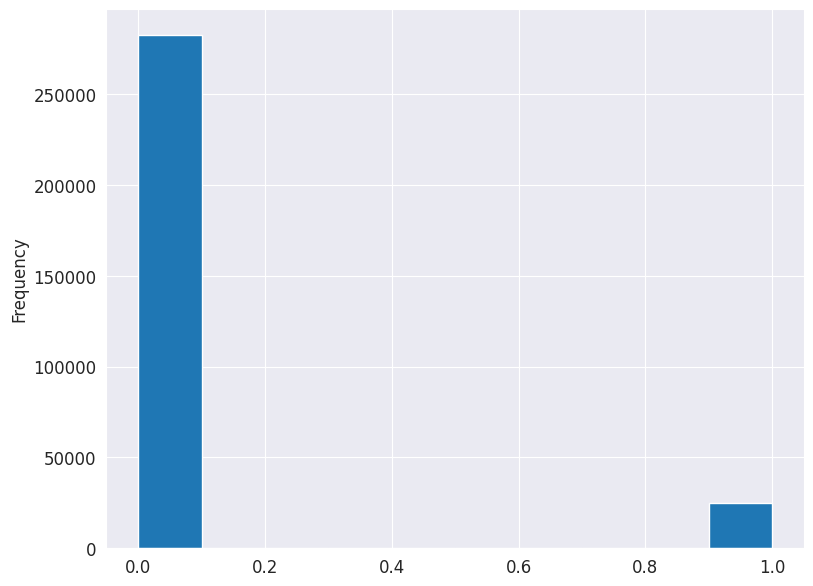

In [ ]:
app_train['TARGET'].astype(int).plot.hist();

From this information, we see this is an imbalanced class problem. There are far more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

In [ ]:
app_train.dtypes.value_counts()

float32     65
int32       41
category     2
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
category     1
dtype: int64

In [ ]:
#number of unique classes in each object column
app_train.select_dtypes('category').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Most of the categorical variables have a relatively small number of unique entries. We will need to find a way to deal with these categorical variables!

#### Encoding categorical variables
 **Label encoding**: assign each unique category in a categorical variable with an integer. No new columns are created.

 **One-hot encoding**: create a new column for each unique category in a categorical variable. Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

In [ ]:
#create a label encoder object
le = LabelEncoder()
le_count = 0

# iterate through the columns
for col in app_train:
  if app_train[col].dtype == 'category':
    if len(list(app_train[col].unique()))<=2:
      le.fit(app_train[col])
      app_train[col] = le.transform(app_train[col])
      app_test[col] = le.transform(app_test[col])
      le_count += 1
print('{} columns were label encoded.' .format(le_count))

3 columns were label encoded.


In [ ]:
app_train.describe()

SK_ID_CURR         TARGET  NAME_CONTRACT_TYPE   FLAG_OWN_CAR  \
count  307511.000000  307511.000000       307511.000000  307511.000000   
mean   278180.518577       0.080729            0.095213       0.340108   
std    102790.175348       0.272419            0.293509       0.473746   
min    100002.000000       0.000000            0.000000       0.000000   
25%    189145.500000       0.000000            0.000000       0.000000   
50%    278202.000000       0.000000            0.000000       0.000000   
75%    367142.500000       0.000000            0.000000       1.000000   
max    456255.000000       1.000000            1.000000       1.000000   

       FLAG_OWN_REALTY   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT  \
count    307511.000000  307511.000000      3.075110e+05  3.075110e+05   
mean          0.693673       0.417052      1.687979e+05  5.990259e+05   
std           0.460968       0.722121      2.371231e+05  4.024908e+05   
min           0.000000       0.000000      2.565000e+04  4.500000e+04   
25%           0.000000       0.000000      1.125000e+05  2.700000e+05   
50%           1.000000       0.000000      1.471500e+05  5.135310e+05   
75%           1.000000       1.000000      2.025000e+05  8.086500e+05   
max           1.000000      19.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  307499.000000     3.072330e+05               307511.000000   
mean    27108.572266     5.383961e+05                    0.020868   
std     14493.737305     3.694465e+05                    0.013831   
min      1615.500000     4.050000e+04                    0.000290   
25%     16524.000000     2.385000e+05                    0.010006   
50%     24903.000000     4.500000e+05                    0.018850   
75%     34596.000000     6.795000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  307511.000000  307511.000000      307511.000000    307511.000000   
mean   -16036.995067   63815.045904       -4986.120117     -2994.202373   
std      4363.988632  141275.766519        3522.886230      1509.450419   
min    -25229.000000  -17912.000000      -24672.000000     -7197.000000   
25%    -19682.000000   -2760.000000       -7479.500000     -4299.000000   
50%    -15750.000000   -1213.000000       -4504.000000     -3254.000000   
75%    -12413.000000    -289.000000       -2010.000000     -1720.000000   
max     -7489.000000  365243.000000           0.000000         0.000000   

         OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
count  104582.000000  307511.000000   307511.000000    307511.000000   
mean       12.061090       0.999997        0.819889         0.199368   
std        11.944812       0.001803        0.384280         0.399526   
min         0.000000       0.000000        0.000000         0.000000   
25%         5.000000       1.000000        1.000000         0.000000   
50%         9.000000       1.000000        1.000000         0.000000   
75%        15.000000       1.000000        1.000000         0.000000   
max        91.000000       1.000000        1.000000         1.000000   

       FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  \
count     307511.000000  307511.000000  307511.000000    307509.000000   
mean           0.998133       0.281066       0.056720         2.152665   
std            0.043164       0.449521       0.231307         0.910682   
min            0.000000       0.000000       0.000000         1.000000   
25%            1.000000       0.000000       0.000000         2.000000   
50%            1.000000       0.000000       0.000000         2.000000   
75%            1.000000       1.000000       0.000000         3.000000   
max            1.000000       1.000000       1.000000        20.000000   

       REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count      

In [ ]:
#performing one hot encoding
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [ ]:
app_train

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           100002       1                   0             0                1   
1           100003       0                   0             0                0   
2           100004       0                   1             1                1   
3           100006       0                   0             0                1   
4           100007       0                   0             0                1   
...            ...     ...                 ...           ...              ...   
307506      456251       0                   0             0                0   
307507      456252       0                   0             0                1   
307508      456253       0                   0             0                1   
307509      456254       1                   0             0                1   
307510      456255       0                   0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0              351000.0                    0.018801       -9461   
1             1129500.0                    0.003541      -16765   
2              135000.0                    0.010032      -19046   
3              297000.0                    0.008019      -19005   
4              513000.0                    0.028663      -19932   
...                 ...                         ...         ...   
307506         225000.0                    0.032561       -9327   
307507         225000.0                    0.025164      -20775   
307508         585000.0                    0.005002      -14966   
307509         319500.0                    0.005313      -11961   
307510         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
0                -637            -3648.0            -2120          NaN   
1               -1188            -1186.0             -291          NaN   
2                -225            -4260.0            -2531         26.0   
3               -3039            -9833.0            -2437          NaN   
4               -3038            -4311.0            -3458          NaN   
...               ...                ...              ...          ...   
307506           -236            -8456.0            -1982          NaN   
307507         365243            -4388.0            -4090          NaN   
307508          -7921            -6737.0            -5150          NaN   
307509          -4786            -2562.0             -931          NaN   
307510          -1262            -5128.0             -410          NaN   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
0                1               1                0                 1   
1                1               1                0                 1   
2                1               1                1                 1   
3                1               1                0                 1   
4                1               1                0                 1   
...            ...             ...              ...               ...   
307506           1       

Aligning Training and Testing Data

There need to be the same features (columns) in both the training and testing data. One-hot encoding has created more columns in the training data because there were some categorical variables with categories not represented in the testing data. To remove the columns in the training data that are not in the testing data, we need to align the dataframes. First we extract the target column from the training data (because this is not in the testing data but we need to keep this information). When we do the align, we must make sure to set axis = 1 to align the dataframes based on the columns and not on the rows!

In [ ]:
train_labels = app_train['TARGET']

#Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
# adding the target column back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


The training and testing datasets now have the same features which is required for machine learning. The number of features has grown significantly due to one-hot encoding. At some point we probably will removing features that are not relevant to reduce the size of the datasets.

#### Examine missing values
We have defined `missing_values_table` function, here we pass in the data set to calculate missing values and the percentage of missing values for each features.

In [ ]:
def missing_values_table(df):
  #total missing values
  mis_val = df.isnull().sum()
  # % of missing values
  mis_val_percent = 100* df.isnull().sum()/ len(df)
  # missing value tabel
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)

  #rename columns
  mis_val_table = mis_val_table.rename(columns = {0:'Missing Values', 1:'% Missing'})
  #sort table on percent missing in descending
  mis_val_table = mis_val_table[mis_val_table.iloc[:,1]!=0].sort_values('% Missing', ascending =False).round(1)

  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
         "There are " + str(mis_val_table.shape[0]) + " columns that have missing values.")

  # Return the dataframe with missing information
  return mis_val_table

In [ ]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 240 columns.
There are 61 columns that have missing values.


Missing Values  % Missing
COMMONAREA_MODE                   214865       69.9
COMMONAREA_MEDI                   214865       69.9
COMMONAREA_AVG                    214865       69.9
NONLIVINGAPARTMENTS_MODE          213514       69.4
NONLIVINGAPARTMENTS_AVG           213514       69.4
NONLIVINGAPARTMENTS_MEDI          213514       69.4
LIVINGAPARTMENTS_MEDI             210199       68.4
LIVINGAPARTMENTS_AVG              210199       68.4
LIVINGAPARTMENTS_MODE             210199       68.4
FLOORSMIN_MEDI                    208642       67.8
FLOORSMIN_MODE                    208642       67.8
FLOORSMIN_AVG                     208642       67.8
YEARS_BUILD_AVG                   204488       66.5
YEARS_BUILD_MODE                  204488       66.5
YEARS_BUILD_MEDI                  204488       66.5
OWN_CAR_AGE                       202929       66.0
LANDAREA_MEDI                     182590       59.4
LANDAREA_MODE                     182590       59.4
LANDAREA_AVG                      182590       59.4
BASEMENTAREA_MODE                 179943       58.5

#### Anomalies
One problem we always want to be on the lookout for when doing EDA is anomalies within the data. These may be due to mis-typed numbers, errors in measuring equipment, or they could be valid but extreme measurements. One way to support anomalies quantitatively is by looking at the statistics of a column using the describe method.

The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

In [ ]:
(app_train['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

That doesn't look right! The maximum value (besides being positive) is about 1000 years!

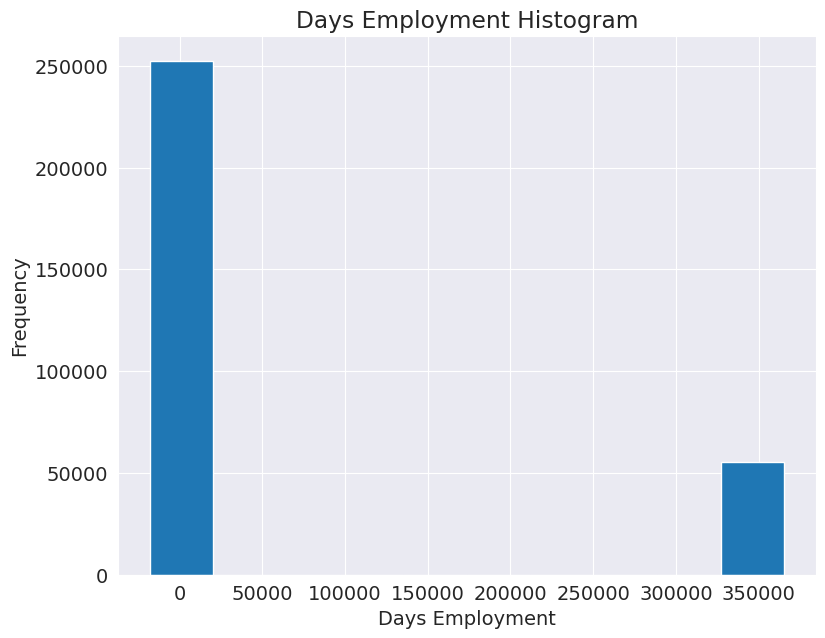

In [ ]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

lets just check the anomalous clients and see if they tend to have higher or low rates of default than the rest of the clients.

In [ ]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print('The non-anomalies default on {:0.2f}% of loans' .format(100 * non_anom['TARGET'].mean()))
print('The anomalies default on {:0.2f}% of loans'.format(100 * anom['TARGET'].mean()))
print('There are {:d} anomalous days of employment' .format(len(anom)))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Handling the anomalies depends on the exact situation, with no set rules. One of the safest approaches is just to set the anomalies to a missing value and then have them filled in (using Imputation) before machine learning. In this case, since all the anomalies have the exact same value, we want to fill them in with the same value in case all of these loans share something in common. The anomalous values seem to have some importance, so we want to tell the machine learning model if we did in fact fill in these values. As a solution, we will fill in the anomalous values with not a number (np.nan) and then create a new boolean column indicating whether or not the value was anomalous.

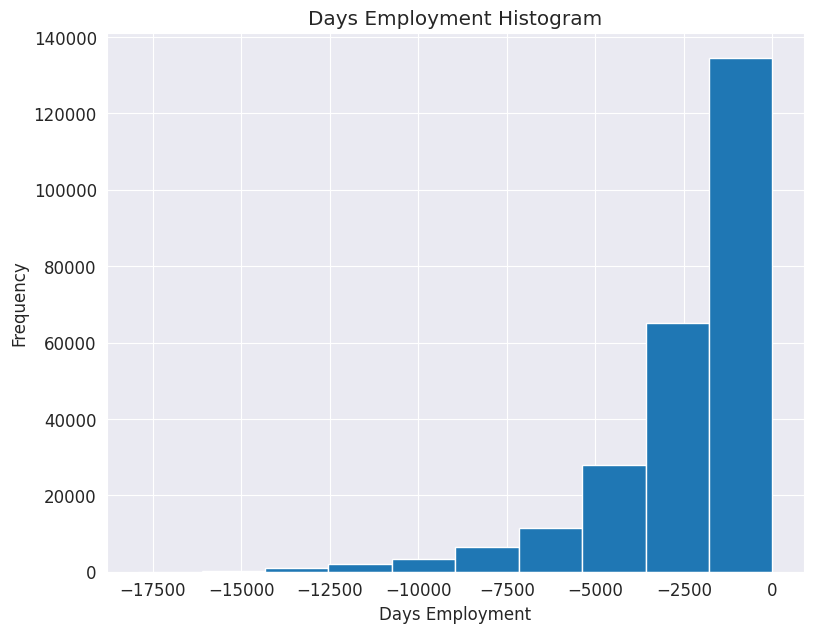

In [ ]:
#Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

The distribution looks to be much more in line with what we would expect, and we also have created a new column to tell the model that these values were originally anomalous (becuase we will have to fill in the nans with some value, probably the median of the column). The other columns with DAYS in the dataframe look to be about what we expect with no obvious outliers.

In [ ]:
#note, anything we do to the training data repeat on testing data
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are {:d} anomalies in the test data out of {:d} entries' .format(app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


#### Correlations
The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:
* .00-.19 “very weak”
*.20-.39 “weak”
*.40-.59 “moderate”
*.60-.79 “strong”
*.80-1.0 “very strong”

We will using the .corr dataframe method to calculate the Pearson correlation coefficient between every variable and the target.




In [ ]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negati

Let's take a look at some of more significant correlations: the DAYS_BIRTH is the most positive correlation. (except for TARGET because the correlation of a variable with itself is always 1!) Looking at the documentation, DAYS_BIRTH is the age in days of the client at the time of the loan in negative days (for whatever reason!). The correlation is positive, but the value of this feature is actually negative, meaning that as the client gets older, they are less likely to default on their loan (ie the target == 0). That's a little confusing, so we will take the absolute value of the feature and then the correlation will be negative.

In [ ]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982694

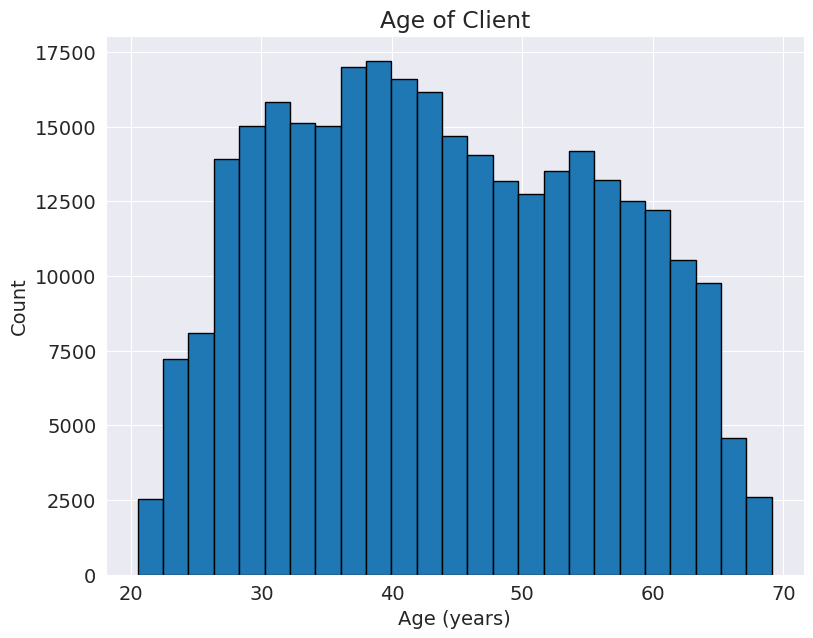

In [ ]:
# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

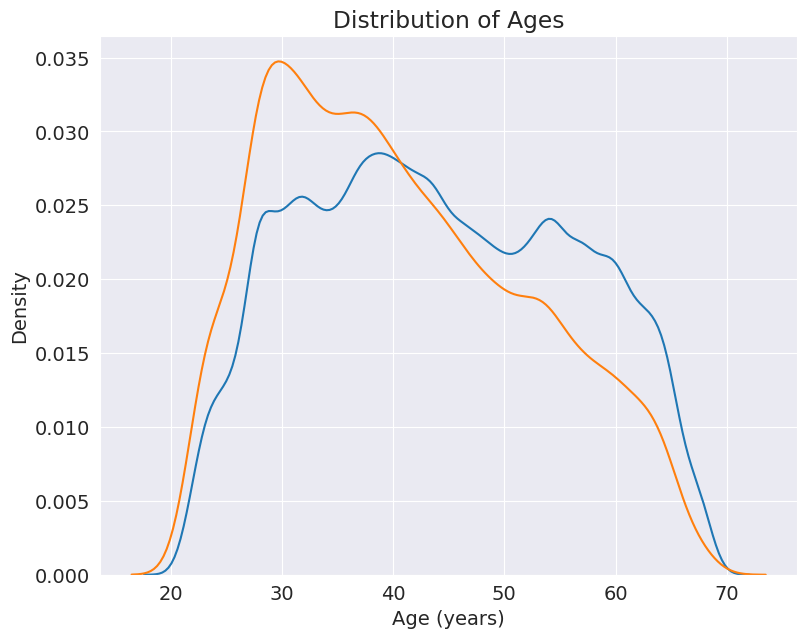

In [ ]:
# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [ ]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']].copy()
age_data['YEARS_BIRTH'] = age_data[ 'DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    25.920548  (25.0, 30.0]
1       0       16765    45.931507  (45.0, 50.0]
2       0       19046    52.180822  (50.0, 55.0]
3       0       19005    52.068493  (50.0, 55.0]
4       0       19932    54.608219  (50.0, 55.0]
5       0       16941    46.413699  (45.0, 50.0]
6       0       13778    37.747945  (35.0, 40.0]
7       0       18850    51.643836  (50.0, 55.0]
8       0       20099    55.065753  (55.0, 60.0]
9       0       14469    39.641096  (35.0, 40.0]

In [ ]:
# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.123036   8532.795625    23.377522
(25.0, 30.0]  0.111442  10155.219690    27.822520
(30.0, 35.0]  0.102814  11854.848377    32.479037
(35.0, 40.0]  0.089416  13707.908041    37.555912
(40.0, 45.0]  0.078491  15497.661233    42.459346
(45.0, 50.0]  0.074171  17323.900441    47.462741
(50.0, 55.0]  0.066968  19196.494791    52.593136
(55.0, 60.0]  0.055316  20984.285455    57.491193
(60.0, 65.0]  0.052737  22780.547460    62.412459
(65.0, 70.0]  0.037270  24292.614340    66.555108

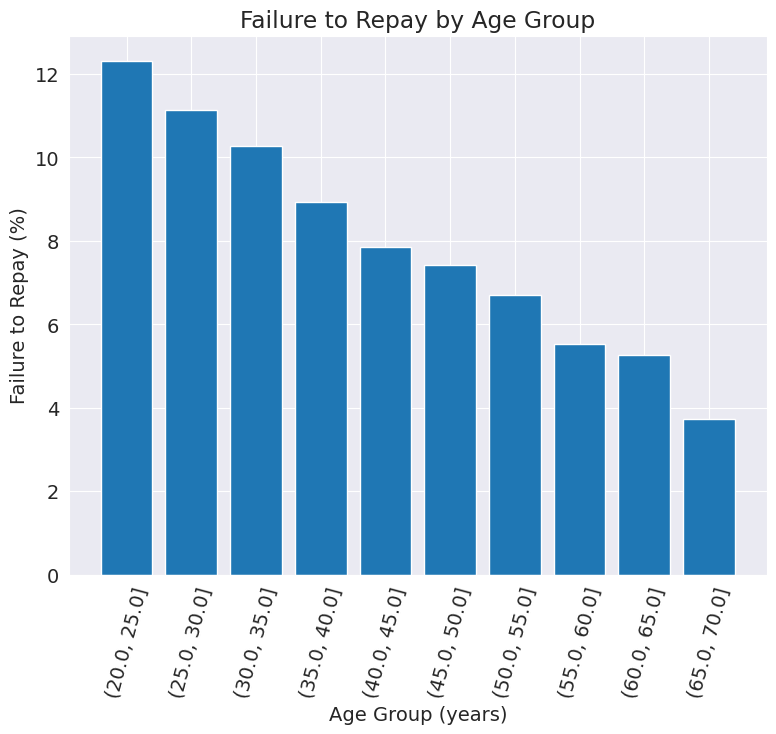

In [ ]:
# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

There is a clear trend: younger applicants are more likely to not repay the loan! The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs


TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

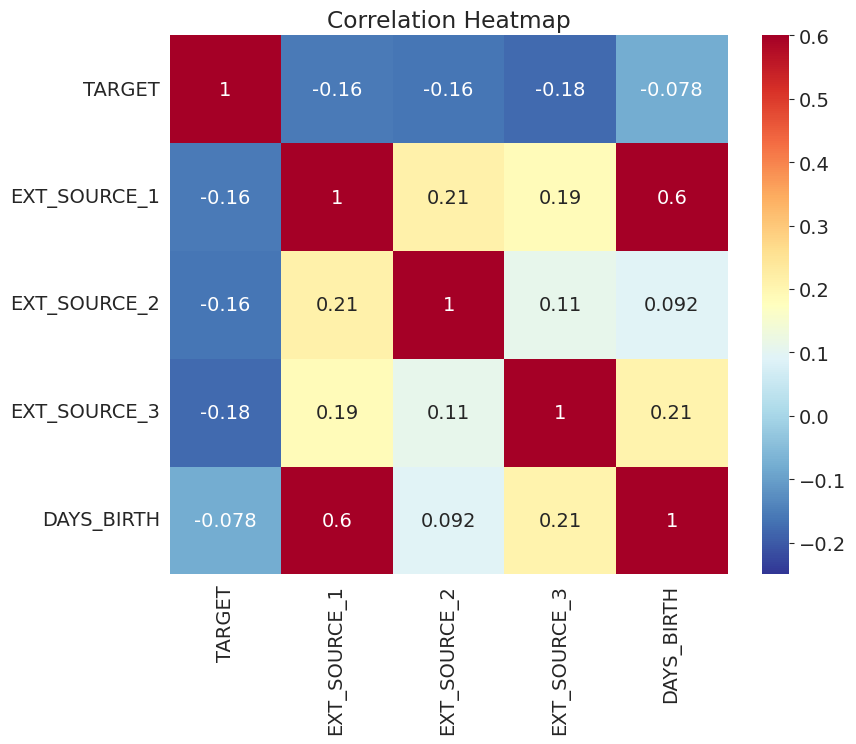

In [ ]:
# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

All three EXT_SOURCE featureshave negative correlations with the target, indicating that as the value of the EXT_SOURCE increases, the client is more likely to repay the loan. We can also see that DAYS_BIRTH is positively correlated with EXT_SOURCE_1 indicating that maybe one of the factors in this score is the client age.

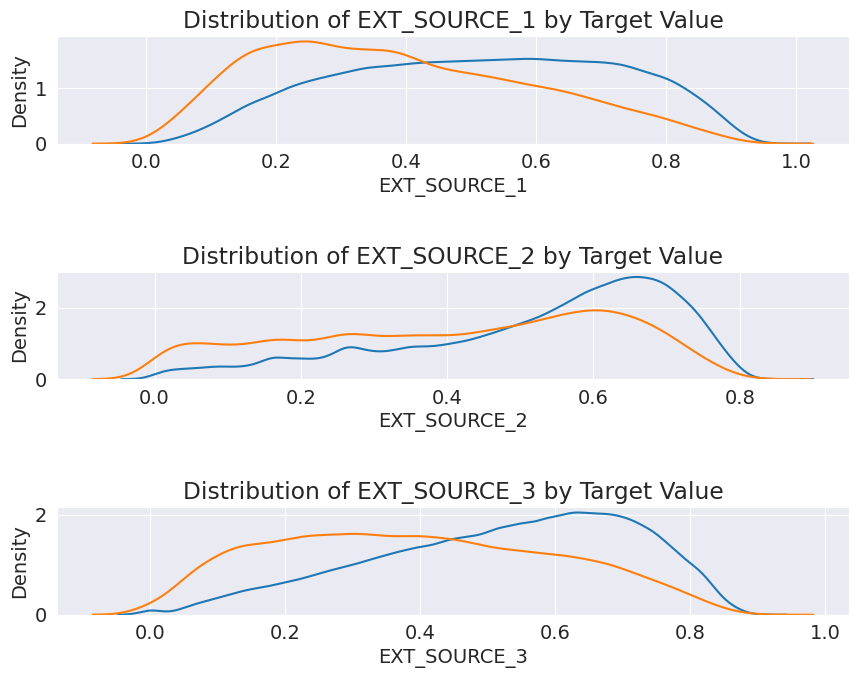

In [ ]:
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):

    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

### Feature Engineering
feature engineering has a greater return on investment than model building and hyperparameter tuning.

While choosing the right model and optimal settings are important, the model can only learn from the data it is given. Making sure this data is as relevant to the task as possible is the job of the data scientist

Feature engineering refers to a geneal process and can involve both feature construction: adding new features from the existing data, and feature selection: choosing only the most important features or other methods of dimensionality reduction. There are many techniques we can use to both create features and select features.



#### Polynomial Features
In this method, we make features that are powers of existing features as well as interaction terms between existing features.For example, we can create variables EXT_SOURCE_1^2 and EXT_SOURCE_2^2 and also variables such as EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2^2, EXT_SOURCE_1^2 x EXT_SOURCE_2^2, and so on. These features that are a combination of multiple individual variables are called interaction terms because they capture the interactions between variables. In other words, while two variables by themselves may not have a strong influence on the target, combining them together into a single interaction variable might show a relationship with the target. Interaction terms are commonly used in statistical models to capture the effects of multiple variables, but I do not see them used as often in machine learning. Nonetheless, we can try out a few to see if they might help our model to predict whether or not a client will repay a loan.


In [ ]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [ ]:
# imputer for handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])
# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)
# Train the polynomial features
poly_transformer.fit(poly_features)
# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)
print('Polynomial Features Test shape: ', poly_features_test.shape)

Polynomial Features shape:  (307511, 35)
Polynomial Features Test shape:  (48744, 35)


In [ ]:
poly_transformer.get_feature_names_out(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

array(['1', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',
       'EXT_SOURCE_1^2', 'EXT_SOURCE_1 EXT_SOURCE_2',
       'EXT_SOURCE_1 EXT_SOURCE_3', 'EXT_SOURCE_1 DAYS_BIRTH',
       'EXT_SOURCE_2^2', 'EXT_SOURCE_2 EXT_SOURCE_3',
       'EXT_SOURCE_2 DAYS_BIRTH', 'EXT_SOURCE_3^2',
       'EXT_SOURCE_3 DAYS_BIRTH', 'DAYS_BIRTH^2'], dtype=object)

In [ ]:
# Create a dataframe of the features
poly_features = pd.DataFrame(poly_features,
                             columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [ ]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test,
                                  columns = poly_transformer.get_feature_names_out(['EXT_SOURCE_1', 'EXT_SOURCE_2',
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))
cols_to_drop = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
poly_features['SK_ID_CURR'].fillna(0).apply(lambda x: int(x))
app_train.drop(columns = cols_to_drop, inplace = True)
app_train_feat = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
poly_features_test['SK_ID_CURR'].fillna(0).apply(lambda x: int(x))
app_test.drop(columns = cols_to_drop, inplace = True)
app_test_feat = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_feat, app_test_feat = app_train_feat.align(app_test_feat, join = 'inner', axis = 1)
# Add in the target
app_train_feat['TARGET'] = poly_target
# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_feat.shape)
print('Testing data with polynomial features shape:  ', app_test_feat.shape)

Training data with polynomial features shape:  (307511, 272)
Testing data with polynomial features shape:   (48744, 271)


In [ ]:
# Extract the EXT_SOURCE variables and show correlations
ext_data2 = app_train_feat[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs2 = ext_data2.corr()['TARGET'].sort_values()
ext_data_corrs2

EXT_SOURCE_2   -0.160295
EXT_SOURCE_3   -0.155892
EXT_SOURCE_1   -0.098887
DAYS_BIRTH     -0.078239
TARGET          1.000000
Name: TARGET, dtype: float64

after imputing the extract fetures with mean, the main features correlation with target has reduced but we cannot give our model null values to train, hence we have removed the previous ones from our data set.

In [ ]:
app_train_feat

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           100002                   0             0                1   
1           100003                   0             0                0   
2           100004                   1             1                1   
3           100006                   0             0                1   
4           100007                   0             0                1   
...            ...                 ...           ...              ...   
307506      456251                   0             0                0   
307507      456252                   0             0                1   
307508      456253                   0             0                1   
307509      456254                   0             0                1   
307510      456255                   0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      24700.5   
1                  0          270000.0   1293502.5      35698.5   
2                  0           67500.0    135000.0       6750.0   
3                  0          135000.0    312682.5      29686.5   
4                  0          121500.0    513000.0      21865.5   
...              ...               ...         ...          ...   
307506             0          157500.0    254700.0      27558.0   
307507             0           72000.0    269550.0      12001.5   
307508             0          153000.0    677664.0      29979.0   
307509             0          171000.0    370107.0      20205.0   
307510             0          157500.0    675000.0      49117.5   

        AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
0              351000.0                    0.018801         -637.0   
1             1129500.0                    0.003541        -1188.0   
2              135000.0                    0.010032         -225.0   
3              297000.0                    0.008019        -3039.0   
4              513000.0                    0.028663        -3038.0   
...                 ...                         ...            ...   
307506         225000.0                    0.032561         -236.0   
307507         225000.0                    0.025164            NaN   
307508         585000.0                    0.005002        -7921.0   
307509         319500.0                    0.005313        -4786.0   
307510         675000.0                    0.046220        -1262.0   

        DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0                 -3648.0            -2120          NaN           1   
1                 -1186.0             -291          NaN           1   
2                 -4260.0            -2531         26.0           1   
3                 -9833.0            -2437          NaN           1   
4                 -4311.0            -3458          NaN           1   
...                   ...              ...          ...         ...   
307506            -8456.0            -1982          NaN           1   
307507            -4388.0            -4090          NaN           1   
307508            -6737.0            -5150          NaN           1   
307509            -2562.0             -931          NaN           1   
307510            -5128.0             -410          NaN           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0                    1                0                 1           1   
1                    1                0                 1           1   
2                    1                1                 1           1   
3                    1                0                 1           0   
4                    1                0                 1           0   
...                ...              ...               ...         ...   
307506               1                0                 1           0   
307507               0                0         

#### Domain Knowledge Features
 Here I'm going to use four features that were inspired by this script by Aguiar:

* CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
*ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
*CREDIT_TERM: the length of the payment in months since the annuity is the monthly amount due
*DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [ ]:
app_train_feat['DAYS_BIRTH'].isnull().sum()

0

In [ ]:
app_train_feat['CREDIT_INCOME_PERCENT'] = app_train_feat['AMT_CREDIT'] / app_train_feat['AMT_INCOME_TOTAL']
app_train_feat['ANNUITY_INCOME_PERCENT'] = app_train_feat['AMT_ANNUITY'] / app_train_feat['AMT_INCOME_TOTAL']
app_train_feat['INCOME_PER_PERSON'] = app_train_feat['AMT_INCOME_TOTAL'] / app_train_feat['CNT_FAM_MEMBERS']
app_train_feat['DAYS_EMPLOYED_PERCENT'] = app_train_feat['DAYS_EMPLOYED'] / app_train_feat['DAYS_BIRTH']
app_train_feat['CREDIT_TERM'] = app_train_feat['AMT_ANNUITY'] / app_train_feat['AMT_CREDIT']

In [ ]:
app_test_feat['CREDIT_INCOME_PERCENT'] = app_test_feat['AMT_CREDIT'] / app_test_feat['AMT_INCOME_TOTAL']
app_test_feat['ANNUITY_INCOME_PERCENT'] = app_test_feat['AMT_ANNUITY'] / app_test_feat['AMT_INCOME_TOTAL']
app_test_feat['INCOME_PER_PERSON'] = app_test_feat['AMT_INCOME_TOTAL'] / app_test_feat['CNT_FAM_MEMBERS']
app_test_feat['DAYS_EMPLOYED_PERCENT'] = app_test_feat['DAYS_EMPLOYED'] / app_test_feat['DAYS_BIRTH']
app_test_feat['CREDIT_TERM'] = app_test_feat['AMT_ANNUITY'] / app_test_feat['AMT_CREDIT']

Visualize New Variables
We should explore these domain knowledge variables visually in a graph. For all of these, we will make the same KDE plot colored by the value of the TARGET.

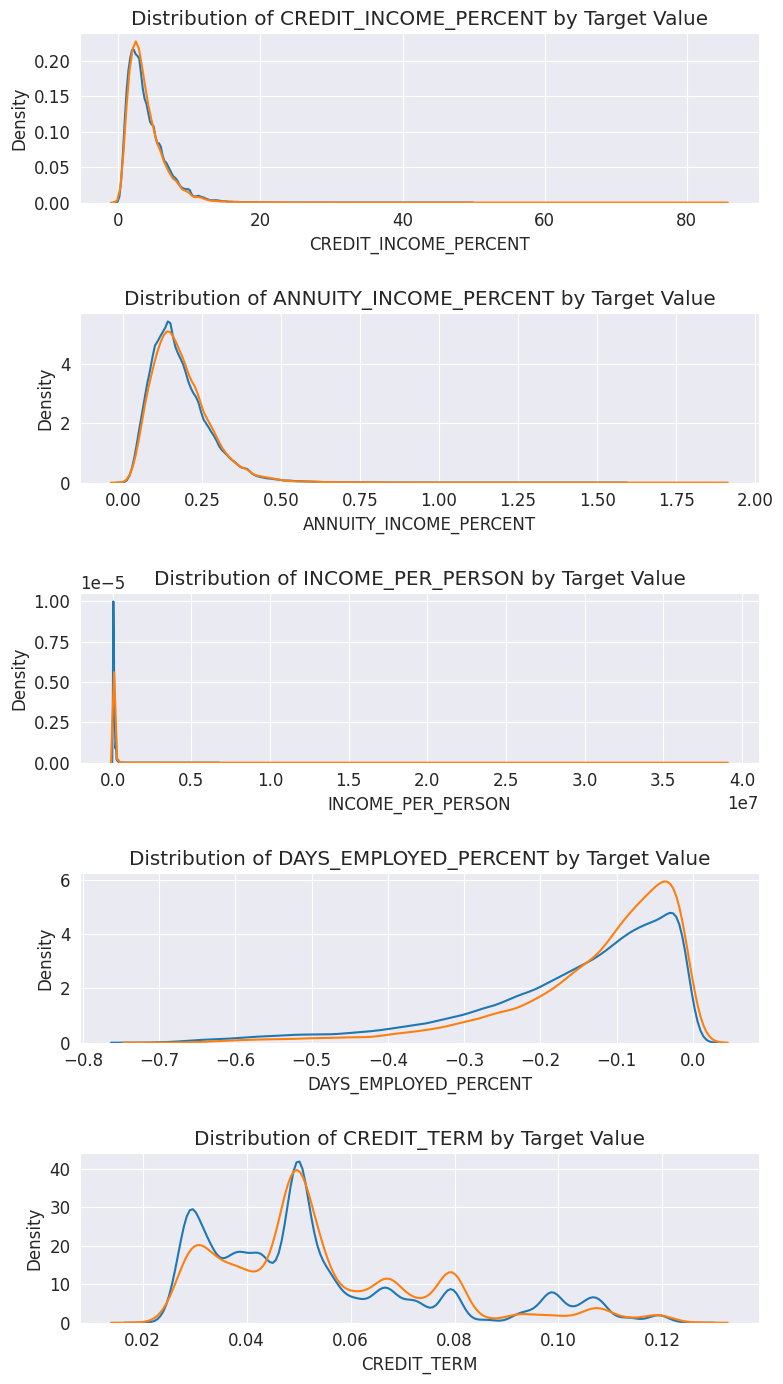

In [ ]:
plt.figure(figsize = (8,14))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT','INCOME_PER_PERSON', 'DAYS_EMPLOYED_PERCENT','CREDIT_TERM']):

    # create a new subplot for each source
    plt.subplot(5, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_feat.loc[app_train_feat['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_feat.loc[app_train_feat['TARGET'] == 1, feature], label = 'target == 1')

    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout()

In [ ]:
missing_feat = missing_values_table(app_train_feat)
missing_feat.head(10)

Your selected dataframe has 277 columns.
There are 63 columns that have missing values.


Missing Values  % Missing
COMMONAREA_AVG                    214865       69.9
COMMONAREA_MEDI                   214865       69.9
COMMONAREA_MODE                   214865       69.9
NONLIVINGAPARTMENTS_MODE          213514       69.4
NONLIVINGAPARTMENTS_MEDI          213514       69.4
NONLIVINGAPARTMENTS_AVG           213514       69.4
LIVINGAPARTMENTS_MEDI             210199       68.4
LIVINGAPARTMENTS_AVG              210199       68.4
LIVINGAPARTMENTS_MODE             210199       68.4
FLOORSMIN_MODE                    208642       67.8

In [ ]:
feat_target_corr = app_train_feat.corr()['TARGET'].sort_values()
feat_target_corr

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
                                            ...   
REGION_RATING_CLIENT_W_CITY               0.060893
DAYS_EMPLOYED_PERCENT                     0.067955
DAYS_EMPLOYED                             0.074958
TARGET                                    1.000000
1                                              NaN
Name: TARGET, Length: 277, dtype: float64

In [ ]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
feat_corr_matrix = app_train_feat.corr().abs()
feat_corr_matrix.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
SK_ID_CURR            1.000000            0.001654      0.001216   
NAME_CONTRACT_TYPE    0.001654            1.000000      0.004022   
FLAG_OWN_CAR          0.001216            0.004022      1.000000   
FLAG_OWN_REALTY       0.000703            0.067177      0.002817   
CNT_CHILDREN          0.001129            0.029998      0.102023   

                    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                 0.000703      0.001129          0.001820   
NAME_CONTRACT_TYPE         0.067177      0.029998          0.003531   
FLAG_OWN_CAR               0.002817      0.102023          0.083383   
FLAG_OWN_REALTY            1.000000      0.002366          0.002934   
CNT_CHILDREN               0.002366      1.000000          0.012882   

                    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR            0.000343     0.000433         0.000232   
NAME_CONTRACT_TYPE    0.221648     0.241544         0.185850   
FLAG_OWN_CAR          0.116225     0.141588         0.120310   
FLAG_OWN_REALTY       0.039270     0.005225         0.045537   
CNT_CHILDREN          0.002145     0.021374         0.001827   

                    REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                            0.000849       0.000084   
NAME_CONTRACT_TYPE                    0.026867       0.036388   
FLAG_OWN_CAR                          0.041314       0.023096   
FLAG_OWN_REALTY                       0.015175       0.030665   
CNT_CHILDREN                          0.025573       0.061145   

                    DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
SK_ID_CURR                   0.000973         0.000384     0.001818   
NAME_CONTRACT_TYPE           0.020557         0.052847     0.010602   
FLAG_OWN_CAR                 0.087766         0.013661          NaN   
FLAG_OWN_REALTY              0.025224         0.006664     0.001496   
CNT_CHILDREN                 0.183395         0.028019     0.008494   

                    FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
SK_ID_CURR            0.002804        0.001337         0.000415   
NAME_CONTRACT_TYPE    0.000585        0.054938         0.033647   
FLAG_OWN_CAR          0.002512        0.154659         0.011471   
FLAG_OWN_REALTY       0.001198        0.070021         0.114043   
CNT_CHILDREN          0.001041        0.240714         0.055630   

                    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
SK_ID_CURR                  0.002815    0.002753    0.000281         0.002895   
NAME_CONTRACT_TYPE          0.097116    0.021378    0.010811         0.011369   
FLAG_OWN_CAR                0.006644    0.007588    0.032105         0.149901   
FLAG_OWN_REALTY             0.008526    0.041507    0.029247         0.007351   
CNT_CHILDREN                0.000794    0.029906    0.022619         0.879161   

                    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                      0.001075                     0.001138   
NAME_CONTRACT_TYPE              0.021593                     0.023116   
FLAG_OWN_CAR                    0.022668                     0.021405   
FLAG_OWN_REALTY                 0.001289                     0.001884   
CNT_CHILDREN                    0.025423                     0.024781   

                    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                         0.000350                    0.000283   
NAME_CONTRACT_TYPE                 0.035897                    0.018561   
FLAG_OWN_CAR                       0.014369                    0.000668   
FLAG_OWN_REALTY                    0.102687                    0.036301   
CNT_CHILDREN                       0.007292                    0.013319   

                    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                            0.001097                     0.002903   
NAME_CONTRACT_TYPE                    0.015

In [ ]:
# Upper triangle of correlations
upper = feat_corr_matrix.where(np.triu(np.ones(feat_corr_matrix.shape), k=1).astype(np.bool))
upper.head()

<ipython-input-53-d268486cca84>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = feat_corr_matrix.where(np.triu(np.ones(feat_corr_matrix.shape), k=1).astype(np.bool))


SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
SK_ID_CURR                 NaN            0.001654      0.001216   
NAME_CONTRACT_TYPE         NaN                 NaN      0.004022   
FLAG_OWN_CAR               NaN                 NaN           NaN   
FLAG_OWN_REALTY            NaN                 NaN           NaN   
CNT_CHILDREN               NaN                 NaN           NaN   

                    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                 0.000703      0.001129          0.001820   
NAME_CONTRACT_TYPE         0.067177      0.029998          0.003531   
FLAG_OWN_CAR               0.002817      0.102023          0.083383   
FLAG_OWN_REALTY                 NaN      0.002366          0.002934   
CNT_CHILDREN                    NaN           NaN          0.012882   

                    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR            0.000343     0.000433         0.000232   
NAME_CONTRACT_TYPE    0.221648     0.241544         0.185850   
FLAG_OWN_CAR          0.116225     0.141588         0.120310   
FLAG_OWN_REALTY       0.039270     0.005225         0.045537   
CNT_CHILDREN          0.002145     0.021374         0.001827   

                    REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
SK_ID_CURR                            0.000849       0.000084   
NAME_CONTRACT_TYPE                    0.026867       0.036388   
FLAG_OWN_CAR                          0.041314       0.023096   
FLAG_OWN_REALTY                       0.015175       0.030665   
CNT_CHILDREN                          0.025573       0.061145   

                    DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
SK_ID_CURR                   0.000973         0.000384     0.001818   
NAME_CONTRACT_TYPE           0.020557         0.052847     0.010602   
FLAG_OWN_CAR                 0.087766         0.013661          NaN   
FLAG_OWN_REALTY              0.025224         0.006664     0.001496   
CNT_CHILDREN                 0.183395         0.028019     0.008494   

                    FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
SK_ID_CURR            0.002804        0.001337         0.000415   
NAME_CONTRACT_TYPE    0.000585        0.054938         0.033647   
FLAG_OWN_CAR          0.002512        0.154659         0.011471   
FLAG_OWN_REALTY       0.001198        0.070021         0.114043   
CNT_CHILDREN          0.001041        0.240714         0.055630   

                    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
SK_ID_CURR                  0.002815    0.002753    0.000281         0.002895   
NAME_CONTRACT_TYPE          0.097116    0.021378    0.010811         0.011369   
FLAG_OWN_CAR                0.006644    0.007588    0.032105         0.149901   
FLAG_OWN_REALTY             0.008526    0.041507    0.029247         0.007351   
CNT_CHILDREN                0.000794    0.029906    0.022619         0.879161   

                    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
SK_ID_CURR                      0.001075                     0.001138   
NAME_CONTRACT_TYPE              0.021593                     0.023116   
FLAG_OWN_CAR                    0.022668                     0.021405   
FLAG_OWN_REALTY                 0.001289                     0.001884   
CNT_CHILDREN                    0.025423                     0.024781   

                    HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
SK_ID_CURR                         0.000350                    0.000283   
NAME_CONTRACT_TYPE                 0.035897                    0.018561   
FLAG_OWN_CAR                       0.014369                    0.000668   
FLAG_OWN_REALTY                    0.102687                    0.036301   
CNT_CHILDREN                       0.007292                    0.013319   

                    REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
SK_ID_CURR                            0.001097                     0.002903   
NAME_CONTRACT_TYPE                    0.015

In [ ]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))

There are 60 columns to remove.


we shouldnt delete extract realted features and the features which we produced using domain knowledge, here Days_employed_percent

In [ ]:
app_train_feat_corrs = app_train_feat.drop(columns = to_drop)
app_test_feat_corrs = app_test_feat.drop(columns = to_drop)

print('Training shape: ', app_train_feat_corrs.shape)
print('Testing shape: ', app_train_feat_corrs.shape)

Training shape:  (307511, 217)
Testing shape:  (307511, 217)


We will be using pyarrow library to convert our pandas daframe to feather/parquet files instead of csv to save storage in local system/google drive.

**pyarrow** facilitates high-performance data interchange and processing. It provides robust support for working with Parquet files, enabling efficient read and write operations and integration with other data processing libraries like Pandas.

**Parquet** is a columnar storage file format designed for efficient data storage and processing. It's used in big data processing frameworks like Apache Hadoop and Apache Spark. Parquet files store data in a compressed, columnar format.

**Feather**stores data in a columnar format, which can improve reading and writing performance, especially for analytics and data processing tasks that involve specific columns.Feather files aim to be memory efficient, making them suitable for handling large datasets.They offer quick access to specific columns, enabling efficient data retrieval for analytical purposes.

In [ ]:
!pip install pyarrow

In [ ]:
app_train_feat.to_feather('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_feat.feather')
app_test_feat.to_feather('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_test_feat.feather')

app_train_feat_corrs.to_feather('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_feat_corrs.feather')
app_test_feat_corrs.to_feather('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_test_feat_corrs.feather')


In [ ]:
# app_train_feat = pd.read_feather('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_feat.feather')
# app_test_feat = pd.read_feather('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_test_feat.feather')

In [ ]:
# app_train_feat.columns

In [ ]:
# app_test_feat.columns

### Baseline Predictions

For a naive baseline, we could guess the same value for all examples on the testing set. We are asked to predict the probability of not repaying the loan, so if we are entirely unsure, we would guess 0.5 for all observations on the test set. This will get us a Reciever Operating Characteristic Area Under the Curve (AUC ROC) of 0.5

**Random Forest**

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def randomforest_preds(app_train, app_test, **params):
    # Drop the target from the training data
    if 'TARGET' in app_train:
        train_labels = app_train['TARGET']
        train = app_train.drop(['SK_ID_CURR','TARGET'], axis = 1)
    else:
        train = app_train.copy()

    # Feature names
    features = list(train.columns)

    # Copy of the testing data
    curr_id = app_test['SK_ID_CURR']
    test = app_test.drop(['SK_ID_CURR'],axis =1).copy()

    # Median imputation of missing values
    imputer = SimpleImputer(strategy = 'median')

    # Scale each feature to 0-1
    scaler = MinMaxScaler()

    # Fit on the training data
    imputer.fit(train)

    # Transform both training and testing data
    train = imputer.transform(train)
    test = imputer.transform(test)

    # Repeat with the scaler
    scaler.fit(train)
    train = scaler.transform(train)
    test = scaler.transform(test)

    # Make the random forest classifier
    random_forest = RandomForestClassifier(n_estimators = 200, random_state = 24,
                                          verbose = 1, n_jobs = -1, **params)

    # Train on the training data
    random_forest.fit(train, train_labels)

    # Extract feature importances
    feature_imp_values = random_forest.feature_importances_
    feature_importances = pd.DataFrame({'feature': features, 'importance': feature_imp_values})

    # Make predictions on the test data
    predictions = random_forest.predict_proba(test)[:, 1]

    # Make a submission dataframe
    app_test['SK_ID_CURR'] = curr_id
    submit = app_test[['SK_ID_CURR']]
    submit['TARGET'] = predictions

    return submit,feature_importances

In [ ]:
submit, feature_importances = randomforest_preds(app_train, app_test)

# Save the submission dataframe
submit.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/random_forest_baseline.csv', index = False)

<ipython-input-24-e6026fd7644a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions


In [ ]:
submit.head()

SK_ID_CURR  TARGET
0      100001   0.100
1      100005   0.140
2      100013   0.095
3      100028   0.085
4      100038   0.135

In [ ]:
feature_importances.sort_values(by = 'importance')

feature    importance
90               FLAG_DOCUMENT_10  0.000000e+00
92               FLAG_DOCUMENT_12  0.000000e+00
117  NAME_INCOME_TYPE_Businessman  0.000000e+00
84                FLAG_DOCUMENT_4  1.231308e-07
15                     FLAG_MOBIL  1.459416e-07
..                            ...           ...
12              DAYS_REGISTRATION  3.140661e-02
13                DAYS_ID_PUBLISH  3.208240e-02
10                     DAYS_BIRTH  3.229769e-02
33                   EXT_SOURCE_3  4.649491e-02
32                   EXT_SOURCE_2  4.963624e-02

[240 rows x 2 columns]

On Kaggle, Our Baseline Predictions scored **0.69252** on private dataset

Our Predictions on test dataset is evaluated on only 10% test data while the competition is active. So that competors/kagglers dont try to fit test data as well. Remaining 90% test data is kept private and evaluated in the end with this datasets.

In [ ]:
submit_feat, feature_importances2 = randomforest_preds(app_train_feat, app_test_feat)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  5.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    2.4s finished
<ipython-input-20-0faabf13990a>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions


In [ ]:
submit_feat

SK_ID_CURR  TARGET
0          100001   0.050
1          100005   0.075
2          100013   0.050
3          100028   0.030
4          100038   0.085
...           ...     ...
48739      456221   0.020
48740      456222   0.065
48741      456223   0.030
48742      456224   0.090
48743      456250   0.130

[48744 rows x 2 columns]

In [ ]:
#  Save the submission dataframe
submit_feat.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/random_forest_baseline_features.csv', index = False)

On Kaggle, Our Baseline Predictions scored **0.70505** on private dataset

In [ ]:
feature_importances2.sort_values(by = 'importance')

feature  importance
235                                       1    0.000000
85                         FLAG_DOCUMENT_10    0.000000
87                         FLAG_DOCUMENT_12    0.000000
79                          FLAG_DOCUMENT_4    0.000000
13                               FLAG_MOBIL    0.000000
..                                      ...         ...
11                          DAYS_ID_PUBLISH    0.016519
263             EXT_SOURCE_2 EXT_SOURCE_3^2    0.017130
245               EXT_SOURCE_2 EXT_SOURCE_3    0.018246
264    EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.018388
255  EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3    0.018665

[275 rows x 2 columns]

In [ ]:
# Features with zero importance
zero_features = list(feature_importances2[feature_importances2['importance'] == 0.0]['feature'])
zero_features

['FLAG_MOBIL',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'NAME_INCOME_TYPE_Businessman',
 '1']

In [ ]:
app_train_feat_zero = app_train_feat.drop(columns = zero_features)
app_test_feat_zero = app_test_feat.drop(columns = zero_features)

print('Training shape: ', app_train_feat_zero.shape)
print('Testing shape: ', app_test_feat_zero.shape)

Training shape:  (307511, 271)
Testing shape:  (48744, 270)


In [ ]:
app_train_feat_zero.to_feather('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_feat_zero.feather')
app_test_feat_zero.to_feather('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_test_feat_zero.feather')

In [ ]:
# app_train_feat_zero = pd.read_feather('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_feat_zero.feather')
# app_test_feat_zero = pd.read_feather('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_test_feat_zero.feather')

In [ ]:
convert_types(app_train_feat_zero, print_info=True)

Original Memory Usage: 214.95 mb.
New Memory Usage: 214.95 mb.


In [ ]:
convert_types(app_test_feat_zero, print_info=True)

Original Memory Usage: 33.88 mb.
New Memory Usage: 33.88 mb.


In [ ]:
cols = list(app_test_feat_zero.columns)
len(cols)

270

In [ ]:
submit_feat2, feature_importances3 = randomforest_preds(app_train_feat_zero, app_test_feat_zero)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  9.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    5.9s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    6.0s finished
<ipython-input-11-019bcb53bf6b>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submit['TARGET'] = predictions


In [ ]:
# Save the submission dataframe
submit_feat2.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/random_forest_baseline_features2.csv', index = False)

In [ ]:
feature_importances3.sort_values(by = 'importance')

feature  importance
111                NAME_INCOME_TYPE_Student    0.000000
203         ORGANIZATION_TYPE_Trade: type 4    0.000017
114     NAME_EDUCATION_TYPE_Academic degree    0.000019
88                         FLAG_DOCUMENT_17    0.000021
204         ORGANIZATION_TYPE_Trade: type 5    0.000022
..                                      ...         ...
11                          DAYS_ID_PUBLISH    0.016716
255             EXT_SOURCE_2^2 EXT_SOURCE_3    0.017637
239               EXT_SOURCE_2 EXT_SOURCE_3    0.017703
258    EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.018049
249  EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3    0.018715

[269 rows x 2 columns]

## Bureau Data preprocessing

In [ ]:
%%time
bureau = pd.read_csv('./bureau.csv')
bureau_balance = pd.read_csv('./bureau_balance.csv')

CPU times: user 9.33 s, sys: 1.68 s, total: 11 s
Wall time: 15.1 s


In [ ]:
convert_types(bureau, print_info=True)

Original Memory Usage: 233.43 mb.
New Memory Usage: 101.27 mb.


In [ ]:
convert_types(bureau_balance, print_info=True)

Original Memory Usage: 655.2 mb.
New Memory Usage: 245.7 mb.


In [ ]:
bureau

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462        Closed      currency 1         -497   
1            215354       5714463        Active      currency 1         -208   
2            215354       5714464        Active      currency 1         -203   
3            215354       5714465        Active      currency 1         -203   
4            215354       5714466        Active      currency 1         -629   
...             ...           ...           ...             ...          ...   
1716423      259355       5057750        Active      currency 1          -44   
1716424      100044       5057754        Closed      currency 1        -2648   
1716425      100044       5057762        Closed      currency 1        -1809   
1716426      246829       5057770        Closed      currency 1        -1878   
1716427      246829       5057778        Closed      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                         0               -153.0             -153.0   
1                         0               1075.0                NaN   
2                         0                528.0                NaN   
3                         0                  NaN                NaN   
4                         0               1197.0                NaN   
...                     ...                  ...                ...   
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                           NaN                   0    9.132300e+04   
1                           NaN                   0    2.250000e+05   
2                           NaN                   0    4.643235e+05   
3                           NaN                   0    9.000000e+04   
4                       77674.5                   0    2.700000e+06   
...                         ...                 ...             ...   
1716423                     0.0                   0    1.125000e+04   
1716424                  5476.5                   0    3.813084e+04   
1716425                     NaN                   0    1.557000e+04   
1716426                     NaN                   0    3.600000e+04   
1716427                     NaN                   0    2.250000e+04   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                        0.0                   NaN                     0.0   
1                   171342.0                   NaN                     0.0   
2                        NaN                   NaN                     0.0   
3                        NaN                   NaN                     0.0   
4                        NaN                   NaN                     0.0   
...                      ...                   ...                     ...   
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0        Consumer credit                -131          NaN  
1            Credit card                 -20          NaN  
2        Consumer credit                 -16          NaN  
3            Credit card                 -16          NaN  
4        Consumer credit                 -21          NaN  
...                  ...                 ... 

In [ ]:
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

SK_ID_CURR  previous_loan_counts
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [ ]:
# join to the training dataframe
app_bureau_train_feat = app_train_feat_zero.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# fill the missing values with 0
app_bureau_train_feat['previous_loan_counts'] = app_bureau_train_feat['previous_loan_counts'].fillna(0)
app_bureau_train_feat.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0             0                1   
1      100003                   0             0                0   
2      100004                   1             1                1   
3      100006                   0             0                1   
4      100007                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  ...  EXT_SOURCE_3^2 DAYS_BIRTH  \
0                    0.018801  ...                 183.785667   
1                    0.003541  ...                4803.518644   
2                    0.010032  ...               10137.567947   
3                    0.008019  ...                5445.324893   
4                    0.028663  ...                5710.929533   

   EXT_SOURCE_3 DAYS_BIRTH^2  DAYS_BIRTH^3  TARGET  CREDIT_INCOME_PERCENT  \
0               1.247560e+07  8.468590e+11       1               2.007889   
1               1.504475e+08  4.712058e+12       0               4.790750   
2               2.646504e+08  6.908939e+12       0               2.000000   
3               1.933364e+08  6.864416e+12       0               2.316167   
4               2.126570e+08  7.918677e+12       0               4.222222   

   ANNUITY_INCOME_PERCENT  INCOME_PER_PERSON  DAYS_EMPLOYED_PERCENT  \
0                0.121978           202500.0              -0.067329   
1                0.132217           135000.0              -0.070862   
2                0.100000            67500.0              -0.011814   
3                0.219900            67500.0              -0.159905   
4                0.179963           121500.0              -0.152418   

   CREDIT_TERM  previous_loan_counts  
0     0.060749                   8.0  
1     0.027598                   4.0  
2     0.050000                   2.0  
3     0.094941                   0.0  
4     0.042623                   1.0  

[5 rows x 272 columns]

#### Asssesing new varaible
assesing the usefullness of new variable with Pearson Correlation Coefficient (r-value) between this variable and the target.This measures the strength of a linear relationship between two variables and ranges from -1 (perfectly negatively linear) to +1 (perfectly positively linear).


#### Kernel Density Estimate Plots


Function for KDE Plots of Variables

We also made a function that plots the distribution of variable colored by the value of TARGET (either 1 for did not repay the loan or 0 for did repay the loan). We can use this function to visually examine any new variables we create. This also calculates the correlation cofficient of the variable with the target which can be used as an approximation of whether or not the created variable will be useful.


In [ ]:
# Plots the disribution of a variable colored by value of the target
def kde_target(var_name, df):

    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])

    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()

    plt.figure(figsize = (12, 6))

    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')

    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title(f'{var_name} Distribution')
    plt.legend();

    # print out the correlation
    print('The correlation between {} and the TARGET is {:0.4f}' .format(var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = {:0.4f}' .format(avg_not_repaid))
    print('Median value for loan that was repaid     = {:0.4f}' .format(avg_repaid))

The correlation between EXT_SOURCE_3 and the TARGET is -0.1559
Median value for loan that was not repaid = 0.4758
Median value for loan that was repaid     = 0.5353


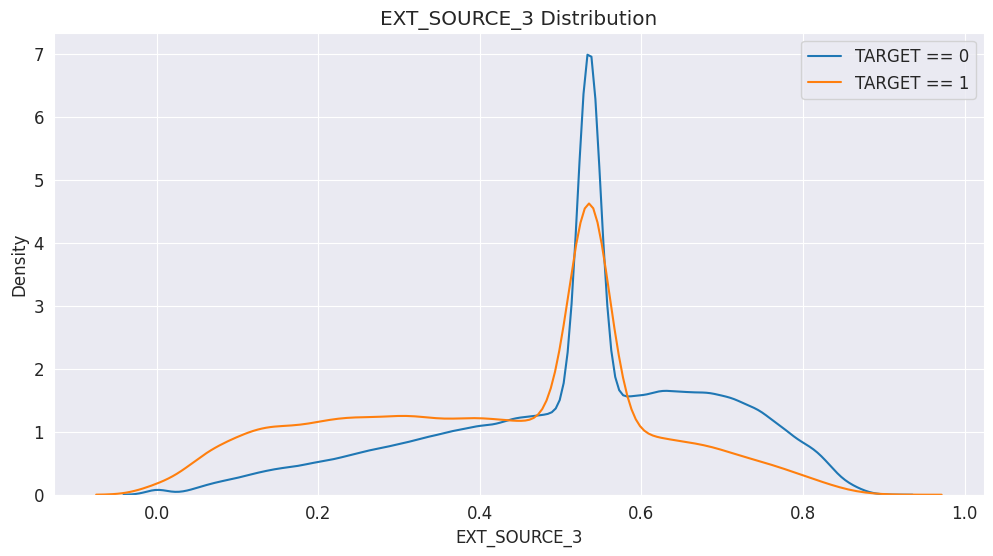

In [ ]:
kde_target('EXT_SOURCE_3', app_bureau_train_feat)

The correlation between previous_loan_counts and the TARGET is -0.0100
Median value for loan that was not repaid = 3.0000
Median value for loan that was repaid     = 4.0000


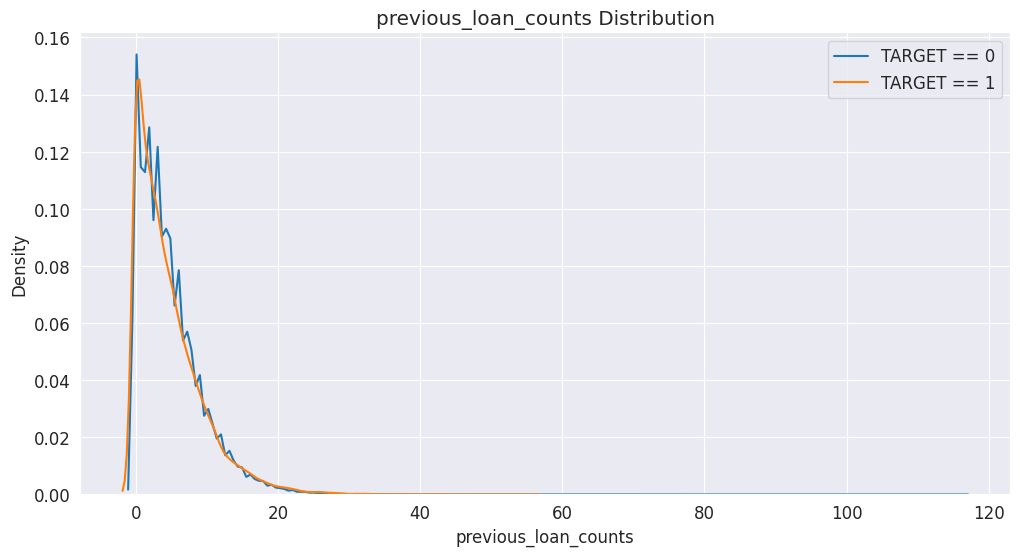

In [ ]:
kde_target('previous_loan_counts', app_bureau_train_feat)

In [ ]:
def agg_numeric(df, parent_var, df_name):
    """
    Groups and aggregates the numeric values in a child dataframe
    by the parent variable.

    Parameters
    --------
        df (dataframe):
            the child dataframe to calculate the statistics on
        parent_var (string):
            the parent variable used for grouping and aggregating
        df_name (string):
            the variable used to rename the columns

    Return
    --------
        agg (dataframe):
            a dataframe with the statistics aggregated by the `parent_var` for
            all numeric columns. Each observation of the parent variable will have
            one row in the dataframe with the parent variable as the index.
            The columns are also renamed using the `df_name`. Columns with all duplicate
            values are removed.

    """

    # Remove id variables other than grouping variable
    for col in df:
        if col != parent_var and 'SK_ID' in col:
            df = df.drop(columns = col)

    # Only want the numeric variables
    parent_ids = df[parent_var].copy()
    numeric_df = df.select_dtypes('number').copy()
    numeric_df[parent_var] = parent_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('{}_{}_{}' .format(df_name, var, stat))

    agg.columns = columns

    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]

    return agg

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
bureau_agg = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), parent_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg.head()

bureau_DAYS_CREDIT_sum  bureau_DAYS_ENDDATE_FACT_sum  \
SK_ID_CURR                                                         
100001                       -5145                       -3302.0   
100002                       -6992                       -4185.0   
100003                       -5603                       -3292.0   
100004                       -1734                       -1065.0   
100005                        -572                        -123.0   

            bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_ENDDATE_min  \
SK_ID_CURR                                                           
100001                       -1572                         -1329.0   
100002                       -1437                         -1072.0   
100003                       -2586                         -2434.0   
100004                       -1326                          -595.0   
100005                        -373                          -128.0   

            bureau_DAYS_ENDDATE_FACT_min  bureau_DAYS_ENDDATE_FACT_mean  \
SK_ID_CURR                                                                
100001                           -1328.0                    -825.500000   
100002                           -1185.0                    -697.500000   
100003                           -2131.0                   -1097.333374   
100004                            -683.0                    -532.500000   
100005                            -123.0                    -123.000000   

            bureau_DAYS_CREDIT_mean  bureau_DAYS_CREDIT_UPDATE_sum  \
SK_ID_CURR                                                           
100001                  -735.000000                           -652   
100002                  -874.000000                          -3999   
100003                 -1400.750000                          -3264   
100004                  -867.000000                          -1064   
100005                  -190.666667                           -163   

            bureau_DAYS_ENDDATE_FACT_max  bureau_DAYS_CREDIT_UPDATE_min  \
SK_ID_CURR                                                                
100001                            -544.0                           -155   
100002                             -36.0                          -1185   
100003                            -540.0                          -2131   
100004                            -382.0                           -682   
100005                            -123.0                           -121   

            bureau_DAYS_CREDIT_UPDATE_mean  bureau_DAYS_CREDIT_max  \
SK_ID_CURR                                                           
100001                          -93.142857                     -49   
100002                         -499.875000                    -103   
100003                         -816.000000                    -606   
100004                         -532.000000                    -408   
100005                          -54.333333                     -62   

            bureau_DAYS_CREDIT_UPDATE_max  bureau_CNT_CREDIT_PROLONG_min  \
SK_ID_CURR                                                                 
100001                                 -6                              0   
100002                                 -7                              0   
100003                                -43                              0   
100004                               -382                              0   
100005                                -11                              0   

            bureau_CREDIT_DAY_OVERDUE_min  bureau_AMT_CREDIT_SUM_OVERDUE_min  \
SK_ID_CURR                                                                     
100001                                  0                                0.0   
100002                                  0                                0.0   
100003                                  0                                0.0   
100004                                  0                                0.0 

In [ ]:
bureau_agg.shape

(305811, 56)

In [ ]:
# Merge with the training data
app_bureau_train_feat = app_bureau_train_feat.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
app_bureau_train_feat.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0             0                1   
1      100003                   0             0                0   
2      100004                   1             1                1   
3      100006                   0             0                1   
4      100007                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801         -637.0            -3648.0   
1                    0.003541        -1188.0            -1186.0   
2                    0.010032         -225.0            -4260.0   
3                    0.008019        -3039.0            -9833.0   
4                    0.028663        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN               1                0   
1             -291          NaN               1                0   
2            -2531         26.0               1                1   
3            -2437          NaN               1                0   
4            -3458          NaN               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  APARTMENTS_AVG  \
0                       0                        0          0.0247   
1                       0                        0          0.0959   
2                       0                        0             NaN   
3                       0                        0             NaN   
4                       1                        1             NaN   

   BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  \
0            0.0369                       0.9722           0.6192   
1            0.0529                       0.9851           0.7960   
2               NaN                          NaN              NaN   
3               NaN   

In [ ]:
def agg_categorical(df, parent_var, df_name):
    """
    Aggregates the categorical features in a child dataframe
    for each observation of the parent variable.

    Parameters
    --------
    df : dataframe
        The dataframe to calculate the value counts for.

    parent_var : string
        The variable by which to group and aggregate the dataframe.

    df_name : string
        Variable added to the front of column names to keep track of columns

    Return
    --------
    categorical : dataframe
        A dataframe with aggregated statistics for each observation of the parent_var
        The columns are also renamed and columns with duplicate values are removed.
    """

    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('category'))

    # Make sure to put the identifying id on the column
    categorical[parent_var] = df[parent_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(parent_var).agg(['sum', 'count', 'mean'])

    column_names = []

    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['sum', 'count', 'mean']:
            # Make a new column name
            column_names.append('{}_{}_{}' .format(df_name, var, stat))

    categorical.columns = column_names

    # Remove duplicate columns by values
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]

    return categorical

In [ ]:
bureau_counts = agg_categorical(bureau.drop(columns = ['SK_ID_BUREAU']), parent_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

bureau_CREDIT_TYPE_Mobile operator loan_mean  \
SK_ID_CURR                                                 
100001                                               0.0   
100002                                               0.0   
100003                                               0.0   
100004                                               0.0   
100005                                               0.0   

            bureau_CREDIT_TYPE_Mobile operator loan_sum  \
SK_ID_CURR                                                
100001                                                0   
100002                                                0   
100003                                                0   
100004                                                0   
100005                                                0   

            bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean  \
SK_ID_CURR                                                                         
100001                                                    0.0                      
100002                                                    0.0                      
100003                                                    0.0                      
100004                                                    0.0                      
100005                                                    0.0                      

            bureau_CREDIT_TYPE_Loan for purchase of shares (margin lending)_sum  \
SK_ID_CURR                                                                        
100001                                                      0                     
100002                                                      0                     
100003                                                      0                     
100004                                                      0                     
100005                                                      0                     

            bureau_CREDIT_ACTIVE_Bad debt_mean  \
SK_ID_CURR                                       
100001                                     0.0   
100002                                     0.0   
100003                                     0.0   
100004                                     0.0   
100005                                     0.0   

            bureau_CREDIT_ACTIVE_Bad debt_sum  \
SK_ID_CURR                                      
100001                                      0   
100002                                      0   
100003                                      0   
100004                                      0   
100005                                      0   

            bureau_CREDIT_TYPE_Interbank credit_mean  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            bureau_CREDIT_TYPE_Interbank credit_sum  \
SK_ID_CURR                                            
100001                                            0   
100002                                            0   
100003                                            0   
100004                                            0   
100005                                            0   

            bureau_CREDIT_TYPE_Real estate loan_mean  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            bureau_CREDIT_TYPE_Real estate loan_sum  \
SK_ID_CURR                                            
100001                       

The sum columns represent the count of that category for the associated client and the mean represents the normalized count. One-hot encoding makes the process of calculating these figures very easy!

In [ ]:
bureau_counts.shape

(305811, 47)

In [ ]:
app_bureau_train_feat = app_bureau_train_feat.merge(bureau_counts, left_on = 'SK_ID_CURR', right_index = True, how = 'left')
app_bureau_train_feat.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0             0                1   
1      100003                   0             0                0   
2      100004                   1             1                1   
3      100006                   0             0                1   
4      100007                   0             0                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801         -637.0            -3648.0   
1                    0.003541        -1188.0            -1186.0   
2                    0.010032         -225.0            -4260.0   
3                    0.008019        -3039.0            -9833.0   
4                    0.028663        -3038.0            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN               1                0   
1             -291          NaN               1                0   
2            -2531         26.0               1                1   
3            -2437          NaN               1                0   
4            -3458          NaN               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
0                     2                            2                       10   
1                     1                            1                       11   
2                     2                            2                        9   
3                     2                            2                       17   
4                     2                            2                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  APARTMENTS_AVG  \
0                       0                        0          0.0247   
1                       0                        0          0.0959   
2                       0                        0             NaN   
3                       0                        0             NaN   
4                       1                        1             NaN   

   BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  \
0            0.0369                       0.9722           0.6192   
1            0.0529                       0.9851           0.7960   
2               NaN                          NaN              NaN   
3               NaN   

In [ ]:
app_bureau_train_feat.shape

(307511, 375)

In [ ]:
#correlation function
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns
    for col in df.columns:
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)

    return corrs

In [ ]:
app_bureau_train_feat[app_bureau_train_feat.columns[-110:]]

TARGET  CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  \
0            1               2.007889                0.121978   
1            0               4.790750                0.132217   
2            0               2.000000                0.100000   
3            0               2.316167                0.219900   
4            0               4.222222                0.179963   
...        ...                    ...                     ...   
307506       0               1.617143                0.174971   
307507       0               3.743750                0.166688   
307508       0               4.429176                0.195941   
307509       1               2.164368                0.118158   
307510       0               4.285714                0.311857   

        INCOME_PER_PERSON  DAYS_EMPLOYED_PERCENT  CREDIT_TERM  \
0                202500.0              -0.067329     0.060749   
1                135000.0              -0.070862     0.027598   
2                 67500.0              -0.011814     0.050000   
3                 67500.0              -0.159905     0.094941   
4                121500.0              -0.152418     0.042623   
...                   ...                    ...          ...   
307506           157500.0              -0.025303     0.108198   
307507            72000.0                    NaN     0.044524   
307508           153000.0              -0.529266     0.044239   
307509            85500.0              -0.400134     0.054592   
307510            78750.0              -0.074869     0.072767   

        previous_loan_counts  bureau_DAYS_CREDIT_sum  \
0                        8.0                 -6992.0   
1                        4.0                 -5603.0   
2                        2.0                 -1734.0   
3                        0.0                     NaN   
4                        1.0                 -1149.0   
...                      ...                     ...   
307506                   0.0                     NaN   
307507                   0.0                     NaN   
307508                   4.0                 -3470.0   
307509                   1.0                 -1104.0   
307510                  11.0                -11984.0   

        bureau_DAYS_ENDDATE_FACT_sum  bureau_DAYS_CREDIT_min  \
0                            -4185.0                 -1437.0   
1                            -3292.0                 -2586.0   
2                            -1065.0                 -1326.0   
3                                NaN                     NaN   
4                             -783.0                 -1149.0   
...                              ...                     ...   
307506                           NaN                     NaN   
307507                           NaN                     NaN   
307508                       -1588.0                  -919.0   
307509                        -859.0                 -1104.0   
307510                       -5810.0                 -2337.0   

        bureau_DAYS_CREDIT_ENDDATE_min  bureau_DAYS_ENDDATE_FACT_min  \
0                              -1072.0                       -1185.0   
1                              -2434.0                       -2131.0   
2                               -595.0                        -683.0   
3                                  NaN                           NaN   
4                               -783.0                        -783.0   
...                                ...                           ...   
307506                             NaN                           NaN   
307507                             NaN                           NaN   
307508                          -189.0                        -794.0   
307509                          -859.0                        -859.0   
307510                         -1243.0                       -1621.0   

        bureau_DAYS_ENDDATE_FACT_mean  bureau_DAYS_CREDIT_mean  \
0                         -697.500000              -874.000000   
1      

Checking the correlation of all the new features we got from bureau data with target. Again, we use these as an approximation of the varibles which may be important for modeling.

In [ ]:
new_corrs = target_corrs(app_bureau_train_feat[app_bureau_train_feat.columns[-110:]])
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998114),
 ('bureau_CREDIT_ACTIVE_Closed_mean', -0.07936887408889606),
 ('bureau_CREDIT_ACTIVE_Active_mean', 0.07735577958544355),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968673),
 ('DAYS_EMPLOYED_PERCENT', 0.06795454075818767),
 ('bureau_CREDIT_ACTIVE_Active_sum', 0.06712815345642854),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392077),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.0537348956010205),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.053199625800929434),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997299),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.048853502611115894),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275436796518),
 ('bureau_CREDIT_TYPE_Microloan_mean', 0.04443943809087867),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730155)]

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -835.3333
Median value for loan that was repaid     = -1067.0000


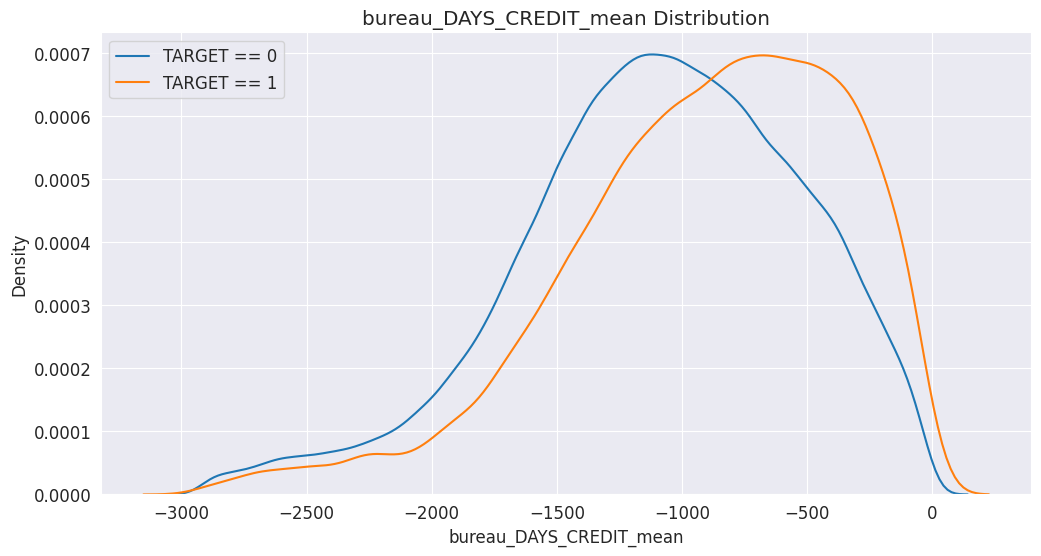

In [ ]:
kde_target('bureau_DAYS_CREDIT_mean', app_bureau_train_feat)

The definition of this column is: "How many days before current application did client apply for Credit Bureau credit". My interpretation is this is the number of days that the previous loan was applied for before the application for a loan at Home Credit. Therefore, a larger negative number indicates the loan was further before the current loan application. We see an extremely weak positive relationship between the average of this variable and the target meaning that clients who applied for loans further in the past potentially are more likely to repay loans at Home Credit. With a correlation this weak though, it is just as likely to be noise as a signal.

**The Multiple Comparisons Problem**

When we have lots of variables, we expect some of them to be correlated just by pure chance, a problem known as multiple comparisons. We can make hundreds of features, and some will turn out to be corelated with the target simply because of random noise in the data. Then, when our model trains, it may overfit to these variables because it thinks they have a relationship with the target in the training set, but this does not necessarily generalize to the test set. There are many considerations that we have to take into account when making features!

**Bureau Balance Dataset**

repeat similar steps to preprocess data.

In [ ]:
bureau_balance

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0              5715448               0      C
1              5715448              -1      C
2              5715448              -2      C
3              5715448              -3      C
4              5715448              -4      C
...                ...             ...    ...
27299920       5041336             -47      X
27299921       5041336             -48      X
27299922       5041336             -49      X
27299923       5041336             -50      X
27299924       5041336             -51      X

[27299925 rows x 3 columns]

In [ ]:
bureau_balance_agg = agg_numeric(bureau_balance, parent_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()

bureau_balance_MONTHS_BALANCE_sum  \
SK_ID_BUREAU                                      
5001709                                   -4656   
5001710                                   -3403   
5001711                                      -6   
5001712                                    -171   
5001713                                    -231   

              bureau_balance_MONTHS_BALANCE_min  \
SK_ID_BUREAU                                      
5001709                                     -96   
5001710                                     -82   
5001711                                      -3   
5001712                                     -18   
5001713                                     -21   

              bureau_balance_MONTHS_BALANCE_mean  \
SK_ID_BUREAU                                       
5001709                                    -48.0   
5001710                                    -41.0   
5001711                                     -1.5   
5001712                                     -9.0   
5001713                                    -10.5   

              bureau_balance_MONTHS_BALANCE_max  \
SK_ID_BUREAU                                      
5001709                                       0   
5001710                                       0   
5001711                                       0   
5001712                                       0   
5001713                                       0   

              bureau_balance_MONTHS_BALANCE_count  
SK_ID_BUREAU                                       
5001709                                        97  
5001710                                        83  
5001711                                         4  
5001712                                        19  
5001713                                        22

In [ ]:
bureau_balance_counts = agg_categorical(bureau_balance, parent_var = 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_counts.head()

bureau_balance_STATUS_4_mean  bureau_balance_STATUS_3_mean  \
SK_ID_BUREAU                                                               
5001709                                0.0                           0.0   
5001710                                0.0                           0.0   
5001711                                0.0                           0.0   
5001712                                0.0                           0.0   
5001713                                0.0                           0.0   

              bureau_balance_STATUS_2_mean  bureau_balance_STATUS_5_mean  \
SK_ID_BUREAU                                                               
5001709                                0.0                           0.0   
5001710                                0.0                           0.0   
5001711                                0.0                           0.0   
5001712                                0.0                           0.0   
5001713                                0.0                           0.0   

              bureau_balance_STATUS_4_sum  bureau_balance_STATUS_3_sum  \
SK_ID_BUREAU                                                             
5001709                                 0                            0   
5001710                                 0                            0   
5001711                                 0                            0   
5001712                                 0                            0   
5001713                                 0                            0   

              bureau_balance_STATUS_2_sum  bureau_balance_STATUS_5_sum  \
SK_ID_BUREAU                                                             
5001709                                 0                            0   
5001710                                 0                            0   
5001711                                 0                            0   
5001712                                 0                            0   
5001713                                 0                            0   

              bureau_balance_STATUS_1_mean  bureau_balance_STATUS_1_sum  \
SK_ID_BUREAU                                                              
5001709                                0.0                            0   
5001710                                0.0                            0   
5001711                                0.0                            0   
5001712                                0.0                            0   
5001713                                0.0                            0   

              bureau_balance_STATUS_0_mean  bureau_balance_STATUS_0_sum  \
SK_ID_BUREAU                                                              
5001709                           0.000000                            0   
5001710                           0.060241                            5   
5001711                           0.750000                            3   
5001712                           0.526316                           10   
5001713                           0.000000                            0   

              bureau_balance_STATUS_X_mean  bureau_balance_STATUS_C_mean  \
SK_ID_BUREAU                                                               
5001709                           0.113402                      0.886598   
5001710                           0.361446                      0.578313   
5001711                           0.250000                      0.000000   
5001712                           0.000000                      0.473684   
5001713                           1.000000                      0.000000   

              bureau_balance_STATUS_X_sum  bureau_balance_STATUS_C_sum  \
SK_ID_BUREAU                                                             
5001709                                11                           86   
5001710                                30                           48   
5001711                      

In [ ]:
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau[['SK_ID_BUREAU', 'SK_ID_CURR']].merge(bureau_by_loan, on = 'SK_ID_BUREAU', how = 'left')

# Aggregate the stats for each client
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), parent_var = 'SK_ID_CURR', df_name = 'client')

In [ ]:
print('bureau_by_loan shape: ', bureau_by_loan.shape )
bureau_by_loan

bureau_by_loan shape:  (1716428, 24)


SK_ID_BUREAU  SK_ID_CURR  bureau_balance_MONTHS_BALANCE_sum  \
0             5714462      215354                                NaN   
1             5714463      215354                                NaN   
2             5714464      215354                                NaN   
3             5714465      215354                                NaN   
4             5714466      215354                                NaN   
...               ...         ...                                ...   
1716423       5057750      259355                                NaN   
1716424       5057754      100044                                NaN   
1716425       5057762      100044                                NaN   
1716426       5057770      246829                                NaN   
1716427       5057778      246829                                NaN   

         bureau_balance_MONTHS_BALANCE_min  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
1716423                                NaN   
1716424                                NaN   
1716425                                NaN   
1716426                                NaN   
1716427                                NaN   

         bureau_balance_MONTHS_BALANCE_mean  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                       NaN   
4                                       NaN   
...                                     ...   
1716423                                 NaN   
1716424                                 NaN   
1716425                                 NaN   
1716426                                 NaN   
1716427                                 NaN   

         bureau_balance_MONTHS_BALANCE_max  \
0                                      NaN   
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
...                                    ...   
1716423                                NaN   
1716424                                NaN   
1716425                                NaN   
1716426                                NaN   
1716427                                NaN   

         bureau_balance_MONTHS_BALANCE_count  bureau_balance_STATUS_4_mean  \
0                                        NaN                           NaN   
1                                        NaN                           NaN   
2                                        NaN                           NaN   
3                                        NaN                           NaN   
4                                        NaN                           NaN   
...                                      ...                           ...   
1716423                                  NaN                           NaN   
1716424                                  NaN                           NaN   
1716425                                  NaN                           NaN   
1716426                                  NaN                           NaN   
1716427                                  NaN                           NaN   

         bureau_balance_STATUS_3_mean  bureau_balance_STATUS_2_mean  \
0                                 NaN                           NaN   
1                                 NaN                           NaN   
2                                 NaN                           NaN   
3                                 NaN                           NaN   
4                                 NaN                           NaN   
...                               ...                           ...   
1716423                           NaN  

In [ ]:
print('bureau_balance_by_client shape: ', bureau_balance_by_client.shape )
bureau_balance_by_client

bureau_balance_by_client shape:  (305811, 88)


client_bureau_balance_MONTHS_BALANCE_sum_sum  \
SK_ID_CURR                                                 
100001                                           -2800.0   
100002                                           -2701.0   
100003                                               0.0   
100004                                               0.0   
100005                                             -91.0   
...                                                  ...   
456249                                               0.0   
456250                                           -1231.0   
456253                                           -1671.0   
456254                                            -666.0   
456255                                           -7733.0   

            client_bureau_balance_MONTHS_BALANCE_sum_min  \
SK_ID_CURR                                                 
100001                                           -1326.0   
100002                                            -632.0   
100003                                               NaN   
100004                                               NaN   
100005                                             -78.0   
...                                                  ...   
456249                                               NaN   
456250                                            -528.0   
456253                                            -465.0   
456254                                            -666.0   
456255                                           -2065.0   

            client_bureau_balance_MONTHS_BALANCE_sum_mean  \
SK_ID_CURR                                                  
100001                                        -400.000000   
100002                                        -337.625000   
100003                                                NaN   
100004                                                NaN   
100005                                         -30.333333   
...                                                   ...   
456249                                                NaN   
456250                                        -410.333333   
456253                                        -417.750000   
456254                                        -666.000000   
456255                                        -703.000000   

            client_bureau_balance_MONTHS_BALANCE_min_sum  \
SK_ID_CURR                                                 
100001                                            -165.0   
100002                                            -226.0   
100003                                               0.0   
100004                                               0.0   
100005                                             -18.0   
...                                                  ...   
456249                                               0.0   
456250                                             -84.0   
456253                                            -113.0   
456254                                             -36.0   
456255                                            -386.0   

            client_bureau_balance_MONTHS_BALANCE_mean_sum  \
SK_ID_CURR                                                  
100001                                              -82.5   
100002                                             -175.0   
100003                                                0.0   
100004                                                0.0   
100005                                               -9.0   
...                                                   ...   
456249                                                0.0   
456250                                              -42.0   
456253                                              -56.5   
456254                                              -18.0   
456255                                             -245.0   

            client_bureau_balance_MONTHS_BALANCE_min_min  \
SK_ID_CURR           

Some of these variables are a little confusing, so let's try to explain a few:

* client_bureau_balance_MONTHS_BALANCE_mean_mean: For each loan calculate the mean value of MONTHS_BALANCE. Then for each client, calculate the mean of this value for all of their loans.

In [ ]:
original_features = list(app_train_feat_zero.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  271


In [ ]:
# Merge with the monthly information grouped by client
app_bureau_train_feat = app_bureau_train_feat.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [ ]:
new_features = list(app_bureau_train_feat.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

Number of features using previous loans from other institutions data:  463


## Feature Engineering Outcomes

**Missing Values**

In [ ]:
missing_app_bureau = missing_values_table(app_bureau_train_feat)
missing_app_bureau

Missing Values  % Missing
bureau_AMT_ANNUITY_mean                          227502       74.0
bureau_AMT_ANNUITY_max                           227502       74.0
bureau_AMT_ANNUITY_min                           227502       74.0
client_bureau_balance_STATUS_1_sum_mean          215280       70.0
client_bureau_balance_STATUS_1_sum_min           215280       70.0
...                                                 ...        ...
CREDIT_TERM                                          12        0.0
AMT_ANNUITY                                          12        0.0
INCOME_PER_PERSON                                     2        0.0
CNT_FAM_MEMBERS                                       2        0.0
DAYS_LAST_PHONE_CHANGE                                1        0.0

[254 rows x 2 columns]

 Here, to reduce the number of features, we will remove any columns in either the training or the testing data that have greater than 90% missing values.

In [ ]:
missing_app_bureau_vars = list(missing_app_bureau.index[missing_app_bureau['% Missing'] > 90])
len(missing_app_bureau_vars)

0

In [ ]:
# Merge with the value counts of bureau
app_bureau_test_feat = app_test_feat_zero.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
app_bureau_test_feat = app_bureau_test_feat.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the value counts of bureau balance
app_bureau_test_feat = app_bureau_test_feat.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [ ]:
print('Shape of Testing Data: ',app_bureau_test_feat.shape)

Shape of Testing Data:  (48744, 461)


In [ ]:
# Free up memory by deleting old objects
gc.enable()
del previous_loan_counts, bureau_agg, bureau_counts, bureau_balance_agg, bureau_balance_counts, bureau_by_loan, bureau_balance_by_client
gc.collect()

33996

In [ ]:
# train_labels = app_bureau_train_feat['TARGET']

# Align the dataframes, this will remove the 'TARGET' column
app_bureau_train_raw, app_bureau_test_raw = app_bureau_train_feat.align(app_bureau_test_feat, join = 'inner', axis = 1)

app_bureau_train_raw['TARGET'] = train_labels

In [ ]:
len(train_labels)

307511

In [ ]:
print('Training Data Shape: ', app_bureau_train_raw.shape)
print('Testing Data Shape: ', app_bureau_test_raw.shape)

Training Data Shape:  (307511, 462)
Testing Data Shape:  (48744, 461)


In [ ]:
missing_test = missing_values_table(app_bureau_test_raw)
missing_test.head(10)

Your selected dataframe has 461 columns.
There are 250 columns that have missing values.


Missing Values  % Missing
COMMONAREA_MEDI                    33495       68.7
COMMONAREA_MODE                    33495       68.7
COMMONAREA_AVG                     33495       68.7
NONLIVINGAPARTMENTS_AVG            33347       68.4
NONLIVINGAPARTMENTS_MEDI           33347       68.4
NONLIVINGAPARTMENTS_MODE           33347       68.4
LIVINGAPARTMENTS_MODE              32780       67.2
LIVINGAPARTMENTS_MEDI              32780       67.2
LIVINGAPARTMENTS_AVG               32780       67.2
FLOORSMIN_AVG                      32466       66.6

In [ ]:
missing_test_vars = list(missing_test.index[missing_test['% Missing'] > 90])
len(missing_test_vars)

0

In [ ]:
missing_columns = list(set(missing_test_vars + missing_app_bureau_vars))
print('There are {:d} columns with more than 90% missing in either the training or testing data.'.format(len(missing_columns)))

There are 0 columns with more than 90% missing in either the training or testing data.


We ended up removing no columns in this round because there are no columns with more than 90% missing values. We might have to apply another feature selection method to reduce the dimensionality.

In [ ]:
app_bureau_train_raw.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_bureau_train_raw.csv', index = False)
app_bureau_test_raw.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_bureau_test_raw.csv', index = False)

In [ ]:
# app_bureau_train_raw = pd.read_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_bureau_train_raw.csv')
# app_bureau_test_raw = pd.read_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_bureau_test_raw.csv')

The correlation between bureau_CREDIT_ACTIVE_Active_sum and the TARGET is 0.0671
Median value for loan that was not repaid = 2.0000
Median value for loan that was repaid     = 2.0000


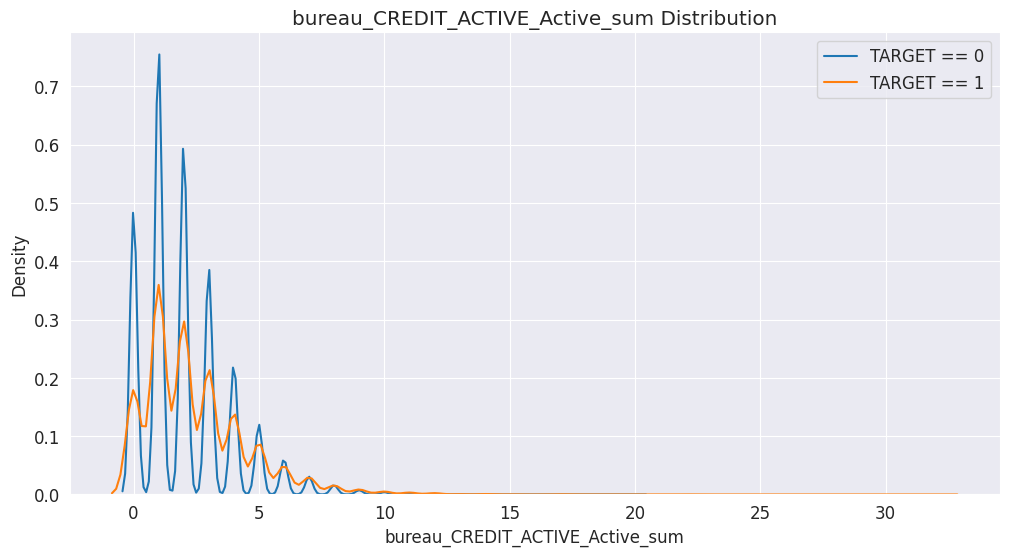

In [ ]:
kde_target(var_name='bureau_CREDIT_ACTIVE_Active_sum', df=app_bureau_train_raw)

The correlation between client_bureau_balance_MONTHS_BALANCE_count_min and the TARGET is -0.0482
Median value for loan that was not repaid = 8.0000
Median value for loan that was repaid     = 10.0000


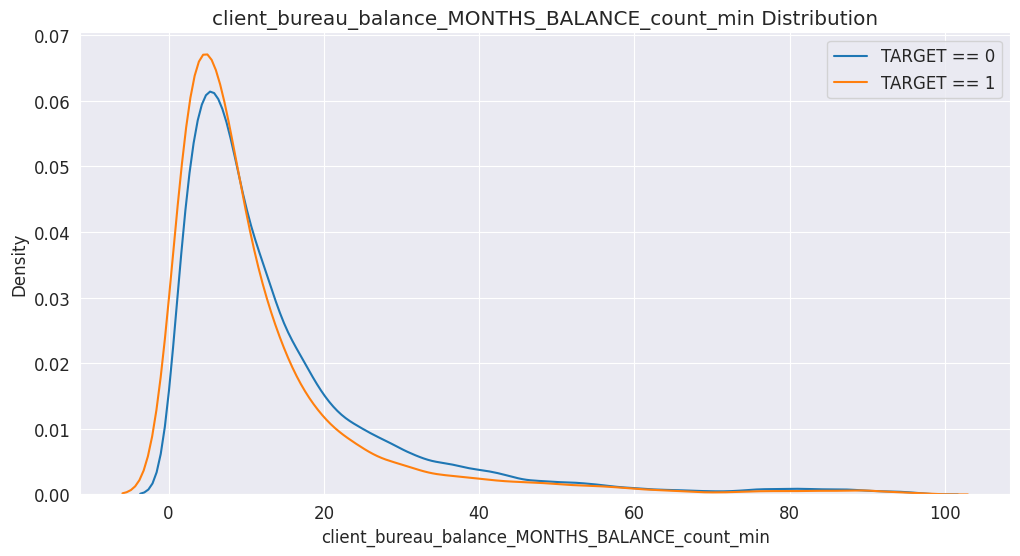

In [ ]:
kde_target(var_name='client_bureau_balance_MONTHS_BALANCE_count_min', df=app_bureau_train_raw)

**Collinear Variables**

We can calculate not only the correlations of the variables with the target, but also the correlation of each variable with every other variable. This will allow us to see if there are highly collinear variables that should perhaps be removed from the data.

In [ ]:
new_bureau_corrs  = target_corrs(app_bureau_train_raw)
new_bureau_corrs = sorted(new_bureau_corrs, key = lambda x: abs(x[1]), reverse = True)
new_bureau_corrs[:15]

[('EXT_SOURCE_2 EXT_SOURCE_3', -0.19393864543426526),
 ('EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3', -0.18960450425150702),
 ('EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH', -0.18128346624005637),
 ('EXT_SOURCE_2^2 EXT_SOURCE_3', -0.1764281694047899),
 ('EXT_SOURCE_2 EXT_SOURCE_3^2', -0.17228232803945462),
 ('EXT_SOURCE_1 EXT_SOURCE_2', -0.166624812586227),
 ('EXT_SOURCE_1 EXT_SOURCE_3', -0.16406534987479138),
 ('EXT_SOURCE_2', -0.16029475332179846),
 ('EXT_SOURCE_2 DAYS_BIRTH', -0.15687301227155515),
 ('EXT_SOURCE_1 EXT_SOURCE_2^2', -0.1568670934379641),
 ('EXT_SOURCE_3', -0.1558916869030227),
 ('EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH', -0.15589109886501226),
 ('EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH', -0.1518159246463048),
 ('EXT_SOURCE_1 EXT_SOURCE_3^2', -0.15082202772046638),
 ('EXT_SOURCE_3 DAYS_BIRTH', -0.15010890862274445)]

In [ ]:
# Calculate all correlations in dataframe
corrs = app_bureau_train_raw.corr()
corrs = corrs.sort_values('TARGET', ascending = False)
corrs

SK_ID_CURR  \
TARGET                                           -0.002108   
bureau_DAYS_CREDIT_mean                           0.003636   
client_bureau_balance_MONTHS_BALANCE_min_mean     0.003236   
bureau_CREDIT_ACTIVE_Active_mean                  0.001229   
client_bureau_balance_MONTHS_BALANCE_mean_mean    0.001963   
...                                                    ...   
EXT_SOURCE_2 EXT_SOURCE_3^2                       0.001338   
EXT_SOURCE_2^2 EXT_SOURCE_3                       0.001527   
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH              0.001149   
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3            0.001189   
EXT_SOURCE_2 EXT_SOURCE_3                         0.001658   

                                                NAME_CONTRACT_TYPE  \
TARGET                                                   -0.030896   
bureau_DAYS_CREDIT_mean                                   0.039851   
client_bureau_balance_MONTHS_BALANCE_min_mean            -0.003288   
bureau_CREDIT_ACTIVE_Active_mean                          0.032164   
client_bureau_balance_MONTHS_BALANCE_mean_mean            0.018464   
...                                                            ...   
EXT_SOURCE_2 EXT_SOURCE_3^2                               0.004027   
EXT_SOURCE_2^2 EXT_SOURCE_3                               0.008925   
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH                     -0.029004   
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3                    0.003776   
EXT_SOURCE_2 EXT_SOURCE_3                                 0.008314   

                                                FLAG_OWN_CAR  FLAG_OWN_REALTY  \
TARGET                                             -0.021851        -0.006148   
bureau_DAYS_CREDIT_mean                            -0.023647        -0.004221   
client_bureau_balance_MONTHS_BALANCE_min_mean      -0.024280        -0.013745   
bureau_CREDIT_ACTIVE_Active_mean                   -0.000078        -0.009996   
client_bureau_balance_MONTHS_BALANCE_mean_mean     -0.023849        -0.024111   
...                                                      ...              ...   
EXT_SOURCE_2 EXT_SOURCE_3^2                         0.015976         0.029366   
EXT_SOURCE_2^2 EXT_SOURCE_3                         0.033728         0.019060   
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH               -0.035909         0.067948   
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3              0.003346         0.040773   
EXT_SOURCE_2 EXT_SOURCE_3                           0.026664         0.023925   

                                                CNT_CHILDREN  \
TARGET                                              0.019187   
bureau_DAYS_CREDIT_mean                             0.026094   
client_bureau_balance_MONTHS_BALANCE_min_mean       0.021236   
bureau_CREDIT_ACTIVE_Active_mean                    0.013221   
client_bureau_balance_MONTHS_BALANCE_mean_mean      0.013089   
...                                                      ...   
EXT_SOURCE_2 EXT_SOURCE_3^2                        -0.039596   
EXT_SOURCE_2^2 EXT_SOURCE_3                        -0.035572   
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH               -0.175433   
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3             -0.073692   
EXT_SOURCE_2 EXT_SOURCE_3                          -0.037726   

                                                AMT_INCOME_TOTAL  AMT_CREDIT  \
TARGET                                                 -0.003982   -0.030369   
bureau_DAYS_CREDIT_mean                                -0.008837   -0.084393   
client_bureau_balance_MONTHS_BALANCE_min_mean          -0.025563   -0.083456   
bureau_CREDIT_ACTIVE_Active_mean                        0.016527   -0.021280   
client_bureau_balance_MONTHS_BALANCE_mean_mean         -0.021474   -0.074322   
...                                                          ...         ...   
EXT_SOURCE_2 EXT_SOURCE_3^2                             0.008854    0.090770   
EXT_SOURCE_2^2 EXT_SOURCE_3                             0.039285    0.127608   


In [ ]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [ ]:
above_threshold_vars

{'SK_ID_CURR': ['SK_ID_CURR'],
 'NAME_CONTRACT_TYPE': ['NAME_CONTRACT_TYPE'],
 'FLAG_OWN_CAR': ['FLAG_OWN_CAR'],
 'FLAG_OWN_REALTY': ['FLAG_OWN_REALTY'],
 'CNT_CHILDREN': ['CNT_CHILDREN', 'CNT_FAM_MEMBERS'],
 'AMT_INCOME_TOTAL': ['AMT_INCOME_TOTAL', 'INCOME_PER_PERSON'],
 'AMT_CREDIT': ['AMT_CREDIT', 'AMT_GOODS_PRICE'],
 'AMT_ANNUITY': ['AMT_ANNUITY'],
 'AMT_GOODS_PRICE': ['AMT_CREDIT', 'AMT_GOODS_PRICE'],
 'REGION_POPULATION_RELATIVE': ['REGION_POPULATION_RELATIVE'],
 'DAYS_EMPLOYED': ['DAYS_EMPLOYED', 'DAYS_EMPLOYED_PERCENT'],
 'DAYS_REGISTRATION': ['DAYS_REGISTRATION'],
 'DAYS_ID_PUBLISH': ['DAYS_ID_PUBLISH'],
 'OWN_CAR_AGE': ['OWN_CAR_AGE'],
 'FLAG_EMP_PHONE': ['FLAG_EMP_PHONE'],
 'FLAG_WORK_PHONE': ['FLAG_WORK_PHONE'],
 'FLAG_CONT_MOBILE': ['FLAG_CONT_MOBILE'],
 'FLAG_PHONE': ['FLAG_PHONE'],
 'FLAG_EMAIL': ['FLAG_EMAIL'],
 'CNT_FAM_MEMBERS': ['CNT_CHILDREN', 'CNT_FAM_MEMBERS'],
 'REGION_RATING_CLIENT': ['REGION_RATING_CLIENT_W_CITY',
  'REGION_RATING_CLIENT'],
 'REGION_RATING_CLIE

In [ ]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)

cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  143


In [ ]:
cols_to_remove.sort()
cols_to_remove

['AMT_GOODS_PRICE',
 'APARTMENTS_MEDI',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_MODE',
 'CNT_FAM_MEMBERS',
 'COMMONAREA_MEDI',
 'COMMONAREA_MODE',
 'DAYS_BIRTH^2',
 'DAYS_BIRTH^3',
 'DAYS_EMPLOYED_ANOM',
 'DAYS_EMPLOYED_PERCENT',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'ELEVATORS_MODE',
 'EMERGENCYSTATE_MODE_No',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2

In [ ]:
poly_feat = ['DAYS_BIRTH^2',
 'DAYS_BIRTH^3',
 'DAYS_EMPLOYED_ANOM',
 'DAYS_EMPLOYED_PERCENT',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3^3']

In [ ]:
filtered_list = list(filter(lambda x: x not in poly_feat, cols_to_remove))
print(filtered_list)

['AMT_GOODS_PRICE', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'CNT_FAM_MEMBERS', 'COMMONAREA_MEDI', 'COMMONAREA_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'EMERGENCYSTATE_MODE_No', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_MODE', 'INCOME_PER_PERSON', 'LANDAREA_MEDI', 'LANDAREA_MODE', 'LIVE_CITY_NOT_WORK_CITY', 'LIVE_REGION_NOT_WORK_REGION', 'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'ORGANIZATION_TYPE_XNA', 'REGION_RATING_CLIENT_W_CITY', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE', 'bureau_AMT_ANNUITY_sum', 'bureau_AMT_CREDIT_MAX_OVERDUE_max', 'bureau_AMT_CRED

In [ ]:
train_corrs_removed = app_bureau_train_raw.drop(columns = filtered_list)
test_corrs_removed = app_bureau_test_raw.drop(columns = filtered_list)

print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 349)
Testing Corrs Removed Shape:  (48744, 348)


In [ ]:
del app_bureau_train_raw, app_bureau_test_raw
gc.collect()

264

In [ ]:
train_corrs_removed.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_bureau_corrs_removed2.csv', index = False)
test_corrs_removed.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_test_bureau_corrs_removed2.csv', index = False)

In [ ]:
app_bureau_train_corrs_removed = pd.read_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_bureau_corrs_removed2.csv')
app_bureau_test_corrs_removed = pd.read_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_test_bureau_corrs_removed2.csv')

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb

**LightGBM** (Light Gradient Boosting Machine) is a popular open-source framework that's widely used in machine learning projects, especially for handling large datasets and achieving high-performance results.

It belongs to the family of ensemble learning techniques based on the gradient boosting framework. Gradient boosting works by combining multiple weak learners (usually decision trees) sequentially to create a strong predictive model.

It's fast and memory-efficient, often yields competitive performance in various machine learning tasks.

It offers a range of parameters that can be tuned for specific use cases.

In [ ]:
def model(train_df, test_features, n_folds = 5):

    """Train and test a light gradient boosting model using
    cross validation.

    Parameters
    --------
        train_df (pd.DataFrame):
            dataframe of training features to use
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame):
            dataframe of testing features to use
        n_folds (int, default = 5): number of folds to use for cross validation

    Return
    --------
        submission (pd.DataFrame):
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame):
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame):
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.

    """

    # Extract the ids
    train_ids = train_df['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']

    # Extract the labels for training
    labels = train_df['TARGET']

    # Remove the ids and target
    features = train_df.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])

    # Extract feature names
    feature_names = list(features.columns)

    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)

    # Median imputation of missing values
    imputer = SimpleImputer(strategy = 'median')

    # Scale each feature to 0-1
    scaler = MinMaxScaler()

    # Fit on the training data
    imputer.fit(features)

    # Transform both training and testing data
    features = imputer.transform(features)
    test_features = imputer.transform(test_features)

    # Repeat with the scaler
    scaler.fit(features)
    features = scaler.transform(features)
    test_features = scaler.transform(test_features)

    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))

    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []

    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):

        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]

        # Create the model
        model = lgb.LGBMClassifier(n_estimators=400, objective = 'binary',
                                   class_weight = 'balanced', learning_rate = 0.05,
                                   reg_alpha = 0.1, reg_lambda = 0.1,
                                   early_stopping_rounds = 100,
                                   subsample = 0.8, n_jobs = -1, random_state = 50,)

        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = 'auto')

        # Record the best iteration
        best_iteration = model.best_iteration_

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]

        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})

    return submission, feature_importances, metrics

In [ ]:
submission_feat, fi_feat, metrics_feat = model(app_train_feat_zero, app_test_feat_zero)
print('Baseline metrics')
print(metrics_feat)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 19919, number of negative: 226089
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.899550
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.419155
[LightGBM] [Debug] init for col-wise cost 0.276095 seconds, init for row-wise cost 0.941785 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.127434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 20270
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 266
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start t

In [ ]:
def plot_feature_importances(df):
    """
    Plot importances returned by a model. This can work with any measure of
    feature importance provided that higher importance is better.

    Args:
        df (dataframe): feature importances. Must have the features in a column
        called `features` and the importances in a column called `importance

    Returns:
        shows a plot of the 15 most importance features

        df (dataframe): feature importances sorted by importance (highest to lowest)
        with a column for normalized importance
        """

    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()

    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    return df

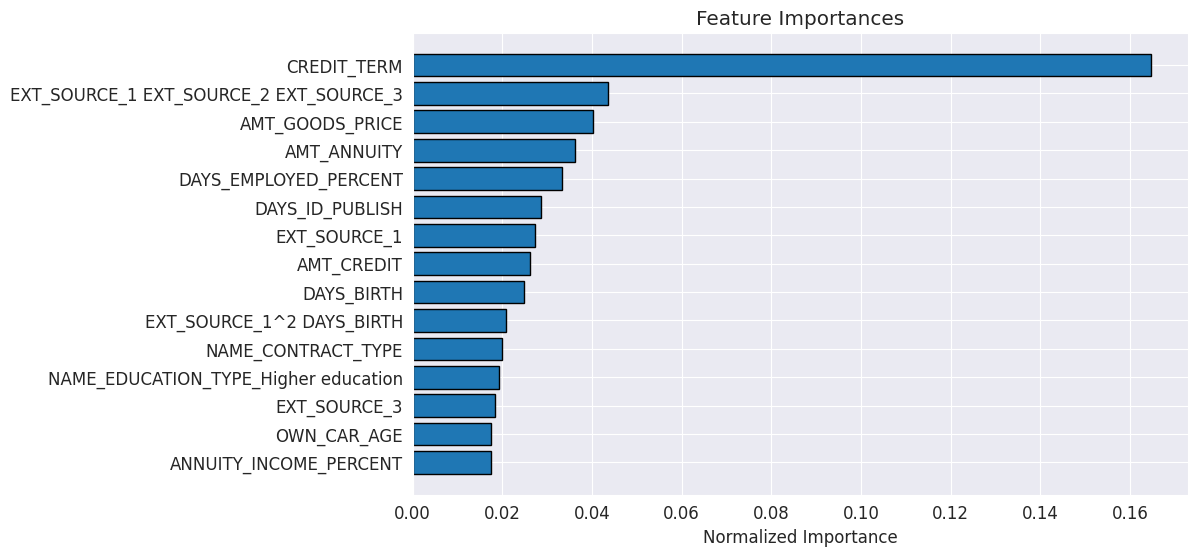

In [ ]:
fi_sorted = plot_feature_importances(fi_feat)

In [ ]:
# Find the features with zero importance
zero_features = list(fi_sorted[fi_sorted['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
fi_sorted.tail()

There are 87 features with 0.0 importance


index                              feature  importance  \
264    170  ORGANIZATION_TYPE_Industry: type 10         0.0   
265    169   ORGANIZATION_TYPE_Industry: type 1         0.0   
266    168            ORGANIZATION_TYPE_Housing         0.0   
267    165          ORGANIZATION_TYPE_Emergency         0.0   
268    140             OCCUPATION_TYPE_Managers         0.0   

     importance_normalized  
264                    0.0  
265                    0.0  
266                    0.0  
267                    0.0  
268                    0.0

In [ ]:
submission_feat.to_csv('lgb_baseline_feat.csv', index = False)

On Kaggle, Our LightGBM based baseline predictions on our application data only with removed zero importance data, scored **0.75336** on private
dataset.

In [ ]:
submission_bureau_feat, fi_bureau, metrics_bureau = model(app_bureau_train_raw, app_bureau_test_raw)
print('Baseline metrics')
print(metrics_feat)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 19919, number of negative: 226089
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.891379
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.548460
[LightGBM] [Debug] init for col-wise cost 0.417771 seconds, init for row-wise cost 0.938844 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.077395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 47134
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 443
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start t

In [ ]:
print('Baseline bureau metrics')
print(metrics_bureau)

Baseline bureau metrics
      fold     train     valid
0        0  0.789852  0.762988
1        1  0.788843  0.763423
2        2  0.787720  0.769005
3        3  0.789003  0.767375
4        4  0.789187  0.762324
5  overall  0.788921  0.764997


In [ ]:
submission_bureau_feat.to_csv('lgb_baseline_bureau_feat.csv', index = False)

On Kaggle, Our LightGBM based baseline predictions on our application data with bureau and bureau balance data, scored **0.76031** on private
dataset.

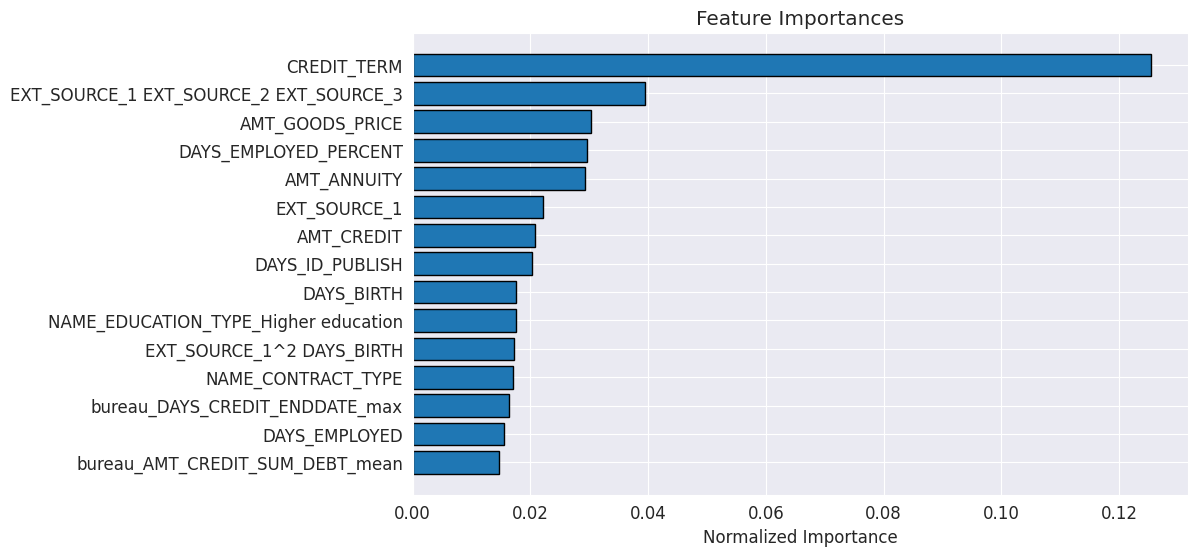

In [ ]:
fi_bureau_sorted = plot_feature_importances(fi_bureau)

In [ ]:
# Find the features with zero importance
zero_features = list(fi_bureau_sorted[fi_bureau_sorted['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
fi_bureau_sorted.tail()

There are 186 features with 0.0 importance


index                               feature  importance  \
455    147  OCCUPATION_TYPE_Waiters/barmen staff         0.0   
456    146        OCCUPATION_TYPE_Security staff         0.0   
457     24           LIVE_REGION_NOT_WORK_REGION         0.0   
458     22            REG_REGION_NOT_LIVE_REGION         0.0   
459    260                        EXT_SOURCE_3^3         0.0   

     importance_normalized  
455                    0.0  
456                    0.0  
457                    0.0  
458                    0.0  
459                    0.0

In [ ]:
zero_features

['AMT_REQ_CREDIT_BUREAU_HOUR',
 'CNT_CHILDREN',
 'DAYS_BIRTH^2',
 'DAYS_BIRTH^3',
 'DAYS_EMPLOYED_ANOM',
 'EMERGENCYSTATE_MODE_Yes',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3^3',
 'FLAG_CONT_MOBILE',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_EMAIL',
 'FONDKAPREMONT_MODE_org spec account',
 'FONDKAPREMONT_MODE_reg oper account',
 'FONDKAPREMONT_MODE_reg oper spec account',
 'HOUSETYPE_MODE_specific housing',
 'LIVE_CITY_NOT_WORK_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Rented apar

In [ ]:
train_zero_removed = app_bureau_train_raw.drop(columns = zero_features)
test_zero_removed = app_bureau_test_raw.drop(columns = zero_features)

print('Training Corrs Removed Shape: ', train_zero_removed.shape)
print('Testing Corrs Removed Shape: ', test_zero_removed.shape)

Training Corrs Removed Shape:  (307511, 276)
Testing Corrs Removed Shape:  (48744, 275)


In [ ]:
train_zero_removed.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_bureau_zero_removed.csv', index = False)
test_zero_removed.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_test_bureau_zero_removed.csv', index = False)

In [ ]:
submission_bureau_corrs, fi_corrs, metrics_corrs = model(app_bureau_train_corrs_removed, app_bureau_test_corrs_removed)
print('Baseline metrics corrs removed')
print(metrics_corrs)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 19919, number of negative: 226089
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.917372
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.578815
[LightGBM] [Debug] init for col-wise cost 1.566460 seconds, init for row-wise cost 0.596319 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.681001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30481
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 335
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start t

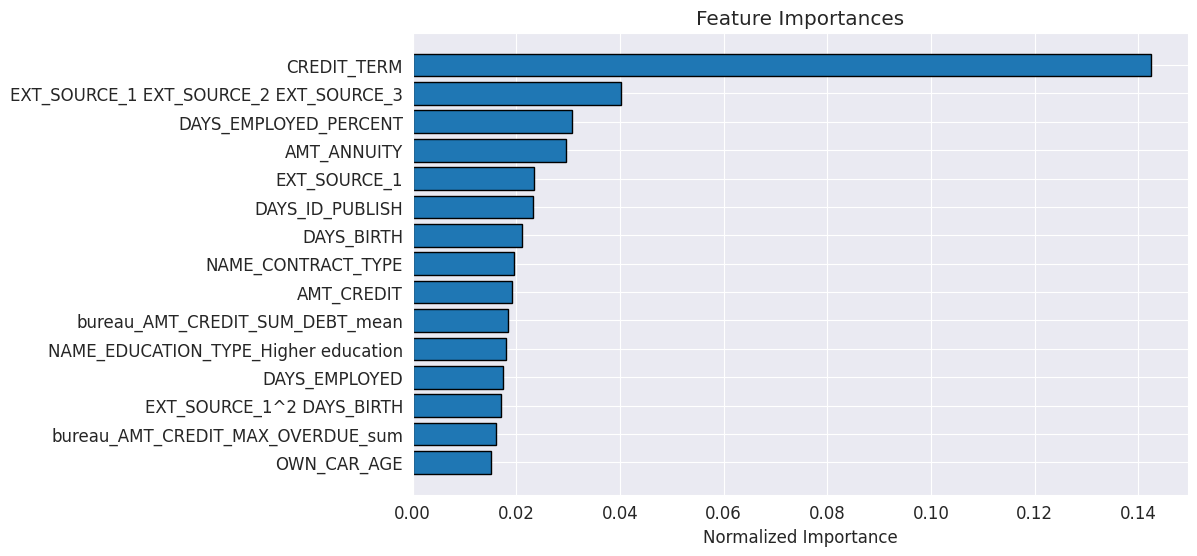

In [ ]:
fi_corrs_sorted = plot_feature_importances(fi_corrs)

In [ ]:
# Find the features with zero importance
zero_features = list(fi_corrs_sorted[fi_corrs_sorted['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
fi_corrs_sorted.tail()

There are 144 features with 0.0 importance


index                                 feature  importance  \
342    164         ORGANIZATION_TYPE_Trade: type 4         0.0   
343    163         ORGANIZATION_TYPE_Trade: type 3         0.0   
344     64         NAME_TYPE_SUITE_Group of people         0.0   
345    161         ORGANIZATION_TYPE_Trade: type 1         0.0   
346    270  bureau_CREDIT_CURRENCY_currency 3_mean         0.0   

     importance_normalized  
342                    0.0  
343                    0.0  
344                    0.0  
345                    0.0  
346                    0.0

In [ ]:
submission_bureau_corrs.to_csv('lgb_baseline_bureau_corrs_removed.csv', index = False)

On Kaggle, Our LightGBM based baseline predictions on our application with bureau and bureau balance and removed correlated data, scored **0.75905** on private
dataset.

In [ ]:
submission_bureau_wo_zero, fi_wo_zero, metrics_wo_zero = model(train_zero_removed, test_zero_removed)
print('Baseline metrics zero imp features removed')
print(metrics_wo_zero)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 19919, number of negative: 226089
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.826932
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.417290
[LightGBM] [Debug] init for col-wise cost 0.259611 seconds, init for row-wise cost 0.716296 seconds
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.840698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39330
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 274
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start t

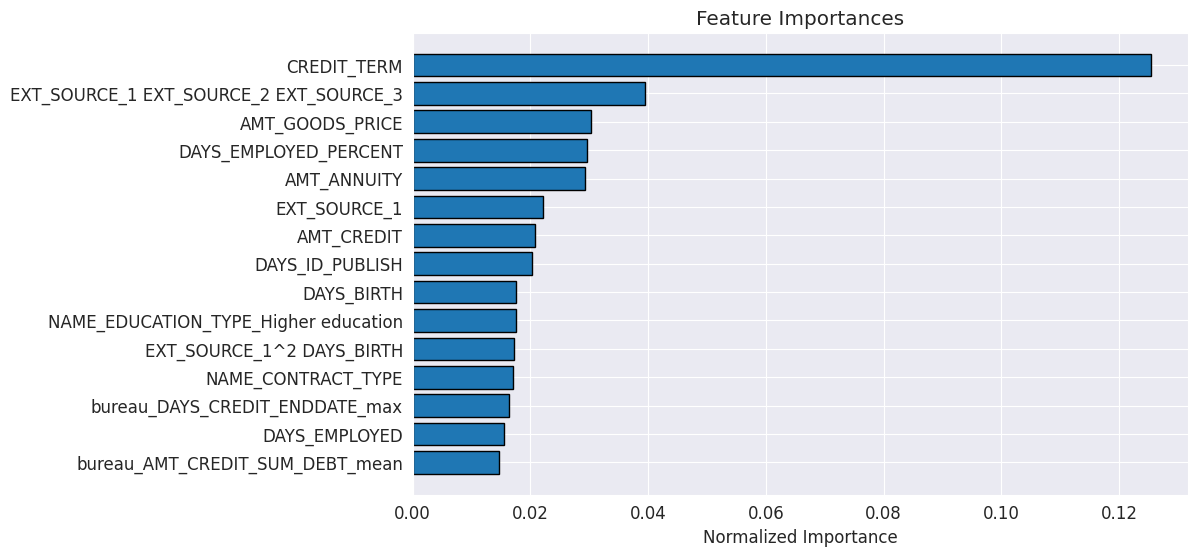

In [ ]:
fi_zero_sorted = plot_feature_importances(fi_wo_zero)

In [ ]:
# Find the features with zero importance
# zero_features = list(fi_zero_sorted[fi_zero_sorted['importance'] == 0.0]['feature'])
# print('There are %d features with 0.0 importance' % len(zero_features))
fi_zero_sorted.tail()

index                                       feature  importance  \
269     80                      NAME_TYPE_SUITE_Children         0.2   
270     12                                FLAG_EMP_PHONE         0.2   
271     74                    AMT_REQ_CREDIT_BUREAU_WEEK         0.2   
272    234  client_bureau_balance_MONTHS_BALANCE_max_max         0.2   
273     21                        REG_CITY_NOT_WORK_CITY         0.2   

     importance_normalized  
269               0.000067  
270               0.000067  
271               0.000067  
272               0.000067  
273               0.000067

In [ ]:
submission_bureau_wo_zero.to_csv('lgb_baseline_bureau_zero_removed.csv', index = False)

On Kaggle, Our LightGBM based baseline predictions on our application with bureau and bureau balance data without zero importance features, scored **0.76031** same as before on private dataset.

## Applying Operations on other dataframes

In [ ]:
import sys
def return_size(df):
    """Return size of dataframe in gigabytes"""
    return round(sys.getsizeof(df) / 1e9, 2)

In [ ]:
def aggregate_client(df, group_vars, df_names):
    """Aggregate a dataframe with data at the loan level
    at the client level

    Args:
        df (dataframe): data at the loan level
        group_vars (list of two strings): grouping variables for the loan
        and then the client (example ['SK_ID_PREV', 'SK_ID_CURR'])
        names (list of two strings): names to call the resulting columns
        (example ['cash', 'client'])

    Returns:
        df_client (dataframe): aggregated numeric stats at the client level.
        Each client will have a single row with all the numeric data aggregated
    """

    # Aggregate the numeric columns
    df_agg = agg_numeric(df, parent_var = group_vars[0], df_name = df_names[0])

    # If there are categorical variables
    if any(df.dtypes == 'category'):

        # Count the categorical columns
        df_counts = agg_categorical(df, parent_var = group_vars[0], df_name = df_names[0])

        # Merge the numeric and categorical
        df_by_loan = df_counts.merge(df_agg, on = group_vars[0], how = 'outer')

        gc.enable()
        del df_agg, df_counts
        gc.collect()

        # Merge to get the client id in dataframe
        df_by_loan = df_by_loan.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, parent_var = group_vars[1], df_name = df_names[1])


    # No categorical variables
    else:
        # Merge to get the client id in dataframe
        df_by_loan = df_agg.merge(df[[group_vars[0], group_vars[1]]], on = group_vars[0], how = 'left')

        gc.enable()
        del df_agg
        gc.collect()

        # Remove the loan id
        df_by_loan = df_by_loan.drop(columns = [group_vars[0]])

        # Aggregate numeric stats by column
        df_by_client = agg_numeric(df_by_loan, parent_var = group_vars[1], df_name = df_names[1])

    # Memory management
    gc.enable()
    del df, df_by_loan
    gc.collect()

    return df_by_client

In [ ]:
%%time
previous_app = pd.read_csv('./previous_application.csv')

CPU times: user 4.66 s, sys: 773 ms, total: 5.44 s
Wall time: 10.5 s


In [ ]:
convert_types(previous_app, print_info=True)
previous_app.head()

Original Memory Usage: 494.38 mb.
New Memory Usage: 167.03 mb.


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE   AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans   1730.430054          17145.0   
1     2802425      108129         Cash loans  25188.615234         607500.0   
2     2523466      122040         Cash loans  15060.735352         112500.0   
3     2819243      176158         Cash loans  47041.335938         450000.0   
4     1784265      202054         Cash loans  31924.394531         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [ ]:
# Calculate aggregate statistics for each numeric column
previous_agg = agg_numeric(previous_app, 'SK_ID_CURR', 'previous')
print('Previous aggregation shape: ', previous_agg.shape)
previous_agg.head()

Previous aggregation shape:  (338857, 84)


previous_DAYS_DECISION_sum  previous_DAYS_DECISION_min  \
SK_ID_CURR                                                           
100001                           -1740                       -1740   
100002                            -606                        -606   
100003                           -3915                       -2341   
100004                            -815                        -815   
100005                           -1072                        -757   

            previous_DAYS_DECISION_mean  previous_DAYS_DECISION_max  \
SK_ID_CURR                                                            
100001                          -1740.0                       -1740   
100002                           -606.0                        -606   
100003                          -1305.0                        -746   
100004                           -815.0                        -815   
100005                           -536.0                        -315   

            previous_DAYS_FIRST_DUE_sum  previous_DAYS_FIRST_DUE_min  \
SK_ID_CURR                                                             
100001                          -1709.0                      -1709.0   
100002                           -565.0                       -565.0   
100003                          -3823.0                      -2310.0   
100004                           -784.0                       -784.0   
100005                           -706.0                       -706.0   

            previous_DAYS_FIRST_DUE_mean  previous_DAYS_FIRST_DUE_max  \
SK_ID_CURR                                                              
100001                      -1709.000000                      -1709.0   
100002                       -565.000000                       -565.0   
100003                      -1274.333374                       -716.0   
100004                       -784.000000                       -784.0   
100005                       -706.000000                       -706.0   

            previous_DAYS_LAST_DUE_sum  previous_DAYS_LAST_DUE_min  ...  \
SK_ID_CURR                                                          ...   
100001                         -1619.0                     -1619.0  ...   
100002                           -25.0                       -25.0  ...   
100003                         -3163.0                     -1980.0  ...   
100004                          -724.0                      -724.0  ...   
100005                          -466.0                      -466.0  ...   

            previous_DAYS_FIRST_DRAWING_min  previous_DAYS_FIRST_DRAWING_mean  \
SK_ID_CURR                                                                      
100001                             365243.0                          365243.0   
100002                             365243.0                          365243.0   
100003                             365243.0                          365243.0   
100004                             365243.0                          365243.0   
100005                             365243.0                          365243.0   

            previous_DAYS_FIRST_DRAWING_max  previous_DAYS_FIRST_DRAWING_sum  \
SK_ID_CURR                                                                     
100001                             365243.0                         365243.0   
100002                             365243.0                         365243.0   
100003                             365243.0                        1095729.0   
100004                             365243.0                         365243.0   
100005                             365243.0                         365243.0   

            previous_RATE_INTEREST_PRIMARY_min  \
SK_ID_CURR                                       
100001                                     NaN   
100002                                     NaN   
100003                                     NaN   
100004                                     NaN   
100005                                     NaN   



In [ ]:
# Calculate value counts for each categorical column
previous_counts = agg_categorical(previous_app, 'SK_ID_CURR', 'previous')
print('Previous counts shape: ', previous_counts.shape)
previous_counts.head()

Previous counts shape:  (338857, 285)


previous_NAME_GOODS_CATEGORY_Animals_mean  \
SK_ID_CURR                                              
100001                                            0.0   
100002                                            0.0   
100003                                            0.0   
100004                                            0.0   
100005                                            0.0   

            previous_NAME_GOODS_CATEGORY_Animals_sum  \
SK_ID_CURR                                             
100001                                             0   
100002                                             0   
100003                                             0   
100004                                             0   
100005                                             0   

            previous_NAME_GOODS_CATEGORY_House Construction_mean  \
SK_ID_CURR                                                         
100001                                                    0.0      
100002                                                    0.0      
100003                                                    0.0      
100004                                                    0.0      
100005                                                    0.0      

            previous_NAME_GOODS_CATEGORY_House Construction_sum  \
SK_ID_CURR                                                        
100001                                                      0     
100002                                                      0     
100003                                                      0     
100004                                                      0     
100005                                                      0     

            previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_mean  \
SK_ID_CURR                                                                  
100001                                                    0.0               
100002                                                    0.0               
100003                                                    0.0               
100004                                                    0.0               
100005                                                    0.0               

            previous_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_sum  \
SK_ID_CURR                                                                 
100001                                                      0              
100002                                                      0              
100003                                                      0              
100004                                                      0              
100005                                                      0              

            previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_mean  \
SK_ID_CURR                                                                  
100001                                                    0.0               
100002                                                    0.0               
100003                                                    0.0               
100004                                                    0.0               
100005                                                    0.0               

            previous_NAME_CASH_LOAN_PURPOSE_Money for a third person_sum  \
SK_ID_CURR                                                                 
100001                                                      0              
100002                                                      0              
100003                                                      0              
100004                                                      0              
100005                                                      0              

            previous_NAME_CASH_LOAN_PURPOSE_Hobby_mean  \
SK_ID_CURR                                               
100001    

In [ ]:
# Merge in the previous information
app_train_prev = app_train_feat_zero.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
app_train_prev = app_train_prev.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

app_test_prev = app_test_feat_zero.merge(previous_counts, on ='SK_ID_CURR', how = 'left')
app_test_prev = app_test_prev.merge(previous_agg, on = 'SK_ID_CURR', how = 'left')

# Remove variables to free memory
gc.enable()
del previous_app, previous_agg, previous_counts
gc.collect()

0

In [ ]:
def remove_missing_columns(train, test, threshold = 90):
    # Calculate missing stats for train and test (remember to calculate a percent!)
    train_miss = pd.DataFrame(train.isnull().sum())
    train_miss['percent'] = 100 * train_miss[0] / len(train)

    test_miss = pd.DataFrame(test.isnull().sum())
    test_miss['percent'] = 100 * test_miss[0] / len(test)

    # list of missing columns for train and test
    missing_train_columns = list(train_miss.index[train_miss['percent'] > threshold])
    missing_test_columns = list(test_miss.index[test_miss['percent'] > threshold])

    # Combine the two lists together
    missing_columns = list(set(missing_train_columns + missing_test_columns))

    # Print information
    print('There are %d columns with greater than %d%% missing values.' % (len(missing_columns), threshold))

    # Drop the missing columns and return
    train = train.drop(columns = missing_columns)
    test = test.drop(columns = missing_columns)

    return train, test

In [ ]:
app_train_prev, app_test_prev = remove_missing_columns(app_train_prev, app_test_prev)

There are 6 columns with greater than 90% missing values.


In [ ]:
app_train_prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 634 entries, SK_ID_CURR to previous_DAYS_FIRST_DRAWING_sum
dtypes: bool(1), float32(156), float64(309), int32(38), uint8(130)
memory usage: 993.3 MB


In [ ]:
%%time
cash = pd.read_csv('./POS_CASH_balance.csv')

CPU times: user 4.37 s, sys: 652 ms, total: 5.02 s
Wall time: 10.8 s


In [ ]:
convert_types(cash, print_info=True)
cash.head()

Original Memory Usage: 640.09 mb.
New Memory Usage: 290.04 mb.


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [ ]:
cash_by_client = aggregate_client(cash, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['cash', 'client'])
cash_by_client.head()

client_cash_MONTHS_BALANCE_sum_sum  \
SK_ID_CURR                                       
100001                                   -2887   
100002                                   -3610   
100003                                  -13240   
100004                                    -408   
100005                                   -2420   

            client_cash_MONTHS_BALANCE_min_sum  \
SK_ID_CURR                                       
100001                                    -669   
100002                                    -361   
100003                                   -1348   
100004                                    -108   
100005                                    -275   

            client_cash_MONTHS_BALANCE_mean_sum  \
SK_ID_CURR                                        
100001                                   -653.0   
100002                                   -190.0   
100003                                  -1226.0   
100004                                   -102.0   
100005                                   -220.0   

            client_cash_MONTHS_BALANCE_max_sum  \
SK_ID_CURR                                       
100001                                    -637   
100002                                     -19   
100003                                   -1104   
100004                                     -96   
100005                                    -165   

            client_cash_MONTHS_BALANCE_sum_min  \
SK_ID_CURR                                       
100001                                    -378   
100002                                    -190   
100003                                    -858   
100004                                    -102   
100005                                    -220   

            client_cash_MONTHS_BALANCE_sum_mean  \
SK_ID_CURR                                        
100001                              -320.777778   
100002                              -190.000000   
100003                              -472.857143   
100004                              -102.000000   
100005                              -220.000000   

            client_cash_MONTHS_BALANCE_sum_max  \
SK_ID_CURR                                       
100001                                    -275   
100002                                    -190   
100003                                    -172   
100004                                    -102   
100005                                    -220   

            client_cash_MONTHS_BALANCE_min_min  \
SK_ID_CURR                                       
100001                                     -96   
100002                                     -19   
100003                                     -77   
100004                                     -27   
100005                                     -25   

            client_cash_MONTHS_BALANCE_mean_min  \
SK_ID_CURR                                        
100001                                    -94.5   
100002                                    -10.0   
100003                                    -71.5   
100004                                    -25.5   
100005                                    -20.0   

            client_cash_MONTHS_BALANCE_max_min  ...  \
SK_ID_CURR                                      ...   
100001                                     -93  ...   
100002                                      -1  ...   
100003                                     -66  ...   
100004                                     -24  ...   
100005                                     -15  ...   

            client_cash_CNT_INSTALMENT_FUTURE_max_sum  \
SK_ID_CURR                                              
100001                                           28.0   
100002                                          456.0   
100003                                          288.0   
100004                                           16.0   
100005                                          132.0   

            client_cash_NAME_CONTRACT_STATUS_A

In [ ]:
print('Cash by Client Shape: ', cash_by_client.shape)
app_train_prev_raw = app_train_prev.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')
app_test_prev_raw = app_test_prev.merge(cash_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del cash, cash_by_client
gc.collect()

Cash by Client Shape:  (337252, 162)


0

In [ ]:
app_train_prev_raw, app_test_prev_raw = remove_missing_columns(app_train_prev_raw, app_test_prev_raw)

There are 0 columns with greater than 90% missing values.


In [ ]:
app_train_prev_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 796 entries, SK_ID_CURR to client_cash_CNT_INSTALMENT_sum_sum
dtypes: bool(1), float32(188), float64(439), int32(38), uint8(130)
memory usage: 1.3 GB


In [ ]:
app_test_prev_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 795 entries, SK_ID_CURR to client_cash_CNT_INSTALMENT_sum_sum
dtypes: bool(1), float32(188), float64(439), int32(37), uint8(130)
memory usage: 211.6 MB


In [ ]:
convert_types(app_train_prev_raw, print_info = True)
convert_types(app_test_prev_raw, print_info = True)

Original Memory Usage: 1400.71 mb.
New Memory Usage: 860.72 mb.
Original Memory Usage: 221.83 mb.
New Memory Usage: 136.24 mb.


In [ ]:
%%time
credit = pd.read_csv('./credit_card_balance.csv')

CPU times: user 4.43 s, sys: 301 ms, total: 4.73 s
Wall time: 9.42 s


In [ ]:
convert_types(credit, print_info = True)
credit.head()

Original Memory Usage: 706.62 mb.
New Memory Usage: 341.79 mb.


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE    AMT_BALANCE  \
0     2562384      378907              -6      56.970001   
1     2582071      363914              -1   63975.554688   
2     1740877      371185              -7   31815.224609   
3     1389973      337855              -4  236572.109375   
4     1891521      126868              -1  453919.468750   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  ...  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0              1700.324951  ...       0.000000              0.000000   
1              2250.000000  ...   64875.554688          64875.554688   
2              2250.000000  ...   31460.085938          31460.085938   
3             11795.759766  ...  233048.968750         233048.968750   
4             22924.890625  ...  453919.468750         453919.468750   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM  NAME_CONTRACT_STATUS  \
0                       1.0                       35.0                Active   
1                       0.0                       69.0                Active   
2                       0.0                       30.0                Active   
3                       0.0                       10.0                Active   
4                       1.0                      101.0                Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0  

[5 rows x 23 columns]

In [ ]:
credit_by_client = aggregate_client(credit, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['credit', 'client'])
credit_by_client.head()

client_credit_MONTHS_BALANCE_sum_sum  \
SK_ID_CURR                                         
100006                                      -126   
100011                                   -210826   
100013                                   -446976   
100021                                     -2890   
100023                                      -480   

            client_credit_MONTHS_BALANCE_min_sum  \
SK_ID_CURR                                         
100006                                       -36   
100011                                     -5550   
100013                                     -9216   
100021                                      -306   
100023                                       -88   

            client_credit_MONTHS_BALANCE_mean_sum  \
SK_ID_CURR                                          
100006                                      -21.0   
100011                                    -2849.0   
100013                                    -4656.0   
100021                                     -170.0   
100023                                      -60.0   

            client_credit_MONTHS_BALANCE_sum_min  \
SK_ID_CURR                                         
100006                                       -21   
100011                                     -2849   
100013                                     -4656   
100021                                      -170   
100023                                       -60   

            client_credit_MONTHS_BALANCE_sum_mean  \
SK_ID_CURR                                          
100006                                      -21.0   
100011                                    -2849.0   
100013                                    -4656.0   
100021                                     -170.0   
100023                                      -60.0   

            client_credit_MONTHS_BALANCE_sum_max  \
SK_ID_CURR                                         
100006                                       -21   
100011                                     -2849   
100013                                     -4656   
100021                                      -170   
100023                                       -60   

            client_credit_MONTHS_BALANCE_max_sum  \
SK_ID_CURR                                         
100006                                        -6   
100011                                      -148   
100013                                       -96   
100021                                       -34   
100023                                       -32   

            client_credit_MONTHS_BALANCE_min_min  \
SK_ID_CURR                                         
100006                                        -6   
100011                                       -75   
100013                                       -96   
100021                                       -18   
100023                                       -11   

            client_credit_MONTHS_BALANCE_min_mean  \
SK_ID_CURR                                          
100006                                       -6.0   
100011                                      -75.0   
100013                                      -96.0   
100021                                      -18.0   
100023                                      -11.0   

            client_credit_MONTHS_BALANCE_min_max  ...  \
SK_ID_CURR                                        ...   
100006                                        -6  ...   
100011                                       -75  ...   
100013                                       -96  ...   
100021                                       -18  ...   
100023                                       -11  ...   

            client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_max  \
SK_ID_CURR                                                    
100006                                                  NaN   
100011                                          2432.432373   
100013                                          6350.0

In [ ]:
print('Credit by client shape: ', credit_by_client.shape)

app_train_prev_raw = app_train_prev_raw.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')
app_test_prev_raw = app_test_prev_raw.merge(credit_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del credit, credit_by_client
gc.collect()

Credit by client shape:  (103558, 376)


0

In [ ]:
app_train_prev_raw, app_test_prev_raw = remove_missing_columns(app_train_prev_raw, app_test_prev_raw)

There are 0 columns with greater than 90% missing values.


In [ ]:
app_train_prev_raw.shape

(307511, 1172)

In [ ]:
convert_types(app_train_prev_raw, print_info = True)
convert_types(app_test_prev_raw, print_info = True)

Original Memory Usage: 1323.22 mb.
New Memory Usage: 1323.22 mb.
Original Memory Usage: 209.55 mb.
New Memory Usage: 209.55 mb.


In [ ]:
app_train_prev_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 1172 entries, SK_ID_CURR to client_credit_AMT_DRAWINGS_ATM_CURRENT_max_max
dtypes: bool(1), float32(1003), int32(38), uint8(130)
memory usage: 1.2 GB


In [ ]:
%%time
installments = pd.read_csv('./installments_payments.csv')

CPU times: user 7.24 s, sys: 645 ms, total: 7.89 s
Wall time: 16.2 s


In [ ]:
convert_types(installments, print_info = True)
installments.head()

Original Memory Usage: 870.75 mb.
New Memory Usage: 435.37 mb.


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT   AMT_PAYMENT  
0          -1180.0             -1187.0     6948.359863   6948.359863  
1          -2156.0             -2156.0     1716.525024   1716.525024  
2            -63.0               -63.0    25425.000000  25425.000000  
3          -2418.0             -2426.0    24350.130859  24350.130859  
4          -1383.0             -1366.0     2165.040039   2160.584961

In [ ]:
installments_by_client = aggregate_client(installments, group_vars = ['SK_ID_PREV', 'SK_ID_CURR'], df_names = ['installments', 'client'])
installments_by_client.head()

client_installments_DAYS_ENTRY_PAYMENT_sum_sum  \
SK_ID_CURR                                                   
100001                                            -52813.0   
100002                                           -113867.0   
100003                                           -367137.0   
100004                                             -6855.0   
100005                                            -49374.0   

            client_installments_DAYS_INSTALMENT_sum_sum  \
SK_ID_CURR                                                
100001                                         -52598.0   
100002                                        -106495.0   
100003                                        -365546.0   
100004                                          -6786.0   
100005                                         -47466.0   

            client_installments_DAYS_ENTRY_PAYMENT_min_sum  \
SK_ID_CURR                                                   
100001                                            -15608.0   
100002                                            -11153.0   
100003                                            -37757.0   
100004                                             -2385.0   
100005                                             -6624.0   

            client_installments_DAYS_INSTALMENT_min_sum  \
SK_ID_CURR                                                
100001                                         -15584.0   
100002                                         -10735.0   
100003                                         -37514.0   
100004                                          -2352.0   
100005                                          -6354.0   

            client_installments_DAYS_ENTRY_PAYMENT_mean_sum  \
SK_ID_CURR                                                    
100001                                             -15365.0   
100002                                              -5993.0   
100003                                             -34633.0   
100004                                              -2285.0   
100005                                              -5486.0   

            client_installments_DAYS_INSTALMENT_mean_sum  \
SK_ID_CURR                                                 
100001                                          -15314.0   
100002                                           -5605.0   
100003                                          -34454.0   
100004                                           -2262.0   
100005                                           -5274.0   

            client_installments_DAYS_ENTRY_PAYMENT_max_sum  \
SK_ID_CURR                                                   
100001                                            -15080.0   
100002                                              -931.0   
100003                                            -31594.0   
100004                                             -2181.0   
100005                                             -4230.0   

            client_installments_DAYS_INSTALMENT_max_sum  \
SK_ID_CURR                                                
100001                                         -15044.0   
100002                                           -475.0   
100003                                         -31394.0   
100004                                          -2172.0   
100005                                          -4194.0   

            client_installments_DAYS_INSTALMENT_sum_min  \
SK_ID_CURR                                                
100001                                          -8658.0   
100002                                          -5605.0   
100003                                         -25740.0   
100004                                          -2262.0   
100005                                          -5274.0   

            client_installments_DAYS_ENTRY_PAYMENT_sum_min  ...  \
SK_ID_CURR                                                  ...   
100001                                             -86

In [ ]:
print('Installments by client shape: ', installments_by_client.shape)
app_train_prev_raw = app_train_prev_raw.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')
app_test_prev_raw = app_test_prev_raw.merge(installments_by_client, on = 'SK_ID_CURR', how = 'left')

gc.enable()
del installments, installments_by_client
gc.collect()

Installments by client shape:  (339587, 106)


0

In [ ]:
convert_types(app_train_prev_raw, print_info = True)
convert_types(app_test_prev_raw, print_info = True)

Original Memory Usage: 1485.59 mb.
New Memory Usage: 1453.6 mb.
Original Memory Usage: 235.29 mb.
New Memory Usage: 230.22 mb.


In [ ]:
app_train_prev_raw, app_test_prev_raw = remove_missing_columns(app_train_prev_raw, app_test_prev_raw)

There are 0 columns with greater than 90% missing values.


In [ ]:
print('Final Training Shape: ', app_train_prev_raw.shape)
print('Final Testing Shape: ', app_test_prev_raw.shape)

Final Training Shape:  (307511, 1278)
Final Testing Shape:  (48744, 1277)


In [ ]:
print(f'Final training size: {return_size(app_train_prev_raw)}')
print(f'Final testing size: {return_size(app_test_prev_raw)}')

Final training size: 1.45
Final testing size: 0.23


In [ ]:
!pip install pyarrow

In [ ]:
app_train_prev_raw.to_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_prev_raw.parquet')
app_test_prev_raw.to_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_test_prev_raw.parquet')

In [ ]:
!ls -lh /content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_prev_raw.parquet

-rw------- 1 root root 312M Nov  3 10:11 /content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_prev_raw.parquet


## Feature Selection

In [ ]:
# Read in data
# train_bureau = pd.read_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_bureau_train_raw.csv')
# test_bureau = pd.read_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_bureau_test_raw.csv')

# train_previous = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_train_prev_raw.parquet')
# test_previous = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/app_test_prev_raw.parquet')

In [ ]:
convert_types(train_bureau, print_info = True)
convert_types(test_bureau, print_info = True)

Original Memory Usage: 1134.41 mb.
New Memory Usage: 567.36 mb.
Original Memory Usage: 179.43 mb.
New Memory Usage: 89.74 mb.


In [ ]:
convert_types(train_previous, print_info = True)
convert_types(test_previous, print_info = True)

Original Memory Usage: 1453.6 mb.
New Memory Usage: 1453.6 mb.
Original Memory Usage: 230.22 mb.
New Memory Usage: 230.22 mb.


In [ ]:
train_bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 462 entries, SK_ID_CURR to TARGET
dtypes: bool(1), float32(293), int32(168)
memory usage: 541.1 MB


In [ ]:
train_previous.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 1278 entries, SK_ID_CURR to client_installments_AMT_INSTALMENT_sum_sum
dtypes: bool(1), float32(1109), int32(38), uint8(130)
memory usage: 1.4 GB


In [ ]:
print(f'''Application and bureau training data shape:{train_bureau.shape}
                       testing data shape:  {test_bureau.shape}''' )
print(f'''Application and previous training data shape:{train_previous.shape}
                         testing data shape: {test_previous.shape}''')

Application and bureau training data shape:(307511, 462)
                       testing data shape:  (48744, 461)
Application and previous training data shape:(307511, 1278)
                         testing data shape: (48744, 1277)


In [ ]:
# All columns in dataframes
bureau_columns = list(train_bureau.columns)
previous_columns = list(train_previous.columns)

In [ ]:
len(set(bureau_columns))

462

In [ ]:
len(set(previous_columns))

1278

In [ ]:
# Bureau only features
bureau_features = list(set(bureau_columns) - set(previous_columns))

# Previous only features
previous_features = list(set(previous_columns) - set(bureau_columns))

# Original features will be in both datasets
original_features = list(set(previous_columns) & set(bureau_columns))

print('There are {} original features.' .format(len(original_features)))
print('There are {} bureau and bureau balance features.' .format(len(bureau_features)))
print('There are {} previous Home Credit loan features.' .format(len(previous_features)))

There are 271 original features.
There are 191 bureau and bureau balance features.
There are 1007 previous Home Credit loan features.


In [ ]:
train_labels = train_bureau['TARGET']
previous_features.append('SK_ID_CURR')

train_ids = train_bureau['SK_ID_CURR']
test_ids = test_bureau['SK_ID_CURR']

# Merge the dataframes avoiding duplicating columns by subsetting train_previous
train = train_bureau.merge(train_previous[previous_features], on = 'SK_ID_CURR')
test = test_bureau.merge(test_previous[previous_features], on = 'SK_ID_CURR')

print('Training shape: ', train.shape)
print('Testing shape: ', test.shape)

In [ ]:
del train_bureau, test_bureau, train_previous
gc.collect()

0

In [ ]:
cols_with_id = [x for x in train.columns if 'SK_ID_CURR' in x]
print('There are {} columns that contain SK_ID_CURR' .format(len(cols_with_id)))

There are 1 columns that contain SK_ID_CURR


In [ ]:
cols_with_id = [x for x in test.columns if 'SK_ID_CURR' in x]
print('There are {} columns that contain SK_ID_CURR'.format(len(cols_with_id)))

There are 1 columns that contain SK_ID_CURR


### Remove missing values

In [ ]:
# Train missing values (in percent)
train_missing = (train.isnull().sum() / len(train)).sort_values(ascending = False)
train_missing.head(15)

client_credit_AMT_PAYMENT_CURRENT_min_min             0.801438
client_credit_AMT_PAYMENT_CURRENT_min_max             0.801438
client_credit_AMT_PAYMENT_CURRENT_max_max             0.801438
client_credit_AMT_PAYMENT_CURRENT_min_mean            0.801438
client_credit_AMT_PAYMENT_CURRENT_max_mean            0.801438
client_credit_AMT_PAYMENT_CURRENT_mean_min            0.801438
client_credit_AMT_PAYMENT_CURRENT_max_min             0.801438
client_credit_AMT_PAYMENT_CURRENT_mean_max            0.801438
client_credit_AMT_PAYMENT_CURRENT_mean_mean           0.801438
client_credit_CNT_DRAWINGS_OTHER_CURRENT_mean_mean    0.801178
client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_min       0.801178
client_credit_CNT_DRAWINGS_POS_CURRENT_mean_mean      0.801178
client_credit_AMT_DRAWINGS_OTHER_CURRENT_mean_mean    0.801178
client_credit_CNT_DRAWINGS_OTHER_CURRENT_min_min      0.801178
client_credit_AMT_DRAWINGS_OTHER_CURRENT_max_max      0.801178
dtype: float64

In [ ]:
# Test missing values (in percent)
test_missing = (test.isnull().sum() / len(test)).sort_values(ascending = False)
test_missing.head(15)

client_credit_CNT_DRAWINGS_OTHER_CURRENT_min_min      0.773223
client_credit_CNT_DRAWINGS_ATM_CURRENT_min_max        0.773223
client_credit_AMT_DRAWINGS_OTHER_CURRENT_max_mean     0.773223
client_credit_AMT_DRAWINGS_OTHER_CURRENT_mean_min     0.773223
client_credit_CNT_DRAWINGS_OTHER_CURRENT_mean_mean    0.773223
client_credit_AMT_DRAWINGS_OTHER_CURRENT_mean_mean    0.773223
client_credit_CNT_DRAWINGS_POS_CURRENT_max_mean       0.773223
client_credit_AMT_DRAWINGS_OTHER_CURRENT_max_max      0.773223
client_credit_CNT_DRAWINGS_POS_CURRENT_mean_min       0.773223
client_credit_AMT_DRAWINGS_POS_CURRENT_mean_min       0.773223
client_credit_CNT_DRAWINGS_POS_CURRENT_mean_mean      0.773223
client_credit_CNT_DRAWINGS_OTHER_CURRENT_mean_min     0.773223
client_credit_AMT_DRAWINGS_OTHER_CURRENT_min_max      0.773223
client_credit_CNT_DRAWINGS_ATM_CURRENT_min_mean       0.773223
client_credit_AMT_DRAWINGS_OTHER_CURRENT_min_mean     0.773223
dtype: float64

In [ ]:
# Identify missing values above threshold
train_missing = train_missing.index[train_missing > 0.75]
test_missing = test_missing.index[test_missing > 0.75]

all_missing = list(set(set(train_missing) | set(test_missing)))
print('There are {} columns with more than 75% missing values' .format(len(all_missing)))

There are 63 columns with more than 75% missing values


In [ ]:
train_final = train.drop(columns = all_missing)
test_final = test.drop(columns = all_missing)

train_final, test_final = train_final.align(test_final, join = 'inner', axis = 1)

print('Training set full shape: ', train_final.shape)
print('Testing set full shape: ' , test_final.shape)

Training set full shape:  (307511, 1405)
Testing set full shape:  (48744, 1405)


### Remove Collinear Variables

In [ ]:
# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = train_final.corr().abs()
corr_matrix.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
SK_ID_CURR            1.000000            0.001654      0.001216   
NAME_CONTRACT_TYPE    0.001654            1.000000      0.004022   
FLAG_OWN_CAR          0.001216            0.004022      1.000000   
FLAG_OWN_REALTY       0.000703            0.067177      0.002817   
CNT_CHILDREN          0.001129            0.029998      0.102023   

                    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                 0.000703      0.001129          0.001820   
NAME_CONTRACT_TYPE         0.067177      0.029998          0.003531   
FLAG_OWN_CAR               0.002817      0.102023          0.083383   
FLAG_OWN_REALTY            1.000000      0.002366          0.002934   
CNT_CHILDREN               0.002366      1.000000          0.012882   

                    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR            0.000343     0.000433         0.000232   
NAME_CONTRACT_TYPE    0.221648     0.241544         0.185850   
FLAG_OWN_CAR          0.116225     0.141588         0.120310   
FLAG_OWN_REALTY       0.039270     0.005225         0.045537   
CNT_CHILDREN          0.002145     0.021374         0.001827   

                    REGION_POPULATION_RELATIVE  ...  \
SK_ID_CURR                            0.000849  ...   
NAME_CONTRACT_TYPE                    0.026867  ...   
FLAG_OWN_CAR                          0.041314  ...   
FLAG_OWN_REALTY                       0.015175  ...   
CNT_CHILDREN                          0.025573  ...   

                    client_credit_NAME_CONTRACT_STATUS_Approved_mean_mean  \
SK_ID_CURR                                                   0.001517       
NAME_CONTRACT_TYPE                                           0.000969       
FLAG_OWN_CAR                                                 0.004145       
FLAG_OWN_REALTY                                              0.001087       
CNT_CHILDREN                                                 0.001767       

                    client_installments_NUM_INSTALMENT_NUMBER_sum_max  \
SK_ID_CURR                                                   0.000524   
NAME_CONTRACT_TYPE                                           0.081018   
FLAG_OWN_CAR                                                 0.004365   
FLAG_OWN_REALTY                                              0.009439   
CNT_CHILDREN                                                 0.024070   

                    client_credit_SK_DPD_DEF_mean_mean  \
SK_ID_CURR                                    0.002596   
NAME_CONTRACT_TYPE                            0.000801   
FLAG_OWN_CAR                                  0.003598   
FLAG_OWN_REALTY                               0.000614   
CNT_CHILDREN                                  0.000328   

                    client_cash_MONTHS_BALANCE_max_mean  \
SK_ID_CURR                                     0.000091   
NAME_CONTRACT_TYPE                             0.119492   
FLAG_OWN_CAR                                   0.034582   
FLAG_OWN_REALTY                                0.074568   
CNT_CHILDREN                                   0.015604   

                    previous_DAYS_FIRST_DUE_mean  \
SK_ID_CURR                              0.002581   
NAME_CONTRACT_TYPE                      0.058327   
FLAG_OWN_CAR                            0.005261   
FLAG_OWN_REALTY                         0.021420   
CNT_CHILDREN                            0.003845   

                    previous_PRODUCT_COMBINATION_POS industry without interest_sum  \
SK_ID_CURR                                                   0.001826                
NAME_CONTRACT_TYPE                                           0.011270                
FLAG_OWN_CAR                                                 0.000806                
FLAG_OWN_REALTY                                              0.011997                
CNT_CHILDREN                                                 0.006622                

                    client_credi

In [ ]:
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

<ipython-input-23-b8b02147a528>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  \
SK_ID_CURR                 NaN            0.001654      0.001216   
NAME_CONTRACT_TYPE         NaN                 NaN      0.004022   
FLAG_OWN_CAR               NaN                 NaN           NaN   
FLAG_OWN_REALTY            NaN                 NaN           NaN   
CNT_CHILDREN               NaN                 NaN           NaN   

                    FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                 0.000703      0.001129          0.001820   
NAME_CONTRACT_TYPE         0.067177      0.029998          0.003531   
FLAG_OWN_CAR               0.002817      0.102023          0.083383   
FLAG_OWN_REALTY                 NaN      0.002366          0.002934   
CNT_CHILDREN                    NaN           NaN          0.012882   

                    AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR            0.000343     0.000433         0.000232   
NAME_CONTRACT_TYPE    0.221648     0.241544         0.185850   
FLAG_OWN_CAR          0.116225     0.141588         0.120310   
FLAG_OWN_REALTY       0.039270     0.005225         0.045537   
CNT_CHILDREN          0.002145     0.021374         0.001827   

                    REGION_POPULATION_RELATIVE  ...  \
SK_ID_CURR                            0.000849  ...   
NAME_CONTRACT_TYPE                    0.026867  ...   
FLAG_OWN_CAR                          0.041314  ...   
FLAG_OWN_REALTY                       0.015175  ...   
CNT_CHILDREN                          0.025573  ...   

                    client_credit_NAME_CONTRACT_STATUS_Approved_mean_mean  \
SK_ID_CURR                                                   0.001517       
NAME_CONTRACT_TYPE                                           0.000969       
FLAG_OWN_CAR                                                 0.004145       
FLAG_OWN_REALTY                                              0.001087       
CNT_CHILDREN                                                 0.001767       

                    client_installments_NUM_INSTALMENT_NUMBER_sum_max  \
SK_ID_CURR                                                   0.000524   
NAME_CONTRACT_TYPE                                           0.081018   
FLAG_OWN_CAR                                                 0.004365   
FLAG_OWN_REALTY                                              0.009439   
CNT_CHILDREN                                                 0.024070   

                    client_credit_SK_DPD_DEF_mean_mean  \
SK_ID_CURR                                    0.002596   
NAME_CONTRACT_TYPE                            0.000801   
FLAG_OWN_CAR                                  0.003598   
FLAG_OWN_REALTY                               0.000614   
CNT_CHILDREN                                  0.000328   

                    client_cash_MONTHS_BALANCE_max_mean  \
SK_ID_CURR                                     0.000091   
NAME_CONTRACT_TYPE                             0.119492   
FLAG_OWN_CAR                                   0.034582   
FLAG_OWN_REALTY                                0.074568   
CNT_CHILDREN                                   0.015604   

                    previous_DAYS_FIRST_DUE_mean  \
SK_ID_CURR                              0.002581   
NAME_CONTRACT_TYPE                      0.058327   
FLAG_OWN_CAR                            0.005261   
FLAG_OWN_REALTY                         0.021420   
CNT_CHILDREN                            0.003845   

                    previous_PRODUCT_COMBINATION_POS industry without interest_sum  \
SK_ID_CURR                                                   0.001826                
NAME_CONTRACT_TYPE                                           0.011270                
FLAG_OWN_CAR                                                 0.000806                
FLAG_OWN_REALTY                                              0.011997                
CNT_CHILDREN                                                 0.006622                

                    client_credi

In [ ]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are {} columns to remove.' .format(len(to_drop)))

There are 552 columns to remove.


In [ ]:
to_drop #'DAYS_EMPLOYED_ANOM','DAYS_EMPLOYED_PERCENT'

['AMT_GOODS_PRICE',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'CODE_GENDER_M',
 'NAME_INCOME_TYPE_Pensioner',
 'ORGANIZATION_TYPE_XNA',
 'EMERGENCYSTATE_MODE_No',
 'DAYS_EMPLOYED_ANOM',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_3^2',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_S

In [ ]:
del corr_matrix, upper
gc.collect()

0

In [ ]:
to_drop.remove('DAYS_EMPLOYED_ANOM')
to_drop.remove('DAYS_EMPLOYED_PERCENT')

In [ ]:
len(to_drop)

550

In [ ]:
train_final = train_final.drop(columns = to_drop)
test_final = test_final.drop(columns = to_drop)

print('Training shape: ', train_final.shape)
print('Testing shape: ', test_final.shape)

Training shape:  (307511, 855)
Testing shape:  (48744, 855)


In [ ]:
del train_missing, test_missing, #train_wo_corrs, test_wo_corrs,

In [ ]:
train_final = train_final.drop(columns = ['SK_ID_CURR'])
test_final = test_final.drop(columns = ['SK_ID_CURR'])

### Feature Selection through Feature Importance

In [ ]:
# modeling
import lightgbm as lgb

# utilities
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [ ]:
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(train_final.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss',
                           n_estimators = 100, class_weight = 'balanced',
                           early_stopping_rounds=100,) #verbose = 200

In [ ]:
cols = list(train_final.columns)
cols

['NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_5',
 

In [ ]:
# import re
# train_final.columns = train_final.columns.str.replace(r'[^\w\s]', '_')

In [ ]:
# Fit the model twice to avoid overfitting
for i in range(2):

    # Split into training and validation set
    train_features, valid_features, train_y, valid_y = train_test_split(train_final, train_labels, test_size = 0.25, random_state = i)

    # Train using early stopping
    model.fit(train_features, train_y, eval_set = [(valid_features, valid_y)],
              eval_metric = 'auc')

    # Record the feature importances
    feature_importances += model.feature_importances_

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 18734, number of negative: 211899
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 1.728007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82425
[LightGBM] [Info] Number

In [ ]:
# Make sure to average feature importances!
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(train_final.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

feature_importances.head()

feature  importance
210                              CREDIT_TERM       125.0
202   EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3        67.0
715  client_installments_AMT_PAYMENT_min_sum        65.5
6                                AMT_ANNUITY        52.5
192                             EXT_SOURCE_1        43.5

In [ ]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 371 features with 0.0 importance


feature  importance
167                     ORGANIZATION_TYPE_Trade_type 4         0.0
522       previous_NAME_GOODS_CATEGORY_Audio_Video_sum         0.0
521                    client_cash_SK_DPD_DEF_min_mean         0.0
520  previous_NAME_CASH_LOAN_PURPOSE_Purchase of el...         0.0
427  previous_NAME_GOODS_CATEGORY_House Constructio...         0.0

In [ ]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.

    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances

    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column

    """

    plt.rcParams['font.size'] = 18

    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()

    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()

    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))),
            df['importance_normalized'].head(15),
            align = 'center', edgecolor = 'k')

    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))

    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()

    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance');
    plt.title('Cumulative Feature Importance');
    plt.show();

    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

    return df

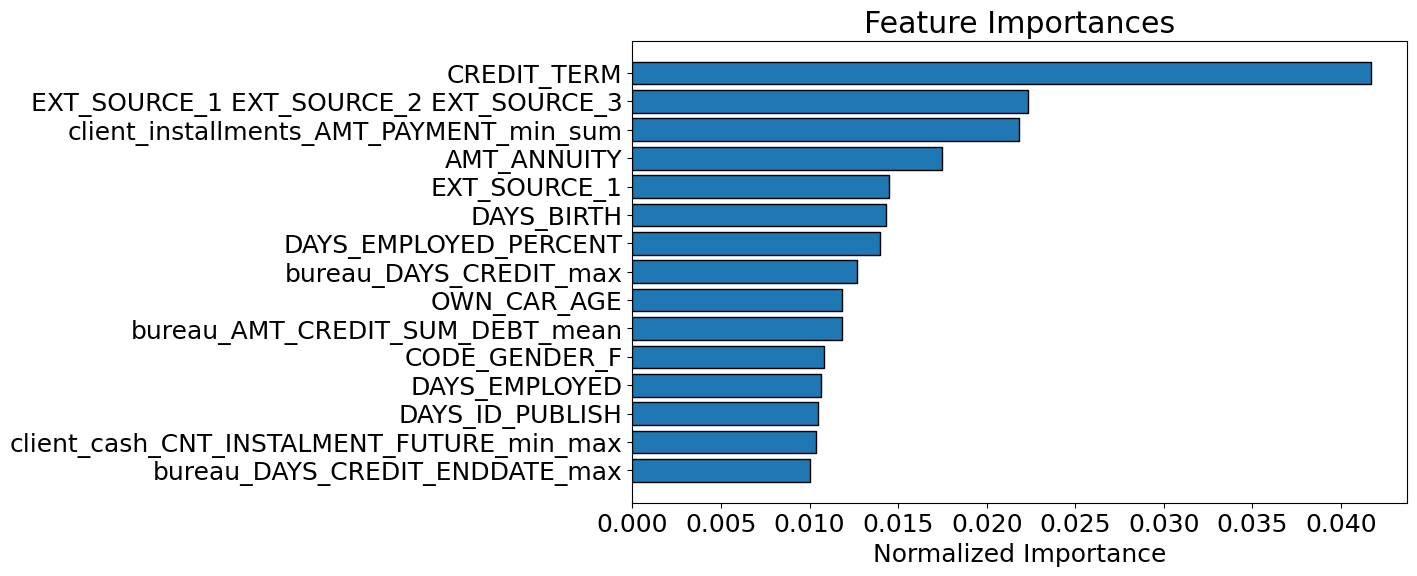

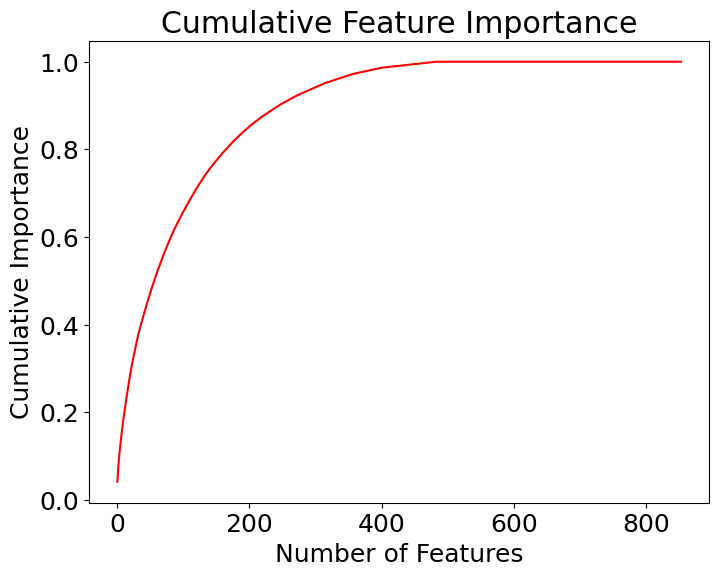

246 features required for 0.90 of cumulative importance


In [ ]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [ ]:
test_final.columns = test_final.columns.str.replace(r'[^\w\s]', '_')
test_final.columns = test_final.columns.str.replace('_ ', '_')
test_final.columns = test_final.columns.str.replace(' _ ', '_')
test_final.columns = test_final.columns.str.replace('__', '_')

<ipython-input-33-fabcd7453f2a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_final.columns = test_final.columns.str.replace(r'[^\w\s]', '_')


In [ ]:
#Let's remove the features that have zero importance.
train_finale = train_final.drop(columns = zero_features)
test_finale = test_final.drop(columns = zero_features)

print('Training shape: ', train_finale.shape)
print('Testing shape: ', train_finale.shape)

Training shape:  (307511, 483)
Testing shape:  (307511, 483)


In [ ]:
del train_final, test_final
gc.collect()

8214

In [ ]:
train_finale.to_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/train_finale.parquet')
test_finale.to_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/test_finale.parquet')

In [ ]:
train_finale = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/train_finale.parquet')
train_finale.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 483 entries, NAME_CONTRACT_TYPE to previous_NAME_PORTFOLIO_Cash_mean
dtypes: float32(423), int32(60)
memory usage: 568.9 MB


In [ ]:
# train_finale['TARGET'] = train_labels

In [ ]:
def identify_zero_importance_features(train, train_labels, iterations = 2):
    """
    Identify zero importance features in a training dataset based on the
    feature importances from a gradient boosting model.

    Parameters
    --------
    train : dataframe
        Training features

    train_labels : np.array
        Labels for training data

    iterations : integer, default = 2
        Number of cross validation splits to use for determining feature importances
    """

    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(train.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 100,
                               early_stopping_rounds=100, class_weight = 'balanced',  verbose = 200)

    # Fit the model multiple times to avoid overfitting
    for i in range(iterations):

        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y,  eval_set = [(valid_features, valid_y)],
                  eval_metric = 'auc')

        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations

    feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)

    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('\nThere are {} features with 0.0 importance' .format(len(zero_features)))

    return zero_features, feature_importances

In [ ]:
second_round_zero_features, feature_importances2 = identify_zero_importance_features(train_finale, train_labels)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 18734, number of negative: 211899
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.842049
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.458764
[LightGBM] [Debug] init for col-wise cost 0.709622 seconds, init for row-wise cost 2.297810 seconds
[LightGBM] [Info] Auto-choos

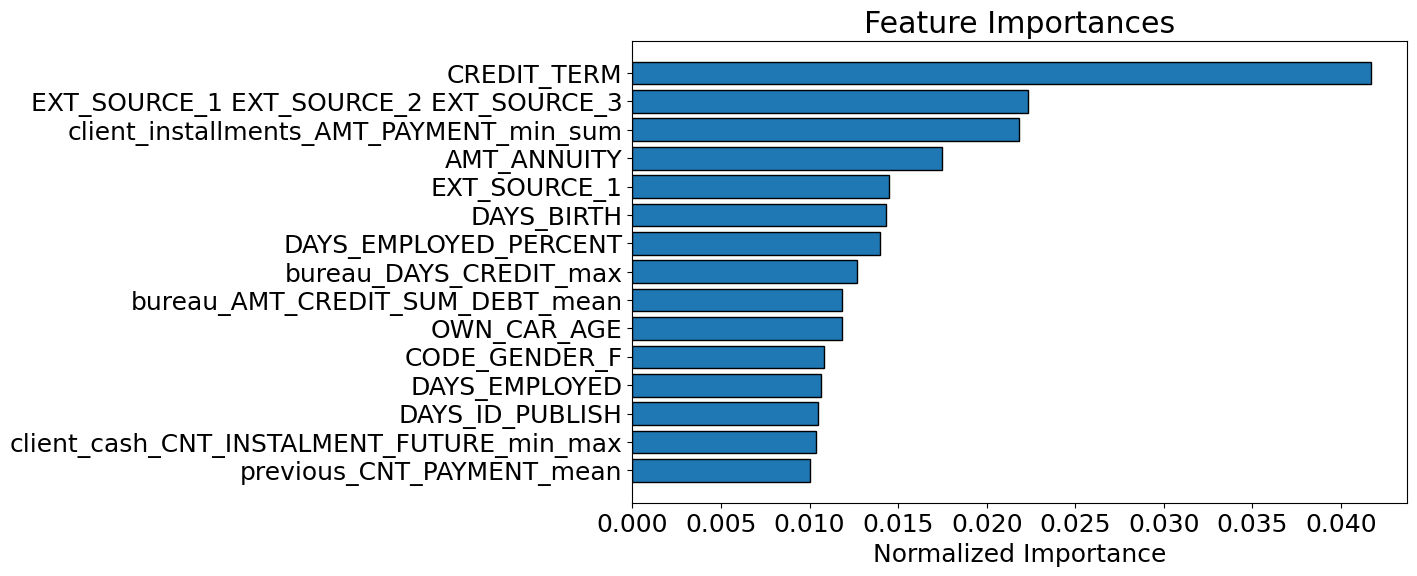

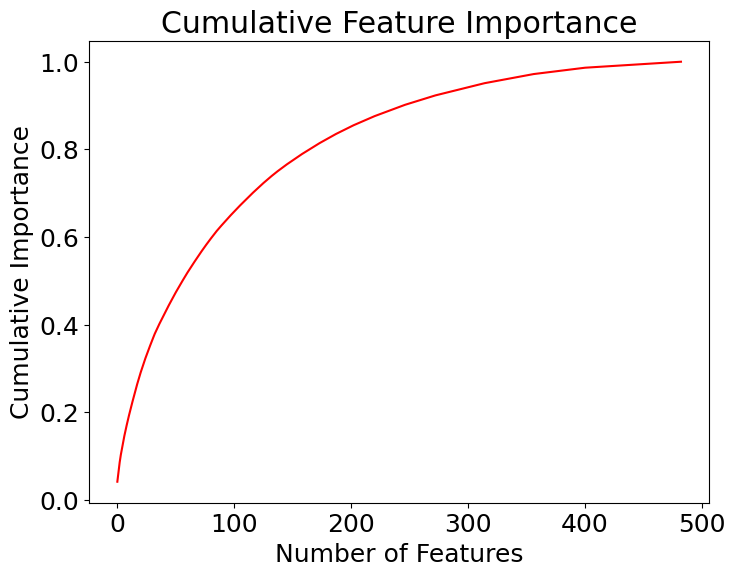

314 features required for 0.95 of cumulative importance


In [ ]:
norm_feature_importances2 = plot_feature_importances(feature_importances2, threshold = 0.95)

We can keep only the features needed for 95% importance. This step seems to me to have the greatest chance of harming the model's learning ability, so rather than changing the original dataset, we will make smaller copies. Then, we can test both versions of the data to see if the extra feature removal step is worthwhile.



In [ ]:
# Threshold for cumulative importance
threshold = 0.95

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])

# Create new datasets with smaller features
train_small = train_finale[features_to_keep]
test_small = test_finale[features_to_keep]

In [ ]:
print(train_small.shape)
print(test_small.shape)

(307511, 313)
(48744, 313)


In [ ]:
train_finale.columns

Index(['NAME_CONTRACT_TYPE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_WORK_PHONE',
       ...
       'client_credit_AMT_DRAWINGS_CURRENT_mean_mean',
       'previous_NAME_SELLER_INDUSTRY_Furniture_sum',
       'client_credit_AMT_RECEIVABLE_PRINCIPAL_sum_mean',
       'previous_NAME_CASH_LOAN_PURPOSE_Payments on other loans_mean',
       'client_cash_MONTHS_BALANCE_mean_sum',
       'client_cash_NAME_CONTRACT_STATUS_Returned to the store_mean_max',
       'previous_NAME_CASH_LOAN_PURPOSE_Other_mean',
       'client_credit_CNT_DRAWINGS_CURRENT_max_sum',
       'client_cash_NAME_CONTRACT_STATUS_Signed_mean_min',
       'previous_NAME_PORTFOLIO_Cash_mean'],
      dtype='object', length=483)

In [ ]:
train_small.to_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/train_small.parquet')
test_small.to_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/test_small.parquet')

In [ ]:
print(len(train_labels))
print(len(train_ids))
print(len(test_ids))

307511
307511
48744


In [ ]:
train_finale = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/train_finale.parquet')
test_finale = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/test_finale.parquet')
print(train_finale.info())
print(test_finale.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 483 entries, NAME_CONTRACT_TYPE to previous_NAME_PORTFOLIO_Cash_mean
dtypes: float32(423), int32(60)
memory usage: 568.9 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 483 entries, NAME_CONTRACT_TYPE to previous_NAME_PORTFOLIO_Cash_mean
dtypes: float32(423), int32(60)
memory usage: 90.2 MB
None


In [ ]:
train_finale['TARGET'] = train_labels
train_finale['SK_ID_CURR'] = train_ids
test_finale['SK_ID_CURR'] = test_ids

In [ ]:
len(train_finale.columns)

485

In [ ]:
submission_finale, fi_finale, metrics_finale = model(train_finale, test_finale)
print('Final metrics on preprocessed training set')
print(metrics_finale)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 19919, number of negative: 226089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.235158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71907
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 483
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[373]	train's auc: 0.86292	train's binary_logloss: 0.477541	valid's auc: 0.785755	valid's binary_logloss: 0.509504
[Li

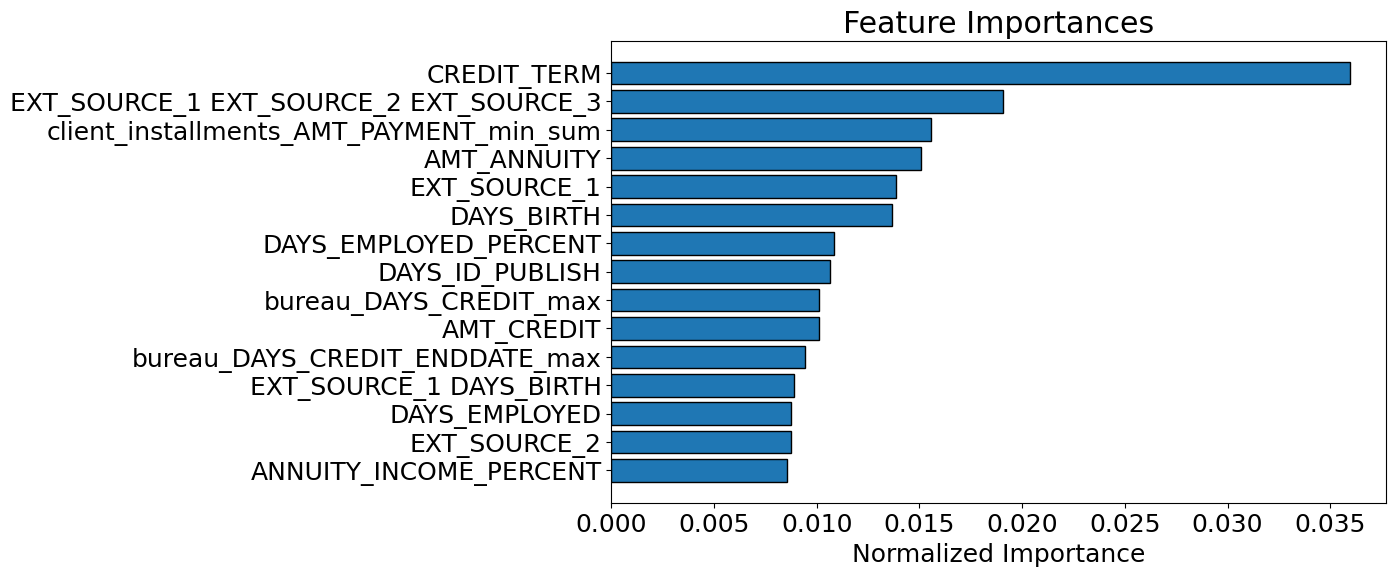

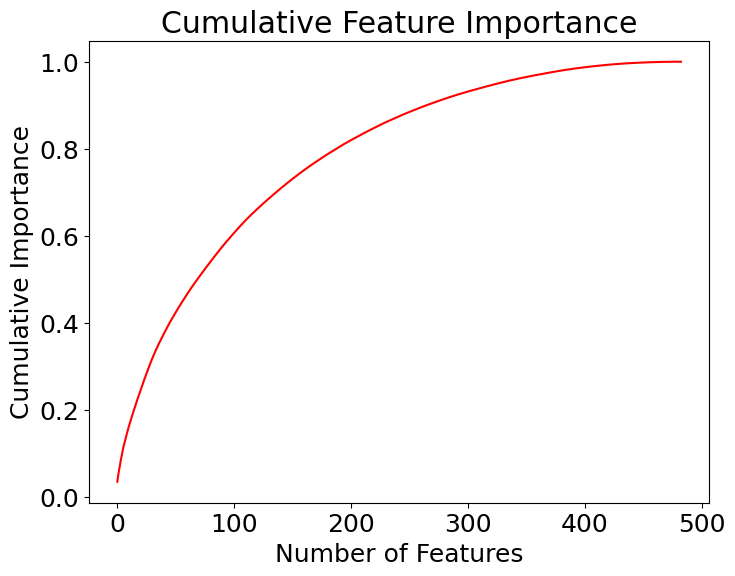

266 features required for 0.90 of cumulative importance


In [ ]:
norm_fi_finale= plot_feature_importances(fi_finale)

In [ ]:
submission_finale.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/lgb_final_preds.csv', index = False)

On Kaggle, Our predictions on the final dataset containing application, bureau and previous loans dataset, scored **0.7855** on private dataset.

In [ ]:
train_small = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/train_small.parquet')
test_small = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/test_small.parquet')
print(train_small.info())
print(test_small.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 313 entries, CREDIT_TERM to client_credit_AMT_TOTAL_RECEIVABLE_max_sum
dtypes: float32(288), int32(25)
memory usage: 369.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 313 entries, CREDIT_TERM to client_credit_AMT_TOTAL_RECEIVABLE_max_sum
dtypes: float32(288), int32(25)
memory usage: 58.6 MB
None


In [ ]:
train_small['TARGET'] = train_labels
train_small['SK_ID_CURR'] = train_ids
test_small['SK_ID_CURR'] = test_ids

In [ ]:
submission_small, fi_small, metrics_small = model(train_small, test_small)
print('Final metrics on preprocessed training set with lesss features')
print(metrics_small)

[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] Number of positive: 19919, number of negative: 226089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.144798 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58198
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 313
[LightGBM] [Warning] early_stopping_round is set=100, early_stopping_rounds=100 will be ignored. Current value: early_stopping_round=100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[298]	train's auc: 0.84921	train's binary_logloss: 0.4931	valid's auc: 0.785112	valid's binary_logloss: 0.519167
[LightGBM] [Warnin

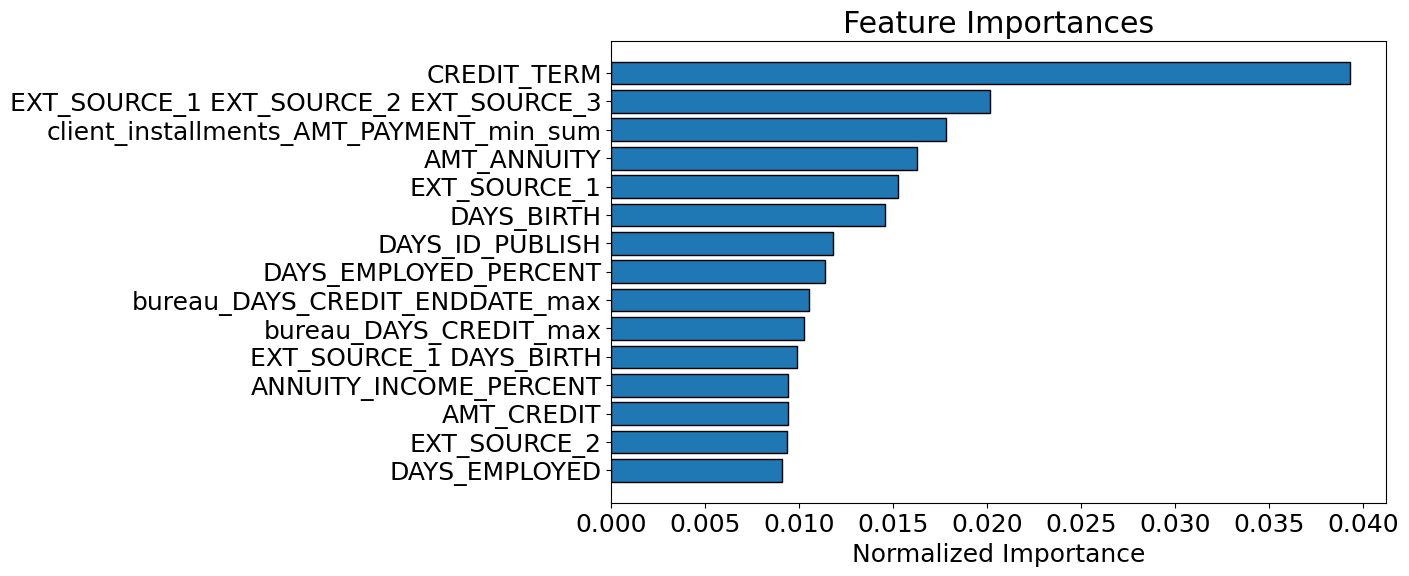

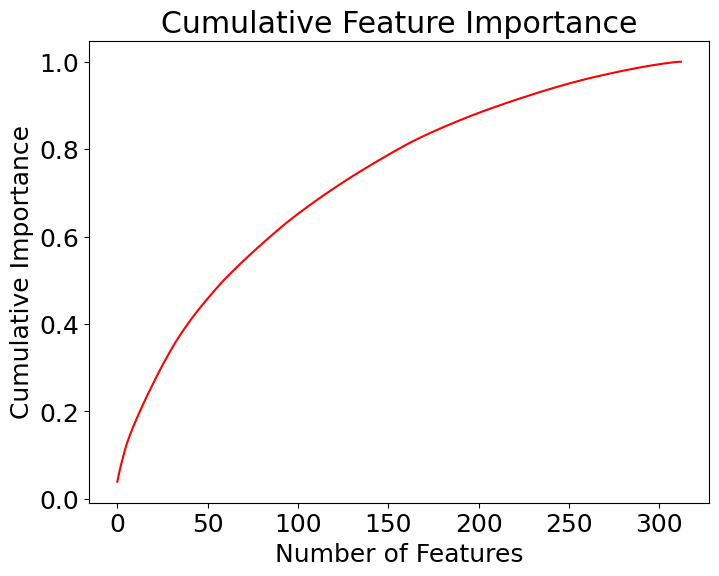

213 features required for 0.90 of cumulative importance


In [ ]:
norm_fi_small = plot_feature_importances(fi_small)

In [ ]:
submission_small.head()

SK_ID_CURR    TARGET
0      100001  0.337647
1      100005  0.590671
2      100013  0.168562
3      100028  0.195374
4      100038  0.697449

In [ ]:
submission_small.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/lgb_small_preds.csv', index = False)

On Kaggle, Our predictions on the final dataset with removal of feature with lower importance, scored **0.78622** on private dataset.

This implies it as very solid model, as on kaggle the highest score obtained is 0.80570. Tough our model has about 0.02 'roc-auc' score less than the best one, to achieve that we would need to revamp feature set, use greater number of boosters with other optimized hyperparameter.

## Model Tuning: RandomSearchCv






In [ ]:
#Data manipulation
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

#modeling
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

# Splitting data
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

n_folds = 5
max_evals = 5

In [ ]:
!pip install pyarrow

ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/install.py", line 441, in run
    conflicts = self._determine_conflicts(to_install)
  File "/usr/local/lib/python3.10/dist-packages/pip/_i

In [ ]:
# os.chdir('/content/drive/MyDrive/Jovian/HomeCreditOutputs')

In [ ]:
train_set = pd.read_parquet('./train_finale.parquet')

# Sample 16000 rows (10000 for training, 6000 for testing)
train_set = train_set.sample(n = 16000, random_state = 24)

In [ ]:
train_set

In [ ]:
train_set.info()

In [ ]:
# Only numeric features
train_set.select_dtypes('number')

In [ ]:
# Extract the labels
labels = np.array(train_set['TARGET'].astype(np.int8)).reshape((-1, ))
features = train_set.drop(columns = ['TARGET'])

# Split into training and testing data
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 6000, random_state = 50)

In [ ]:
# Convert to np arrays
train_features = np.array(train_features)
test_features = np.array(test_features)

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler()

# Fit on the training data
imputer.fit(train_features)

# Transform both training and testing data
train_features = imputer.transform(train_features)
test_features = imputer.transform(test_features)

# Repeat with the scaler
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [ ]:
print("Training features shape: ", train_features.shape)
print("Testing features shape: ", test_features.shape)

### Cross Validation

#### Early Stopping
Training untill the validation error does not decrease for a specified number of iterations.


Eg. Cross validation and Early Stopping

In [ ]:
# Create a training and testing dataset
train_set = lgb.Dataset(data = train_features, label = train_labels)
test_set = lgb.Dataset(data = test_features, label = test_labels)

# Get default hyperparameters
model = lgb.LGBMClassifier()
default_params = model.get_params()

# Remove the number of estimators because we set this to 100 in the cv call
del default_params['n_estimators']

# Cross validation with early stopping
cv_results = lgb.cv(default_params, train_set, num_boost_round = 300, callbacks=[lgb.early_stopping(stopping_rounds=100)],
                    metrics = 'auc', nfold = n_folds, seed = 42)

In [ ]:
# Print the keys available in cv_results
print("Keys in cv_results:", cv_results.keys())

In [ ]:
print('The maximum validation ROC AUC was: {:.5f} with a standard deviation of {:.5f}.'.format(cv_results['valid auc-mean'][-1], cv_results['valid auc-stdv'][-1]))
print('The optimal number of boosting rounds (estimators) was {}.'.format(len(cv_results['valid auc-mean'])))

The cv_results is a dictionary with lists for the metric mean and the metric standard deviation. The last entry (index of -1) contains the best performing score. The length of each list in the dictionary will be the "optimal" number of estimators to train.

In [ ]:
# Optimal number of esimators found in cv
model.n_estimators = len(cv_results['valid auc-mean'])

# Train and make predicions with model
model.fit(train_features, train_labels)
preds = model.predict_proba(test_features)[:, 1]
baseline_auc = roc_auc_score(test_labels, preds)

print('The baseline model scores {:.5f} ROC AUC on the test set.'.format(baseline_auc))

This is the baseline score before hyperparameter tuning. The only difference we made from the default model was using early stopping to set the number of estimators (which by default is 100).

##Random search and test on full data

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# from sklearn.model_selection import GridSearchCV

In [ ]:
# Get default hyperparameters
model = lgb.LGBMClassifier()
default_params = model.get_params()
default_params

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

One aspect to note is that if boosting_type is goss, then we cannot use subsample (which refers to training on only a fraction of the rows in the training data, a technique known as stochastic gradient boosting). Therefore, we will need a line of logic in our algorithm that sets the subsample to 1.0 (which means use all the rows) if boosting_type=goss. As an example below, if we randomly select a set of hyperparameters, and the boosting type is "goss", then we set the subsample to 1.0.

The boosting_type and is_unbalance domains are pretty simple because these are categorical variables. For the hyperparameters that must be integers (num_leaves, min_child_samples), we use range(start, stop, [step]) which returns a range of numbers from start to stop spaced by step (or 1 if not specified). range always returns integers, which means that if we want evenly spaced values that can be fractions, we need to use np.linspace(start, stop, [num]). This works the same way except the third argument is the number of values (by default 100).

Finally, np.logspace(start, stop, [num = 100], [base = 10.0]) returns values evenly spaced on a logarithmic scale. According to the the docs "In linear space, the sequence starts at  basestart
  (base to the power of start) and ends with  basestop
  " This is useful for values that differ over several orders of magnitude such as the learning rate.

In [ ]:
# Hyperparameter grid for randomsearch
param_grid = {
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'learning_rate': list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)),
    'max_depth': list(range(5, 50)),
    'min_child_samples': list(range(20, 500, 5)),
    'n_estimators': list(range(20, 50)),
    'num_leaves': list(range(20, 150)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'subsample': list(np.linspace(0.5, 1, 100)),
    'is_unbalance': [True, False]
}

In [ ]:
# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                   n_iter=10, scoring='roc_auc', cv=5, verbose=1, random_state=24)

# Perform RandomizedSearchCV on the dataset
random_search.fit(train_features, train_labels)

# Get the best parameters and best score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 673, number of negative: 7327
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 55241
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 380
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.084125 -> initscore=-2.387576
[LightGBM] [Info] Start training from score -2

NotFittedError: ignored

In [ ]:
import pprint
pprint.pprint(random_search.best_params_)

we will use these hyperparameters for train on test set and on main test data

In [ ]:
best_lgb_model = lgb.LGBMClassifier(**random_search.best_params_)
best_lgb_model.fit(train_features,train_labels)
preds = best_lgb_model.predict_proba(test_features)[:, 1]
print('The best model from random search scores {:.5f} ROC AUC on the test set.'.format(roc_auc_score(test_labels, preds)))

The best model from random search scores 0.73753 ROC AUC on the test set.


We got higher test score after hyper parameter optimisation using RandomSeachCv

In [ ]:
best_params = {'boosting_type': 'dart',
 'colsample_bytree': 0.8666666666666667,
 'is_unbalance': True,
 'learning_rate': 0.08207014855722332,
 'max_depth': 31,
 'min_child_samples': 460,
 'n_estimators': 161,
 'num_leaves': 50,
 'reg_alpha': 0.6938775510204082,
 'reg_lambda': 0.2857142857142857,
 'subsample': 0.5757575757575758}

In [ ]:
train_finale = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/train_finale.parquet')
test_finale = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/test_finale.parquet')
print(train_finale.info())
print(test_finale.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 484 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float32(423), int32(61)
memory usage: 570.1 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 483 entries, NAME_CONTRACT_TYPE to previous_NAME_PORTFOLIO_Cash_mean
dtypes: float32(423), int32(60)
memory usage: 90.2 MB
None


In [ ]:
train_finale['TARGET'] = train_labels
train_finale['SK_ID_CURR'] = train_ids
test_finale['SK_ID_CURR'] = test_ids

In [ ]:
len(train_finale.columns)

485

Making some changes in our previously defined model to incorporate our new best hyperparameters to test on full dataset and get results.

In [ ]:
def hyperopt_model(train_df, test_features, n_folds = 5, **params):

    """Train and test a light gradient boosting model using
    cross validation.

    Parameters
    --------
        train_df (pd.DataFrame):
            dataframe of training features to use
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame):
            dataframe of testing features to use
        n_folds (int, default = 5): number of folds to use for cross validation

    Return
    --------
        submission (pd.DataFrame):
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame):
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame):
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.

    """

    # Extract the ids
    train_ids = train_df['SK_ID_CURR']
    test_ids = test_features['SK_ID_CURR']

    # Extract the labels for training
    labels = train_df['TARGET']

    # Remove the ids and target
    features = train_df.drop(columns = ['SK_ID_CURR', 'TARGET'])
    test_features = test_features.drop(columns = ['SK_ID_CURR'])

    # Extract feature names
    feature_names = list(features.columns)

    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)

    # Median imputation of missing values
    imputer = SimpleImputer(strategy = 'median')

    # Scale each feature to 0-1
    scaler = MinMaxScaler()

    # Fit on the training data
    imputer.fit(features)

    # Transform both training and testing data
    features = imputer.transform(features)
    test_features = imputer.transform(test_features)

    # Repeat with the scaler
    scaler.fit(features)
    features = scaler.transform(features)
    test_features = scaler.transform(test_features)

    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = True, random_state = 50)

    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))

    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])

    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])

    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []

    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):

        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]

        # Create the model
        model = lgb.LGBMClassifier(objective = 'binary', **params,
                                   n_jobs = -1, random_state = 50)

        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = 'auto')

        # Record the best iteration
        best_iteration = model.best_iteration_

        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits

        # Make predictions
        test_predictions += model.predict_proba(test_features, num_iteration = best_iteration)[:, 1] / k_fold.n_splits

        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict_proba(valid_features, num_iteration = best_iteration)[:, 1]

        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']

        valid_scores.append(valid_score)
        train_scores.append(train_score)

        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()

    # Make the submission dataframe
    submission = pd.DataFrame({'SK_ID_CURR': test_ids, 'TARGET': test_predictions})

    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)

    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))

    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')

    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores})

    return submission, feature_importances, metrics

In [ ]:
submission_finale, fi_finale, metrics_finale = hyperopt_model(train_finale, test_finale, **best_params)
print('Final metrics on preprocessed training set')
print(metrics_finale)

[LightGBM] [Info] Number of positive: 19919, number of negative: 226089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.238928 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 71852
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 481
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080969 -> initscore=-2.429255
[LightGBM] [Info] Start training from score -2.429255
[LightGBM] [Info] Number of positive: 19863, number of negative: 226146
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.519861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72029
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 480
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080741 -> initscore=-2.432322
[LightGBM] [Info] Start training from score -2.432322
[Lig

The optimized Hyperparameters we got on our small dataset didn't translate will on the final dataset.

It has overfitted the model, unable to better generalize to give better predictions.

In [ ]:
norm_fi_finale= plot_feature_importances(fi_finale)

In [ ]:
submission_finale.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/lgb_final_hyperopt_preds.csv', index = False)

On Kaggle, Our predictions on the final dataset with optimized Hyperparameters got us upto score **0.76829** on private dataset.
The score is less than what we got with optimized hyperparameters.

In [ ]:
train_small = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/train_small.parquet')
test_small = pd.read_parquet('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/test_small.parquet')
print(train_small.info())
print(test_small.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 313 entries, CREDIT_TERM to client_credit_AMT_TOTAL_RECEIVABLE_max_sum
dtypes: float32(288), int32(25)
memory usage: 369.5 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48744 entries, 0 to 48743
Columns: 313 entries, CREDIT_TERM to client_credit_AMT_TOTAL_RECEIVABLE_max_sum
dtypes: float32(288), int32(25)
memory usage: 58.6 MB
None


In [ ]:
train_small['TARGET'] = train_labels
train_small['SK_ID_CURR'] = train_ids
test_small['SK_ID_CURR'] = test_ids

In [ ]:
submission_small, fi_small, metrics_small = hyperopt_model(train_small, test_small, **best_params)
print('Final metrics on preprocessed training set with lesss features')
print(metrics_small)

[LightGBM] [Info] Number of positive: 19919, number of negative: 226089
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.193879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58198
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080969 -> initscore=-2.429255
[LightGBM] [Info] Start training from score -2.429255
[LightGBM] [Info] Number of positive: 19863, number of negative: 226146
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.410566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 58353
[LightGBM] [Info] Number of data points in the train set: 246009, number of used features: 313
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080741 -> initscore=-2.432322
[LightGBM] [Info] Start training from score -2.432322
[Lig

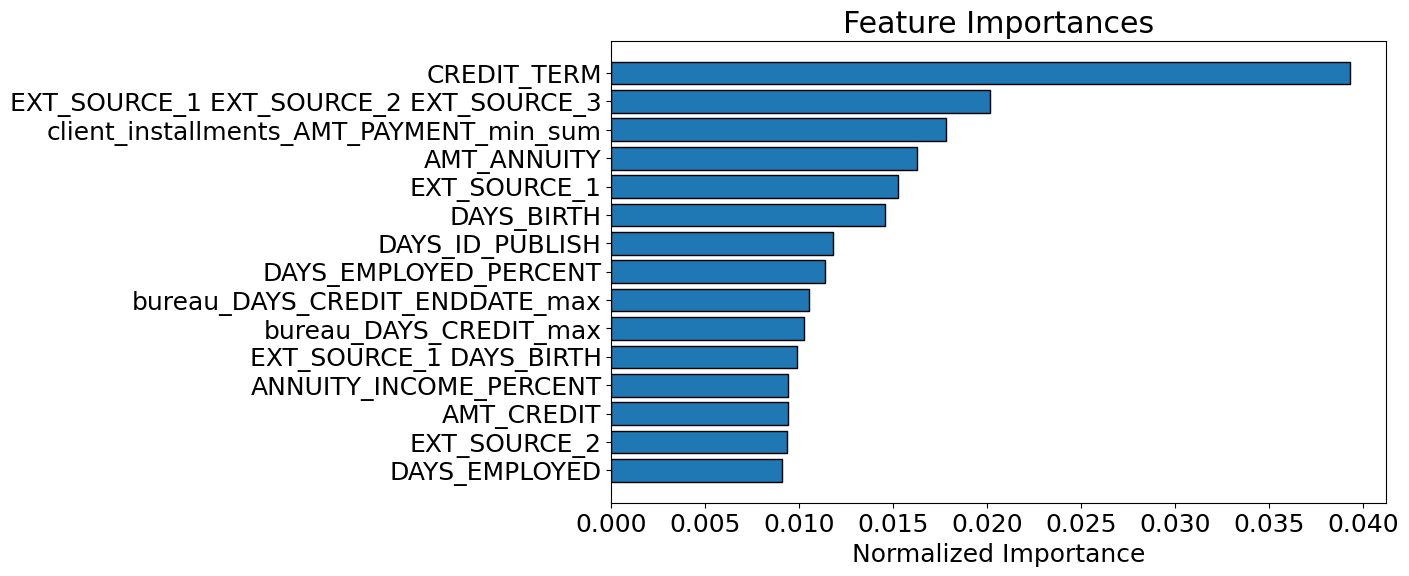

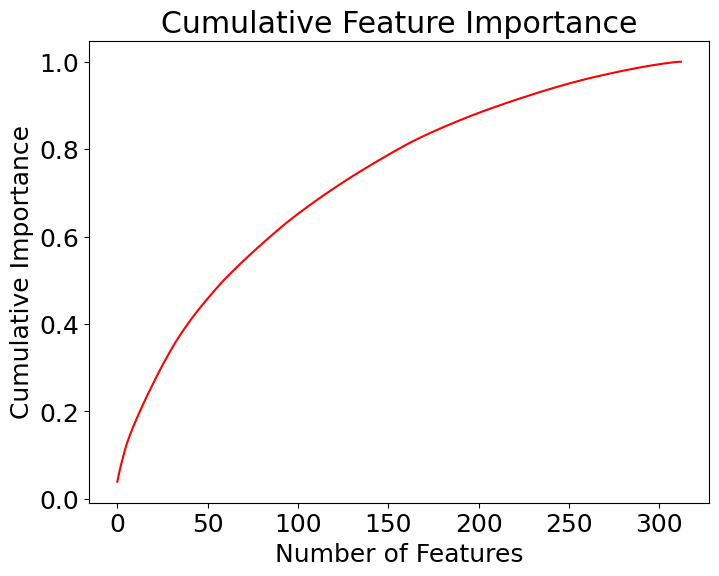

213 features required for 0.90 of cumulative importance


In [ ]:
norm_fi_small = plot_feature_importances(fi_small)

In [ ]:
submission_small.head()

SK_ID_CURR    TARGET
0      100001  0.337647
1      100005  0.590671
2      100013  0.168562
3      100028  0.195374
4      100038  0.697449

In [ ]:
submission_small.to_csv('/content/mydrive/MyDrive/Jovian/HomeCreditOutputs/lgb_small_hyperopt_preds.csv', index = False)

On Kaggle, Our predictions on the final dataset with removal of feature with lower importance and optimized Hyperparameters only got us upto score **0.77433** on private dataset.

Our optimized hyperparameters did give better results as they were carried out on small subset of data. With increased data points comes increased learning and increased errors with problem of under/over fitting.



##Summary
- We explored our application training data performed label and one hot encoding for categorical data and Scaling and imputing for numerical data.</br> Removed missing values and correlated features, feature engineering to get polynomial and domain specific features.</br> Performed baseline prediction using Random forest and  lightgbm model.
- Following the steps we added Bureau and Bureau balance data to application data, Bureau data was  aggregated w.r.t application id where it had multiple bureau Id  for previous credits.</br> **KDE** plots to showing correlation of feature between defaulter and non defaulter applicants. Removed  missing value and correlated features.</br>
Integrated with bureau balance data aggregating monthly balance for each bureau Id.</br>
- Used application and bureau features for prediction with **LightGBM** model, obtaining roc-auc score around 0.75, i.e. predicting default risk with 75% accuracy.
-Previous application had previous loan data at home credit,
 aggregated to get features related to application.
Pos cash balance had monthly loan details, credit balance had monthly balance details, installment and monthly payment details resp., we aggregate it w.r.t to previous application id then with application id.
- **Collated** all application-bureau data and application-previous data to obatain final dataset. Then performed feature selection for last time by correlated,  missing features and zero importance features got from model.
- Performed predictions on final dataset and got 0.7855 score.</br> Also removed 5% features with least importance to get smaller subset of features, we got **0.78622** roc-auc score.
- For hyperparameter optimisation we first selected small dataset and found out n_estimators by early stopping. Used this with other found hyper parameters to get improved roc-auc score.</br>
But this optimised hyperparameters didn't do well on full data set.

##Inferences
1. Found out **anomaly** in days employed and replaced them with np.nan, as all anomalous rows contained same value. And created another column to tell the machine learning model that the certain feature was anomalous.
2. KDE plots for correlating feature with target varaible gave **variance**, which showed its importance for model's performance.
3. **Feature engineering**:</br>
 With label encoding categorical features, aggregating numeric features,adding polynomial features and Domain relevent features.</br>
 Then by adding more features from related files, removing correlated and missing value features this models performance increased from 0.0.69252 to 0.78622 roc-auc score.
4. Created more than **1500 features** in the process, rigourously reducing it to 483 features for our final dataset, further reduced to **313 features** by remove least 5% import features.
5. Improved model performance by add more related data provided by Home Credit, about **6 files**. From 0.75336 score on application data to 0.76031 with bureau data and jumping to **0.78622 roc-auc score** with add previous application data.
6. Performed **Hyperparameter Optimization** with **RandomSearchCV** to calculate hyper parameters on a small data set and then we applied it to A final data set but found out that this parameters don't translate on the full data and we got relatively less score on our predictions
7. Coverting to lower datatypes, storing and retrieving data in parquet and feather files boosted I/O performance and reduced **memory** and disk space.

##Conclusion
We executed a comprehensive **end-to-end** workflow including meticulous data preprocessing, analysis features, extensive feature engineering, and the development of machine learning **default risk prediction** models.

For all our datasets we followed the similar **steps**:
- **Analyse** few important features with bar graphs, plotted kde graphs to view feature varaince between defaulter and non-defaulters.
- **Preprocess** data i.e. convert datatypes, label encoding, scaling and imputing.
- **Feature Engineer** by adding polymial, domain specific and aggregated features to dataset.
- Reviewed **correlated** and **Missing value** features, and removed features with high correlation and missing value count.
- Data through ML **model** for metric evaluation and scraping out features with zero importance.

**LightGBM** (Gradient Boosting Model) model significantly improved performace as compared to Randomforest. As GBMs try to reduce error/ loss itself by building trees on top of other, Ultimately imporveing performance.

We used '**RandmonSearchCv**' for hyperparameter optimzation on sample dataset, we had better score than model without optimization.

We got **0.78622 roc-auc-score** on competitions private test dataset, which was less by 0.02 than than the highest scoring model. So we can conclude overall we have build a solid ML model for default risk prediction.




##Future Work

- Theres much room for Exploratory Data Analysis(**EDA**) as there are many features in training data related files.In our final dataset if we had used only available features we could analyse each applicants credit, balance, intallments, etc.
- Creating more features using **automated feature engineering** tools and then taking out valueable features or by selectively creating features with domain knowledge a better generalizing machine learning model can be made.

- Hyperparameter optimization through state of art automated tools like **bayesian optimization.**

- Improving model performance by **stacking** different models or by using Deep learning model.

## References

Data Manupilation Libraries
- Pandas documentation: https://pandas.pydata.org/docs/user_guide/index.html
- Ultimate Guide to Handling Missing Data: https://soumenatta.medium.com/the-ultimate-guide-to-handling-missing-data-in-python-pandas-a6b0913a7cd4

EDA Libraries
- Matplotlib documentation: https://matplotlib.org/stable/index.html
- seaborn homepage: https://seaborn.pydata.org/

Machine learining Libraries
- scikit-learn library https://scikit-learn.org/stable/, for documentation on label encoder and onehot encoding and machine learning models like randomforest
- lightgbm documentation https://lightgbm.readthedocs.io/en/stable/

Kaggle Notebooks
- kaggle notebook for a complete guide https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction
- Another kaggle notebook for feature engineering https://www.kaggle.com/code/jsaguiar/lightgbm-with-simple-features